In [1]:
# This is a magic line that makes matplotlib plots appear in the notebook,
# not in a separate window
%matplotlib inline
#import mpld3
#mpld3.enable_notebook()
# These imports are actually NOT NEEDED if you already know the name of
# the ttree within the root file.
import math
from math import exp
from ROOT import TFile, TTree

import numpy as np
import matplotlib.pylab as plt
import matplotlib.pyplot as plot
import matplotlib.axes as axes
from matplotlib.colors import LogNorm
import uproot
import pandas as pd
import scipy as sp
from scipy.optimize import curve_fit
from scipy.stats import norm
import matplotlib.mlab as mlab
from pylab import rcParams
plt.rcParams.update({'font.size': 18})



from root_numpy import root2array
from scipy.interpolate import interp1d
from scipy.misc import factorial

Welcome to JupyROOT 6.12/06


In [2]:
plt.rcParams.update({'font.size': 18})

In [3]:
folder = "gamma3d"
folder_corr= 'gammacorrelation'
TREE_CLUSTER = "Clustertree"
TREE_MATCHING = "Matchingtree"
TREE_SPS="Sps_Correlationtree"
TREE_EVENT="Event_Correlationtree"

In [4]:
old_threshold_file='/uboone/data/users/abhat/GammaCatcher/data_extbnb_mcc9.0_csu_run1_reco2_cluster_track_hadd.root'
low_threshold_file_v00= '/uboone/data/users/abhat/GammaCatcher/low_threshold_cluster_track_distance_v00.root'
low_threshold_file_v01= '/uboone/data/users/abhat/GammaCatcher/low_threshold_cluster_track_distance_v01.root'
low_threshold_file_v02= '/uboone/data/users/abhat/GammaCatcher/low_threshold_cluster_track_distance_v02.root'
low_threshold_file_v03= '/uboone/data/users/abhat/GammaCatcher/low_threshold_cluster_track_distance_v03.root'
low_threshold_file_v04= '/uboone/data/users/abhat/GammaCatcher/low_threshold_cluster_track_distance_v04.root'
low_threshold_file_v04_correlation='/uboone/data/users/abhat/GammaCatcher/low_threshold_correlations_v04.root'
low_threshold_file_MCC9='/uboone/data/users/abhat/GammaCatcher/low_threshold_cluster_track_distance_MCC9.root'
low_threshold_file_v04_00='/uboone/data/users/abhat/GammaCatcher/low_threshold_cluster_track_distance_v04_00.root'
#low_threshold_file_v04_00_no_cone='/uboone/data/users/abhat/GammaCatcher/low_threshold_cluster_track_distance_v04_no_cone.root'
low_threshold_file_v04_00_no_cone='/uboone/data/users/abhat/GammaCatcher/low_threshold_cluster_track_distance_v04_1tick.root'
low_threshold_file_v04_01='/uboone/data/users/abhat/GammaCatcher/low_threshold_cluster_track_distance_v04_01.root'
low_threshold_file_default='/uboone/data/users/abhat/GammaCatcher/low_threshold_cluster_track_distance_default.root'
low_threshold_file_default_no_cone='/uboone/data/users/abhat/GammaCatcher/low_threshold_cluster_track_distance_default_no_cone.root'
low_threshold_file_v04_00_deltaY5='/uboone/data/users/abhat/GammaCatcher/low_threshold_cluster_track_distance_v04_00_deltay5.root'
low_threshold_file_v05= '/uboone/data/users/abhat/GammaCatcher/low_threshold_cluster_track_distance_v05.root'
low_threshold_file_v00_NO_CONE='/uboone/data/users/abhat/GammaCatcher/low_threshold_cluster_track_distance_v00_NO_CONE.root'
low_threshold_file_v01_NO_CONE='/uboone/data/users/abhat/GammaCatcher/low_threshold_cluster_track_distance_v01_NO_CONE.root'
low_threshold_file_v02_NO_CONE='/uboone/data/users/abhat/GammaCatcher/low_threshold_cluster_track_distance_v02_NO_CONE.root'
low_threshold_file_v03_NO_CONE='/uboone/data/users/abhat/GammaCatcher/low_threshold_cluster_track_distance_v03_NO_CONE.root'
low_threshold_file_v04_NO_CONE='/uboone/data/users/abhat/GammaCatcher/low_threshold_cluster_track_distance_v04_NO_CONE.root'
low_threshold_file_v04_SKIP_TRACK='/uboone/data/users/abhat/GammaCatcher/low_threshold_cluster_track_distance_v04_SKIP_TRACK.root'
low_threshold_file_v05_NO_CONE='/uboone/data/users/abhat/GammaCatcher/low_threshold_cluster_track_distance_v05_NO_CONE.root'

In [5]:
Cluster_tree_old = uproot.open(old_threshold_file)[folder][TREE_CLUSTER]
Matching_tree_old = uproot.open(old_threshold_file)[folder][TREE_MATCHING]
Cluster_tree_v00 = uproot.open(low_threshold_file_v00)[folder][TREE_CLUSTER]
Matching_tree_v00 = uproot.open(low_threshold_file_v00)[folder][TREE_MATCHING]

Cluster_tree_MCC9 = uproot.open(low_threshold_file_MCC9)[folder][TREE_CLUSTER]
Matching_tree_MCC9 = uproot.open(low_threshold_file_MCC9)[folder][TREE_MATCHING]
#Cluster_tree_v01 = uproot.open(low_threshold_file_v01)[folder][TREE_CLUSTER]
#Matching_tree_v01 = uproot.open(low_threshold_file_v01)[folder][TREE_MATCHING]

Cluster_tree_v02 = uproot.open(low_threshold_file_v02)[folder][TREE_CLUSTER]
Matching_tree_v02 = uproot.open(low_threshold_file_v02)[folder][TREE_MATCHING]
Cluster_tree_v03 = uproot.open(low_threshold_file_v03)[folder][TREE_CLUSTER]
Matching_tree_v03 = uproot.open(low_threshold_file_v03)[folder][TREE_MATCHING]
Cluster_tree_v04 = uproot.open(low_threshold_file_v04)[folder][TREE_CLUSTER]
Matching_tree_v04 = uproot.open(low_threshold_file_v04)[folder][TREE_MATCHING]
Cluster_tree_v04_00 = uproot.open(low_threshold_file_v04_00)[folder][TREE_CLUSTER]
Matching_tree_v04_00 = uproot.open(low_threshold_file_v04_00)[folder][TREE_MATCHING]
Cluster_tree_v04_00_no_cone = uproot.open(low_threshold_file_v04_00_no_cone)[folder][TREE_CLUSTER]
Matching_tree_v04_00_no_cone = uproot.open(low_threshold_file_v04_00_no_cone)[folder][TREE_MATCHING]
Cluster_tree_v04_00_deltaY5 = uproot.open(low_threshold_file_v04_00_deltaY5)[folder][TREE_CLUSTER]
Matching_tree_v04_00_deltaY5 = uproot.open(low_threshold_file_v04_00_deltaY5)[folder][TREE_MATCHING]
Cluster_tree_v04_01 = uproot.open(low_threshold_file_v04_01)[folder][TREE_CLUSTER]
Matching_tree_v04_01 = uproot.open(low_threshold_file_v04_01)[folder][TREE_MATCHING]
Cluster_tree_default = uproot.open(low_threshold_file_default)[folder][TREE_CLUSTER]
Matching_tree_default = uproot.open(low_threshold_file_default)[folder][TREE_MATCHING]
Cluster_tree_default_no_cone = uproot.open(low_threshold_file_default_no_cone)[folder][TREE_CLUSTER]
Matching_tree_default_no_cone = uproot.open(low_threshold_file_default_no_cone)[folder][TREE_MATCHING]
Cluster_tree_v05 = uproot.open(low_threshold_file_v05)[folder][TREE_CLUSTER]
Matching_tree_v05 = uproot.open(low_threshold_file_v05)[folder][TREE_MATCHING]
Sps_tree_v04=uproot.open(low_threshold_file_v04_correlation)[folder_corr][TREE_SPS]
Event_tree_v04=uproot.open(low_threshold_file_v04_correlation)[folder_corr][TREE_EVENT]



Cluster_tree_v00_NO_CONE=uproot.open(low_threshold_file_v00_NO_CONE)[folder][TREE_MATCHING]
Matching_tree_v00_NO_CONE=uproot.open(low_threshold_file_v00_NO_CONE)[folder][TREE_MATCHING]

Cluster_tree_v01_NO_CONE=uproot.open(low_threshold_file_v01_NO_CONE)[folder][TREE_CLUSTER]
Matching_tree_v01_NO_CONE=uproot.open(low_threshold_file_v01_NO_CONE)[folder][TREE_MATCHING]

Cluster_tree_v02_NO_CONE=uproot.open(low_threshold_file_v02_NO_CONE)[folder][TREE_CLUSTER]
Matching_tree_v02_NO_CONE=uproot.open(low_threshold_file_v02_NO_CONE)[folder][TREE_MATCHING]

Cluster_tree_v03_NO_CONE=uproot.open(low_threshold_file_v03_NO_CONE)[folder][TREE_CLUSTER]
Matching_tree_v03_NO_CONE=uproot.open(low_threshold_file_v03_NO_CONE)[folder][TREE_MATCHING]

Cluster_tree_v04_SKIP_TRACK=uproot.open(low_threshold_file_v04_SKIP_TRACK)[folder][TREE_CLUSTER]
Matching_tree_v04_SKIP_TRACK=uproot.open(low_threshold_file_v04_SKIP_TRACK)[folder][TREE_MATCHING]

Cluster_tree_v04_NO_CONE=uproot.open(low_threshold_file_v04_NO_CONE)[folder][TREE_CLUSTER]
Matching_tree_v04_NO_CONE=uproot.open(low_threshold_file_v04_NO_CONE)[folder][TREE_MATCHING]

Cluster_tree_v05_NO_CONE=uproot.open(low_threshold_file_v05_NO_CONE)[folder][TREE_CLUSTER]
Matching_tree_v05_NO_CONE=uproot.open(low_threshold_file_v05_NO_CONE)[folder][TREE_MATCHING]

In [6]:
CLEAN_REGION = 'Y_cluster_3d_hit_z>800 or (Y_cluster_3d_hit_z>400 and Y_cluster_3d_hit_z<600)'
MATCH_CUT='Y_cluster_3d_hit_y > -120.0 and Y_cluster_3d_hit_y < 120.0'

In [7]:
df_Matching_old=Matching_tree_old.pandas.df().query(CLEAN_REGION)
df_Matching_v00=Matching_tree_v00.pandas.df().query(CLEAN_REGION)

df_Matching_MCC9=Matching_tree_MCC9.pandas.df().query(CLEAN_REGION)
#df_Matching_v01=Matching_tree_v01.pandas.df().query(CLEAN_REGION)

df_Matching_v02=Matching_tree_v02.pandas.df().query(CLEAN_REGION)
df_Matching_v03=Matching_tree_v03.pandas.df().query(CLEAN_REGION)
df_Matching_v04=Matching_tree_v04.pandas.df().query(CLEAN_REGION)
df_Matching_v04_00=Matching_tree_v04_00.pandas.df().query(CLEAN_REGION)
df_Matching_v04_00_no_cone=Matching_tree_v04_00_no_cone.pandas.df().query(CLEAN_REGION)
df_Cluster_v04_00=Cluster_tree_v04_00.pandas.df()
df_Matching_v04_00_deltaY5=Matching_tree_v04_00_deltaY5.pandas.df().query(CLEAN_REGION)
df_Matching_v04_01=Matching_tree_v04_01.pandas.df().query(CLEAN_REGION)
df_Matching_default=Matching_tree_default.pandas.df().query(CLEAN_REGION)
df_Matching_default_no_cone=Matching_tree_default_no_cone.pandas.df().query(CLEAN_REGION)
df_Matching_v05=Matching_tree_v05.pandas.df().query(CLEAN_REGION)
df_Correlation_v04_G10=Sps_tree_v04.pandas.df()
df_Correlation_v04_Event=Event_tree_v04.pandas.df()

df_Matching_v00_NO_CONE=Matching_tree_v00_NO_CONE.pandas.df().query(CLEAN_REGION)
df_Matching_v01_NO_CONE=Matching_tree_v01_NO_CONE.pandas.df().query(CLEAN_REGION)
df_Matching_v02_NO_CONE=Matching_tree_v02_NO_CONE.pandas.df().query(CLEAN_REGION)
df_Matching_v03_NO_CONE=Matching_tree_v03_NO_CONE.pandas.df().query(CLEAN_REGION)
df_Matching_v04_NO_CONE=Matching_tree_v04_NO_CONE.pandas.df().query(CLEAN_REGION)
df_Matching_v04_SKIP_TRACK=Matching_tree_v04_SKIP_TRACK.pandas.df().query(CLEAN_REGION)
df_Matching_v05_NO_CONE=Matching_tree_v05_NO_CONE.pandas.df().query(CLEAN_REGION)

df_Cluster_v00_NO_CONE=Cluster_tree_v00_NO_CONE.pandas.df()
df_Cluster_v01_NO_CONE=Cluster_tree_v01_NO_CONE.pandas.df()
df_Cluster_v02_NO_CONE=Cluster_tree_v02_NO_CONE.pandas.df()
df_Cluster_v03_NO_CONE=Cluster_tree_v03_NO_CONE.pandas.df()
df_Cluster_v04_NO_CONE=Cluster_tree_v04_NO_CONE.pandas.df()
df_Cluster_v04_SKIP_TRACK=Cluster_tree_v04_SKIP_TRACK.pandas.df()
df_Cluster_v05_NO_CONE=Cluster_tree_v05_NO_CONE.pandas.df()
df_Cluster_old=Cluster_tree_old.pandas.df()

In [8]:
df_Matching_v04_00.head()

V_biggest_iou  V_match_multiplicity  U_biggest_iou  \
entry                                                       
25         -1.000000                     0       0.013044   
26         -1.000000                     1       0.013044   
27          0.945817                     2       0.922326   
28          0.851962                     2       0.467458   
29          0.821321                     2       0.598073   

       U_match_multiplicity  Y_clus_lifetime  Y_clus_hitSize  \
entry                                                          
25                        1         6.000000             1.0   
26                        1         6.000000             1.0   
27                        1         6.077148             2.0   
28                        1         6.000000             1.0   
29                        1         6.000000             1.0   

       Y_cluster_3d_hit_z  Y_cluster_3d_hit_x  Y_cluster_3d_hit_y  \
entry                                                               
25             406.199999            8.323470           88.871578   
26             419.699999           18.277209        -9999.000000   
27             421.199999          217.285394          -79.223952   
28             423.899999           44.230630           75.967800   
29             425.399999           43.976633           77.007030   

       Z_reco_best3d  ...  Y_reco_best3d  distance_smallest3d  \
entry                 ...                                       
25        379.917877  ...     109.830017            33.626459   
26       -999.000000  ...    -999.000000          9167.745776   
27        385.316498  ...    -101.301468            43.360946   
28        424.678619  ...      68.655357            14.848833   
29        426.143372  ...      69.781273            15.053405   

       Y_cluster_charge  V_cluster_charge  U_cluster_charge    YV_iou  \
entry                                                                   
25           123.121521          0.000000         43.109949 -1.000000   
26            39.421207          0.000000          0.000000  0.803899   
27           105.107471         98.086412         92.967131  0.027154   
28            33.804436         36.675255        215.530617  0.069952   
29            53.655937         80.496094        431.061234  0.821321   

         YU_iou       deltaY  deltaY_smallest  Y_Wire  
entry                                                  
25     0.013044 -9999.000000         0.173205    1354  
26     0.772585   -59.409343         0.173205    1399  
27     0.922326   169.567774         0.173205    1405  
28     0.467458     2.251666         0.173205    1413  
29     0.598073     0.519615         0.519615    1418  

[5 rows x 21 columns]

In [9]:
df_Cluster_v04_00.head()

cluster_hit_z  cluster_hit_x  Z_reco_best  X_reco_best  \
entry                                                           
0                0.0       0.794169    49.565125   -16.270462   
1                0.0      27.235661    49.565125   -16.270462   
2                0.0      66.030615   149.179642    58.922081   
3                0.0     163.500640   109.575638   130.741882   
4                0.0     183.754799    46.804329   223.812927   

       distance_smallest  plane  
entry                            
0              36.912348      0  
1              54.443572      0  
2              79.253780      0  
3              65.025506      0  
4              47.113510      0

In [10]:
df_Correlation_v04_Event.head()

evttime  Vertex_x  Vertex_y  Vertex_z  _rand_vtx_x  _rand_vtx_y  \
entry                                                                       
0      1455150737       0.0       0.0       0.0   255.933888   -78.204909   
1      1455150760       0.0       0.0       0.0   242.483477   -62.255682   
2      1455150805       0.0       0.0       0.0   245.114101    56.678840   
3      1455150862       0.0       0.0       0.0   189.427963    60.306961   
4      1455150904       0.0       0.0       0.0    80.803231    70.621499   

       _rand_vtx_z  distance_smallest  N_sps  Event_cluster_charge  ...  \
entry                                                               ...   
0       291.096339         123.730963     89             33.055214  ...   
1       499.522823          48.045565    152             30.401001  ...   
2       556.244968          80.222297     94            146.251328  ...   
3       678.395713          40.393799    116             37.620178  ...   
4       535.262279          23.547144     86             30.408304  ...   

       neutrinotracks       muon_px       muon_py       muon_pz  maxTrkLen  \
entry                                                                        
0                   0  4.602927e+30  7.068033e+28  2.737669e+20        0.0   
1                   0  4.602927e+30  7.068033e+28  2.737669e+20        0.0   
2                   0  4.602927e+30  7.068033e+28  2.737669e+20        0.0   
3                   0  4.602927e+30  7.068033e+28  2.737669e+20        0.0   
4                   0  4.602927e+30  7.068033e+28  2.737669e+20        0.0   

       tracklength  distance_nu_smallest  cosmic_trk_50  N_Run  N_SubRun  
entry                                                                     
0       161.353140            291.635422              0   4955        50  
1       162.718438             95.113254              0   4955        50  
2        68.449239             85.084280              0   4955        51  
3       265.623603            155.320368              0   4955        51  
4       285.607464            108.884575              0   4955        51  

[5 rows x 29 columns]

In [11]:
df_Correlation_v04_G10.head()

evttime       sps_x       sps_y      sps_z    distance  \
entry                                                              
0      1455150737  201.389633  -19.381598  11.930302  202.671564   
1      1455150737  231.848160  103.074394  14.538172  254.144168   
2      1455150737  227.428055  114.852341  16.066305  255.289456   
3      1455150737  224.058197  111.215034  28.985384  251.815432   
4      1455150737  113.705750    4.953717  48.536732  123.730963   

       sps_cluster_charge  N_Event  N_Run  N_SubRun  Vertex_x  ...  \
entry                                                          ...   
0               28.055035     2530   4955        50       0.0  ...   
1             2240.268555     2530   4955        50       0.0  ...   
2              155.298584     2530   4955        50       0.0  ...   
3               25.498619     2530   4955        50       0.0  ...   
4               33.055214     2530   4955        50       0.0  ...   

       neutrinotracks       muon_px       muon_py       muon_pz  maxTrkLen  \
entry                                                                        
0                   0  4.602927e+30  7.068033e+28  2.737669e+20        0.0   
1                   0  4.602927e+30  7.068033e+28  2.737669e+20        0.0   
2                   0  4.602927e+30  7.068033e+28  2.737669e+20        0.0   
3                   0  4.602927e+30  7.068033e+28  2.737669e+20        0.0   
4                   0  4.602927e+30  7.068033e+28  2.737669e+20        0.0   

       tracklength  distance_nu_smallest  cosmic_trk_50  \
entry                                                     
0        161.35314            291.635422              0   
1        161.35314            291.635422              0   
2        161.35314            291.635422              0   
3        161.35314            291.635422              0   
4        161.35314            291.635422              0   

       pointdistance_trk_smallest  distance_trk_smallest  
entry                                                     
0                      274.240813             151.756974  
1                      270.491981              39.068419  
2                      265.873581              40.169002  
3                      258.470223              42.052996  
4                      180.166502             127.436810  

[5 rows x 28 columns]

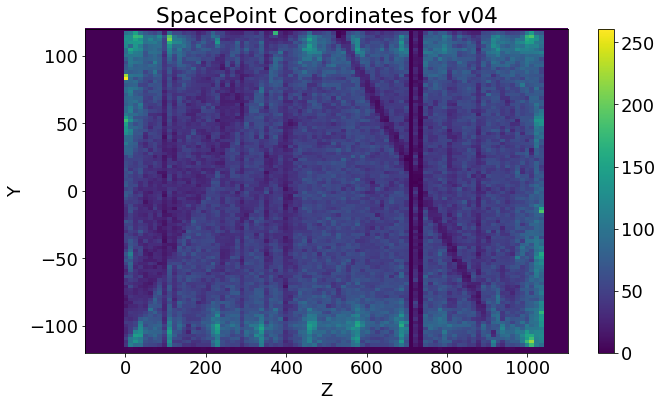

In [12]:
fig = plt.figure(figsize=(10,6))
plt.hist2d(df_Correlation_v04_G10['sps_z'].values,df_Correlation_v04_G10['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates for v04")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

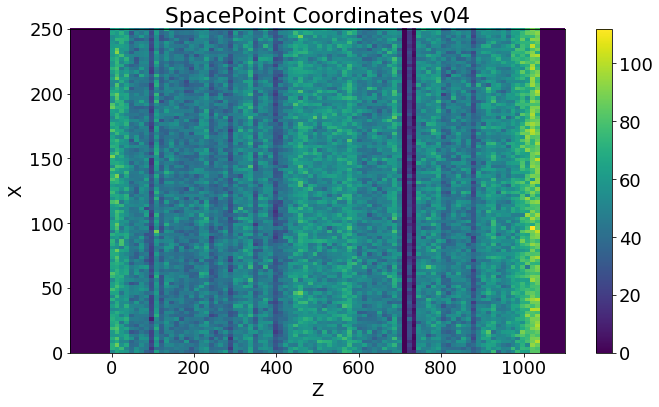

In [13]:
fig = plt.figure(figsize=(10,6))
plt.hist2d(df_Correlation_v04_G10['sps_z'].values,df_Correlation_v04_G10['sps_x'].values,bins=(100,100), range=[[-100,1100], [0,250]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates v04")
plt.xlabel('Z')
plt.ylabel('X')

plt.tight_layout()
plt.show()

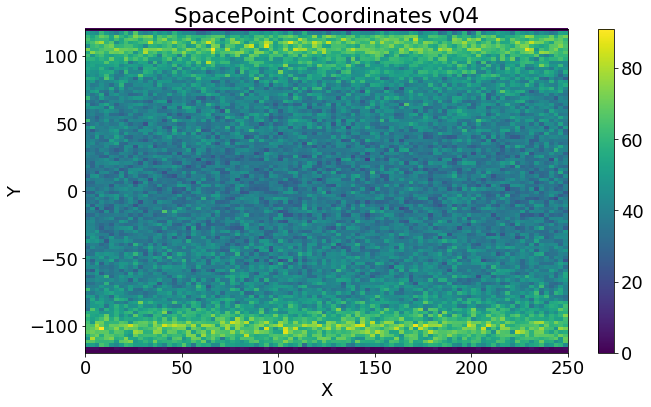

In [14]:
fig = plt.figure(figsize=(10,6))
plt.hist2d(df_Correlation_v04_G10['sps_x'].values,df_Correlation_v04_G10['sps_y'].values,bins=(100,100), range=[[0,250], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("SpacePoint Coordinates v04")
plt.xlabel('X')
plt.ylabel('Y')

plt.tight_layout()
plt.show()

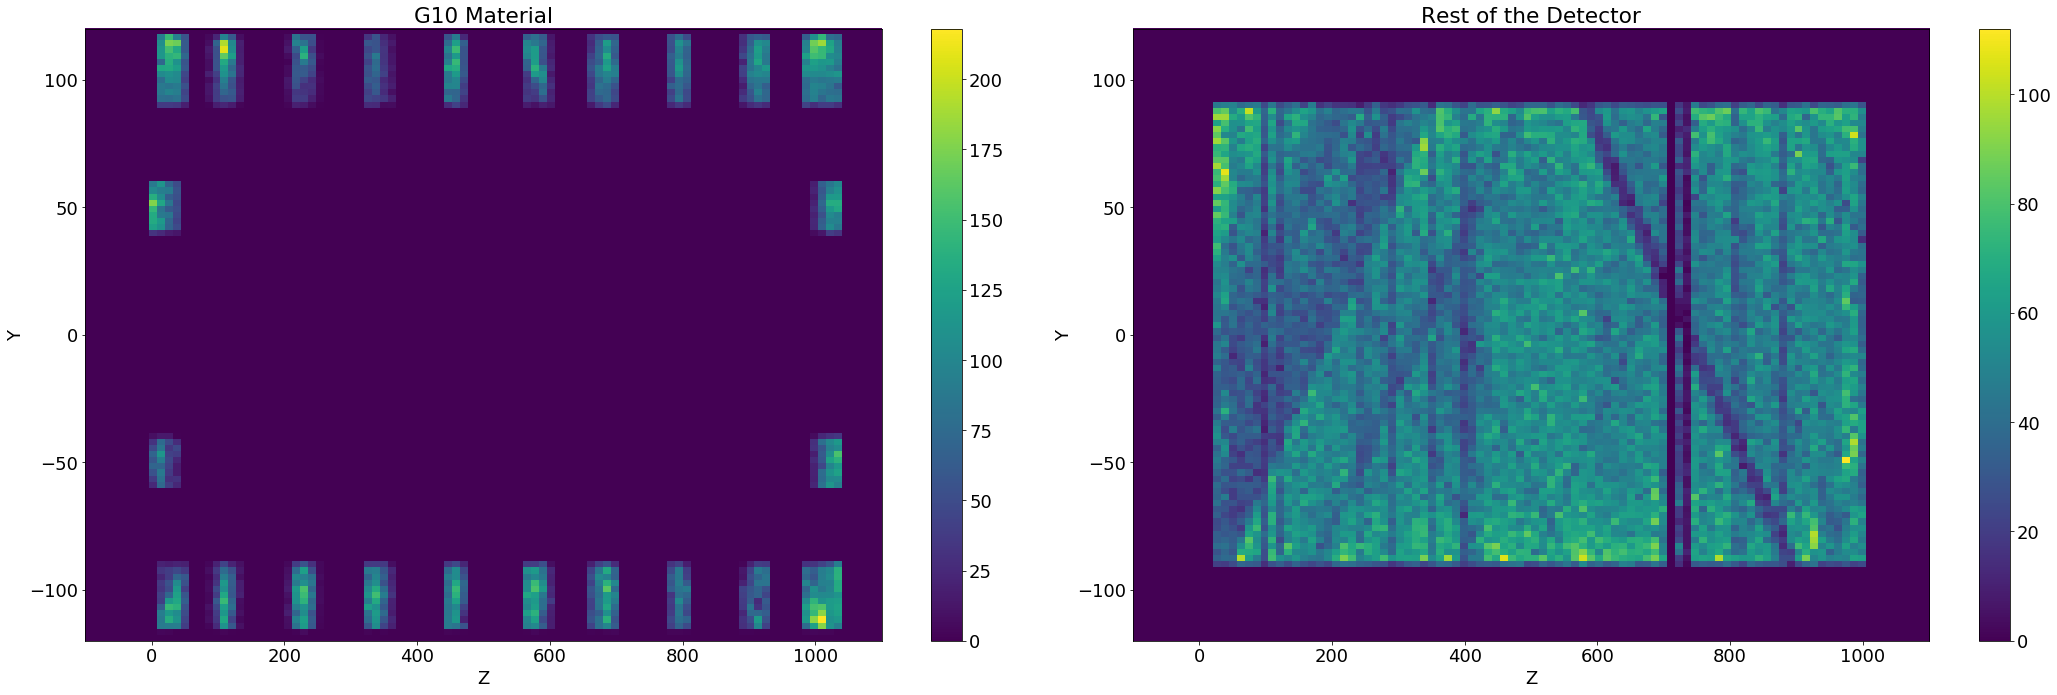

In [15]:
df_G10_off_cut=df_Correlation_v04_G10.query('((sps_y < -90.0 or sps_y > 90.0) and ((sps_z>10 and sps_z<50) or (sps_z>90 and sps_z<130) or (sps_z>210 and sps_z<250) or (sps_z>320 and sps_z<360) or (sps_z>440 and sps_z<470) or (sps_z>560 and sps_z<600) or (sps_z>660 and sps_z<700) or (sps_z>780 and sps_z<810) or (sps_z>890 and sps_z<930) or (sps_z>980 and sps_z<1100) )) or ((sps_y < 60.0 and sps_y > 40.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200)))or ((sps_y < -40.0 and sps_y > -60.0 ) and ((sps_z>0 and sps_z<40)or (sps_z>1000 and sps_z<1200))) ')
df_rest_det_off_cut=df_Correlation_v04_G10.query('(sps_y > -90.0 and sps_y < 90.0) and (sps_z>20 and sps_z<1000) ')

fig = plt.figure(figsize=(30,10))
#df_G10_off=df_Sps_beam_off.query('sps_y < -90.0 or sps_y > 90.0')


plt.subplot(1, 2, 1)

plt.hist2d(df_G10_off_cut['sps_z'].values,df_G10_off_cut['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("G10 Material")
plt.xlabel('Z')
plt.ylabel('Y')


plt.subplot(1, 2, 2)

plt.hist2d(df_rest_det_off_cut['sps_z'].values,df_rest_det_off_cut['sps_y'].values,bins=(100,100), range=[[-100,1100], [-120,120]] ,label='OFF Beam Data')#,norm=LogNorm())
plt.colorbar()
plt.title("Rest of the Detector")
plt.xlabel('Z')
plt.ylabel('Y')

plt.tight_layout()
plt.show()
fig.savefig('Low_threshold_Isolation.png', dpi=400)


In [16]:
df_G10_off_cut.head()

evttime       sps_x       sps_y       sps_z    distance  \
entry                                                               
1      1455150737  231.848160  103.074394   14.538172  254.144168   
2      1455150737  227.428055  114.852341   16.066305  255.289456   
3      1455150737  224.058197  111.215034   28.985384  251.815432   
6      1455150737  151.863907  100.043304   96.594215  205.916856   
10     1455150737   72.889671  -99.662155  128.029922  177.868239   

       sps_cluster_charge  N_Event  N_Run  N_SubRun  Vertex_x  ...  \
entry                                                          ...   
1             2240.268555     2530   4955        50       0.0  ...   
2              155.298584     2530   4955        50       0.0  ...   
3               25.498619     2530   4955        50       0.0  ...   
6               90.752045     2530   4955        50       0.0  ...   
10              58.659405     2530   4955        50       0.0  ...   

       neutrinotracks       muon_px       muon_py       muon_pz  maxTrkLen  \
entry                                                                        
1                   0  4.602927e+30  7.068033e+28  2.737669e+20        0.0   
2                   0  4.602927e+30  7.068033e+28  2.737669e+20        0.0   
3                   0  4.602927e+30  7.068033e+28  2.737669e+20        0.0   
6                   0  4.602927e+30  7.068033e+28  2.737669e+20        0.0   
10                  0  4.602927e+30  7.068033e+28  2.737669e+20        0.0   

       tracklength  distance_nu_smallest  cosmic_trk_50  \
entry                                                     
1        161.35314            291.635422              0   
2        161.35314            291.635422              0   
3        161.35314            291.635422              0   
6        161.35314            291.635422              0   
10       161.35314            291.635422              0   

       pointdistance_trk_smallest  distance_trk_smallest  
entry                                                     
1                      270.491981              39.068419  
2                      265.873581              40.169002  
3                      258.470223              42.052996  
6                      174.799603              19.505967  
10                     229.231910             148.285349  

[5 rows x 28 columns]

In [17]:
df_rest_det_off_cut.head()

evttime       sps_x      sps_y       sps_z    distance  \
entry                                                              
4      1455150737  113.705750   4.953717   48.536732  123.730963   
5      1455150737  117.865524  78.565880   58.723198  153.340449   
7      1455150737  101.641266   4.693909   99.900002  142.593794   
8      1455150737  141.809967  83.588821  107.985291  196.870467   
9      1455150737  116.338882  42.106205  117.146263  170.384609   

       sps_cluster_charge  N_Event  N_Run  N_SubRun  Vertex_x  ...  \
entry                                                          ...   
4               33.055214     2530   4955        50       0.0  ...   
5               43.644749     2530   4955        50       0.0  ...   
7               18.734261     2530   4955        50       0.0  ...   
8             5788.174805     2530   4955        50       0.0  ...   
9               72.958176     2530   4955        50       0.0  ...   

       neutrinotracks       muon_px       muon_py       muon_pz  maxTrkLen  \
entry                                                                        
4                   0  4.602927e+30  7.068033e+28  2.737669e+20        0.0   
5                   0  4.602927e+30  7.068033e+28  2.737669e+20        0.0   
7                   0  4.602927e+30  7.068033e+28  2.737669e+20        0.0   
8                   0  4.602927e+30  7.068033e+28  2.737669e+20        0.0   
9                   0  4.602927e+30  7.068033e+28  2.737669e+20        0.0   

       tracklength  distance_nu_smallest  cosmic_trk_50  \
entry                                                     
4        161.35314            291.635422              0   
5        161.35314            291.635422              0   
7        161.35314            291.635422              0   
8        161.35314            291.635422              0   
9        161.35314            291.635422              0   

       pointdistance_trk_smallest  distance_trk_smallest  
entry                                                     
4                      180.166502             127.436810  
5                      151.093782              65.728527  
7                      161.418610             117.046901  
8                      166.059832              30.099473  
9                      153.898691              77.124182  

[5 rows x 28 columns]

/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


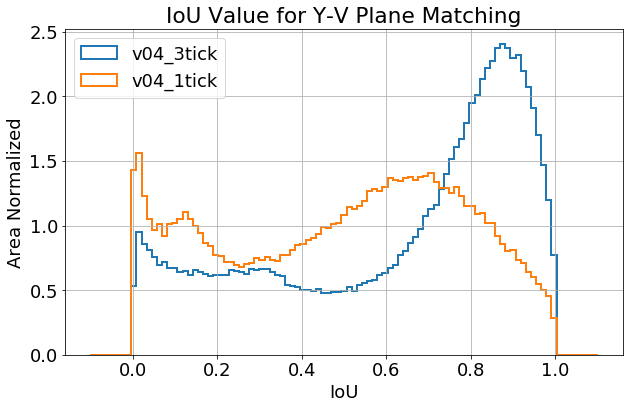

In [18]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-0.1,1.1,100)
#plt.hist(df_Matching_old['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='Old Threshold',normed=True)
#plt.hist(df_Matching_v00['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v00_CONE',normed=True)
#plt.hist(df_Matching_v01['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v01',normed=True)
#plt.hist(df_Matching_v02['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v02',normed=True)
#plt.hist(df_Matching_v03['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v03',normed=True)
plt.hist(df_Matching_v04_00_deltaY5['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v04_3tick',normed=True)
#plt.hist(df_Matching_v04_00['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v04_00',normed=True)
#plt.hist(df_Matching_v04_00_deltaY5['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v04_00_deltaY5',normed=True)
plt.hist(df_Matching_v04_00_no_cone['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v04_1tick',normed=True)

#plt.hist(df_Matching_v04_01['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v04_01',normed=True)
#plt.hist(df_Matching_v05['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v05',normed=True)
plt.title("IoU Value for Y-V Plane Matching")
plt.xlabel('IoU')
plt.ylabel('Area Normalized')
plt.grid()
plt.legend(loc=2)
plt.show()

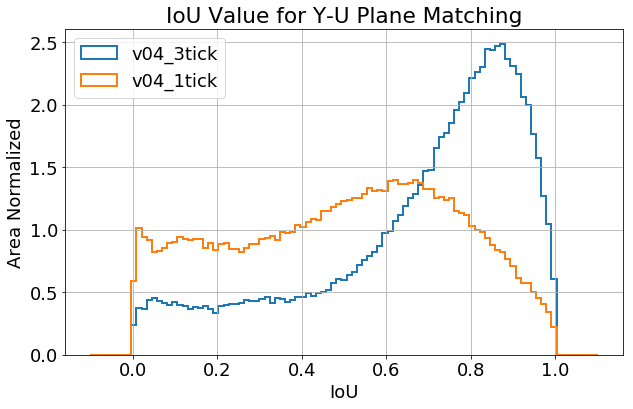

In [19]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(-0.1,1.1,100)
#plt.hist(df_Matching_old['U_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='Old Threshold',normed=True)
#plt.hist(df_Matching_v00['U_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v00',normed=True)
#plt.hist(df_Matching_v01['U_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v01',normed=True)
#plt.hist(df_Matching_v02['U_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v02',normed=True)
#plt.hist(df_Matching_v03['U_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v03',normed=True)
#plt.hist(df_Matching_v04['U_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v04',normed=True)
plt.hist(df_Matching_v04_00_deltaY5['U_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v04_3tick',normed=True)
plt.hist(df_Matching_v04_00_no_cone['U_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v04_1tick',normed=True)

#plt.hist(df_Matching_v04_01['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v04_01',normed=True)
#plt.hist(df_Matching_v05['V_biggest_iou'].values,bins=BINS,histtype='step',lw=2,label='v05',normed=True)
plt.title("IoU Value for Y-U Plane Matching")
plt.xlabel('IoU')
plt.ylabel('Area Normalized')
plt.grid()
plt.legend(loc=2)
plt.show()

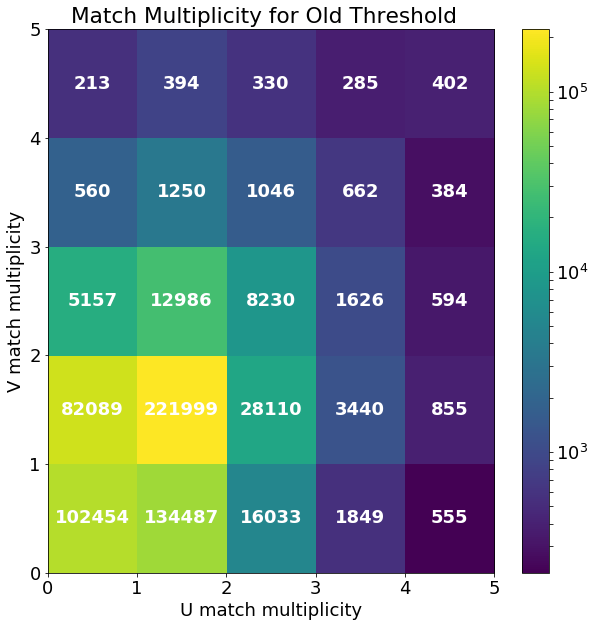

In [20]:
fig = plt.figure(figsize=(10,10))

hist, xbins, ybins, im = plt.hist2d(df_Matching_old['U_match_multiplicity'].values,df_Matching_old['V_match_multiplicity'].values, bins=(5), range=[[-0.0000001, 5], [-0.00000010, 5]] , norm=LogNorm())

for k in range(len(ybins)-1):
    for l in range(len(xbins)-1):
        plt.text(xbins[l]+0.5,ybins[k]+0.5, '%i'%(hist[k,l]), 
                color="w", ha="center", va="center", fontweight="bold")

plt.colorbar()
plt.title('Match Multiplicity for Old Threshold  ')
plt.xlabel('U match multiplicity')
plt.ylabel('V match multiplicity')


plt.show()



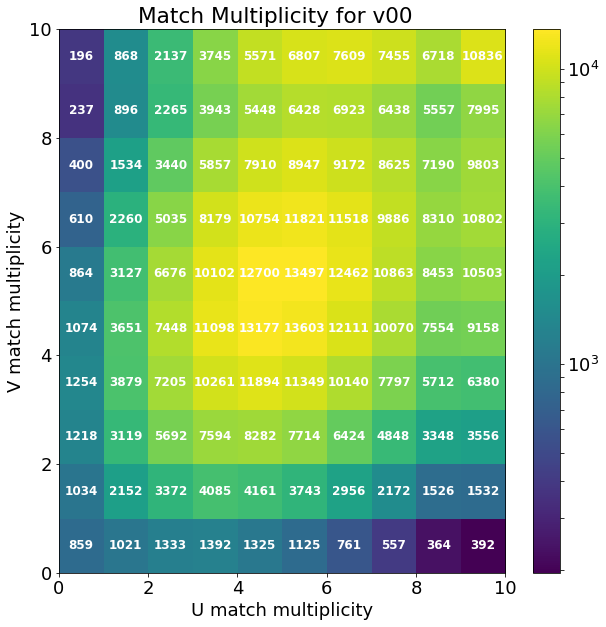

In [21]:
fig = plt.figure(figsize=(10,10))

hist, xbins, ybins, im = plt.hist2d(df_Matching_v00['U_match_multiplicity'].values,df_Matching_v00['V_match_multiplicity'].values, bins=(10), range=[[-0.0000001, 10], [-0.00000010, 10]] , norm=LogNorm())

for k in range(len(ybins)-1):
    for l in range(len(xbins)-1):
        plt.text(xbins[l]+0.5,ybins[k]+0.5, '%i'%(hist[k,l]), 
                color="w", ha="center", va="center", fontweight="bold",fontsize= 12)

plt.colorbar()
plt.title('Match Multiplicity for v00  ')
plt.xlabel('U match multiplicity')
plt.ylabel('V match multiplicity')


plt.show()
fig.savefig('multi_v00.png', dpi=200)

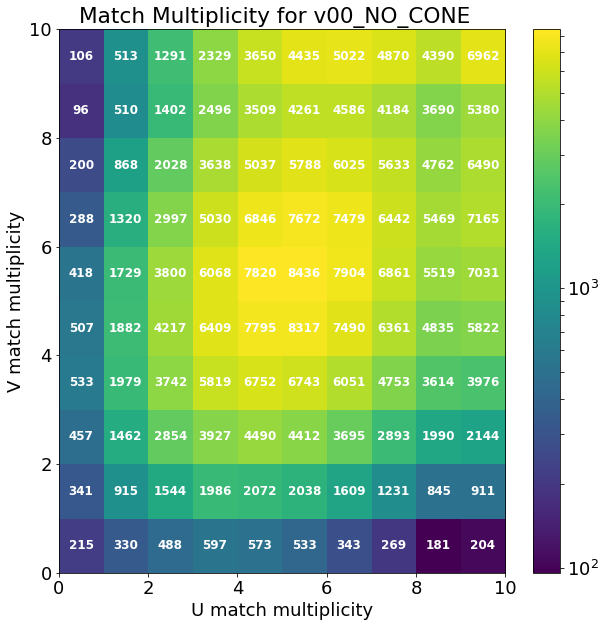

In [22]:
fig = plt.figure(figsize=(10,10))

hist, xbins, ybins, im = plt.hist2d(df_Matching_v00_NO_CONE['U_match_multiplicity'].values,df_Matching_v00_NO_CONE['V_match_multiplicity'].values, bins=(10), range=[[-0.0000001, 10], [-0.00000010, 10]] , norm=LogNorm())

for k in range(len(ybins)-1):
    for l in range(len(xbins)-1):
        plt.text(xbins[l]+0.5,ybins[k]+0.5, '%i'%(hist[k,l]), 
                color="w", ha="center", va="center", fontweight="bold",fontsize= 12)

plt.colorbar()
plt.title('Match Multiplicity for v00_NO_CONE  ')
plt.xlabel('U match multiplicity')
plt.ylabel('V match multiplicity')


plt.show()
fig.savefig('multi_v00_NO_CONE.png', dpi=200)

In [23]:
# fig = plt.figure(figsize=(10,10))

# hist, xbins, ybins, im = plt.hist2d(df_Matching_v01['U_match_multiplicity'].values,df_Matching_v01['V_match_multiplicity'].values, bins=(10), range=[[-0.0000001, 10], [-0.00000010, 10]] , norm=LogNorm())

# for k in range(len(ybins)-1):
#     for l in range(len(xbins)-1):
#         plt.text(xbins[l]+0.5,ybins[k]+0.5, '%i'%(hist[k,l]), 
#                 color="w", ha="center", va="center", fontweight="bold",fontsize= 12)

# plt.colorbar()
# plt.title('Match Multiplicity for v01  ')
# plt.xlabel('U match multiplicity')
# plt.ylabel('V match multiplicity')


# plt.show()
# fig.savefig('multi_v01.png', dpi=200)

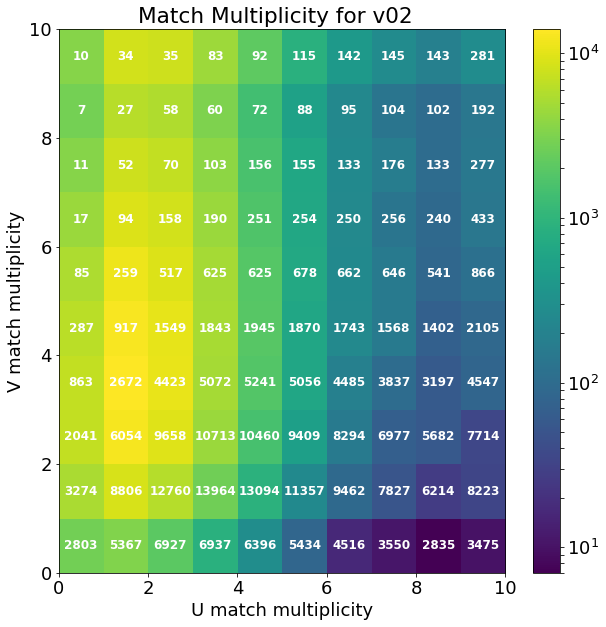

In [24]:
fig = plt.figure(figsize=(10,10))

hist, xbins, ybins, im = plt.hist2d(df_Matching_v02['U_match_multiplicity'].values,df_Matching_v02['V_match_multiplicity'].values, bins=(10), range=[[-0.0000001, 10], [-0.00000010, 10]] , norm=LogNorm())

for k in range(len(ybins)-1):
    for l in range(len(xbins)-1):
        plt.text(xbins[l]+0.5,ybins[k]+0.5, '%i'%(hist[k,l]), 
                color="w", ha="center", va="center", fontweight="bold",fontsize= 12)

plt.colorbar()
plt.title('Match Multiplicity for v02  ')
plt.xlabel('U match multiplicity')
plt.ylabel('V match multiplicity')


plt.show()
fig.savefig('multi_v02.png', dpi=200)

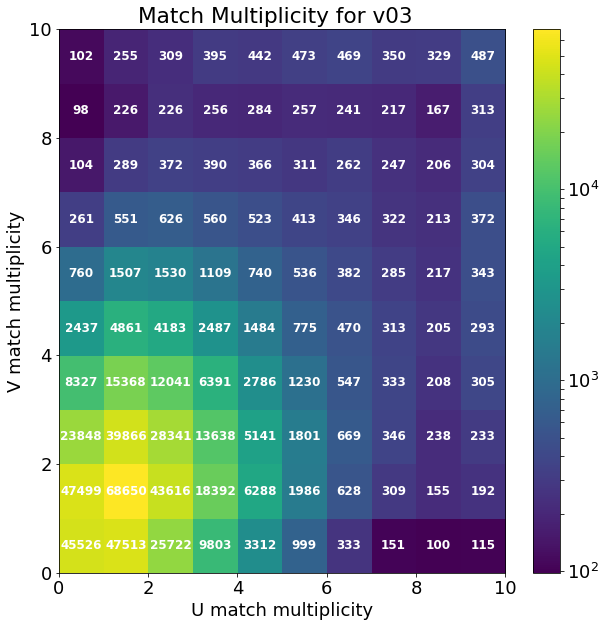

In [25]:
fig = plt.figure(figsize=(10,10))

hist, xbins, ybins, im = plt.hist2d(df_Matching_v03['U_match_multiplicity'].values,df_Matching_v03['V_match_multiplicity'].values, bins=(10), range=[[-0.0000001, 10], [-0.00000010, 10]] , norm=LogNorm())

for k in range(len(ybins)-1):
    for l in range(len(xbins)-1):
        plt.text(xbins[l]+0.5,ybins[k]+0.5, '%i'%(hist[k,l]), 
                color="w", ha="center", va="center", fontweight="bold",fontsize= 12)

plt.colorbar()
plt.title('Match Multiplicity for v03  ')
plt.xlabel('U match multiplicity')
plt.ylabel('V match multiplicity')


plt.show()
fig.savefig('multi_v03.png', dpi=200)

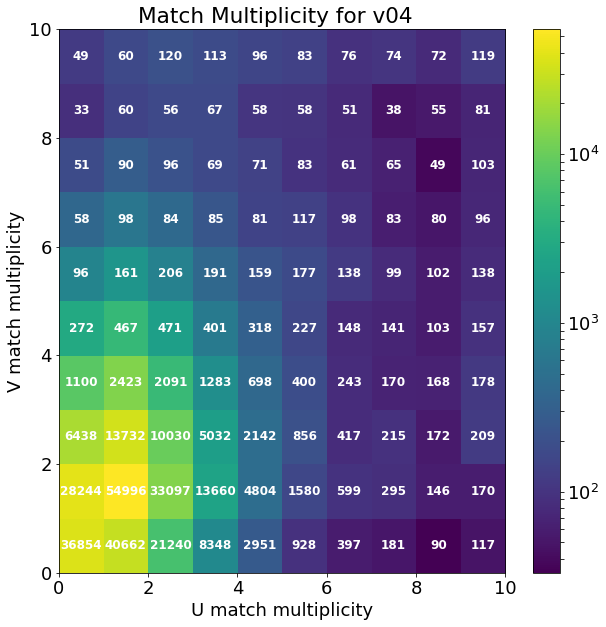

In [26]:
fig = plt.figure(figsize=(10,10))

hist, xbins, ybins, im = plt.hist2d(df_Matching_v04['U_match_multiplicity'].values,df_Matching_v04['V_match_multiplicity'].values, bins=(10), range=[[-0.0000001, 10], [-0.00000010, 10]] , norm=LogNorm())

for k in range(len(ybins)-1):
    for l in range(len(xbins)-1):
        plt.text(xbins[l]+0.5,ybins[k]+0.5, '%i'%(hist[k,l]), 
                color="w", ha="center", va="center", fontweight="bold",fontsize= 12)

plt.colorbar()
plt.title('Match Multiplicity for v04  ')
plt.xlabel('U match multiplicity')
plt.ylabel('V match multiplicity')


plt.show()
fig.savefig('multi_v04.png', dpi=200)

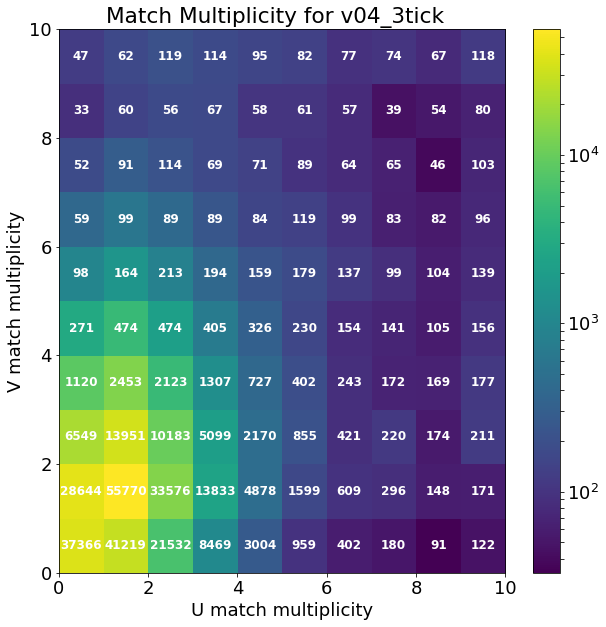

In [27]:
fig = plt.figure(figsize=(10,10))

hist, xbins, ybins, im = plt.hist2d(df_Matching_v04_00_deltaY5['U_match_multiplicity'].values,df_Matching_v04_00_deltaY5['V_match_multiplicity'].values, bins=(10), range=[[-0.0000001, 10], [-0.00000010, 10]] , norm=LogNorm())

for k in range(len(ybins)-1):
    for l in range(len(xbins)-1):
        plt.text(xbins[l]+0.5,ybins[k]+0.5, '%i'%(hist[k,l]), 
                color="w", ha="center", va="center", fontweight="bold",fontsize= 12)

plt.colorbar()
plt.title('Match Multiplicity for v04_3tick  ')
plt.xlabel('U match multiplicity')
plt.ylabel('V match multiplicity')


plt.show()
fig.savefig('multi_v04_3tick.png', dpi=200)

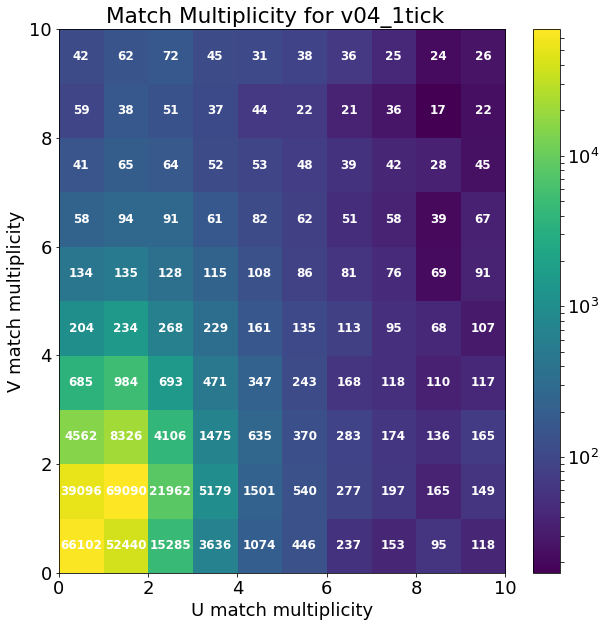

In [28]:
fig = plt.figure(figsize=(10,10))

hist, xbins, ybins, im = plt.hist2d(df_Matching_v04_00_no_cone['U_match_multiplicity'].values,df_Matching_v04_00_no_cone['V_match_multiplicity'].values, bins=(10), range=[[-0.0000001, 10], [-0.00000010, 10]] , norm=LogNorm())

for k in range(len(ybins)-1):
    for l in range(len(xbins)-1):
        plt.text(xbins[l]+0.5,ybins[k]+0.5, '%i'%(hist[k,l]), 
                color="w", ha="center", va="center", fontweight="bold",fontsize= 12)

plt.colorbar()
plt.title('Match Multiplicity for v04_1tick  ')
plt.xlabel('U match multiplicity')
plt.ylabel('V match multiplicity')


plt.show()
fig.savefig('multi_v04_1tick.png', dpi=200)

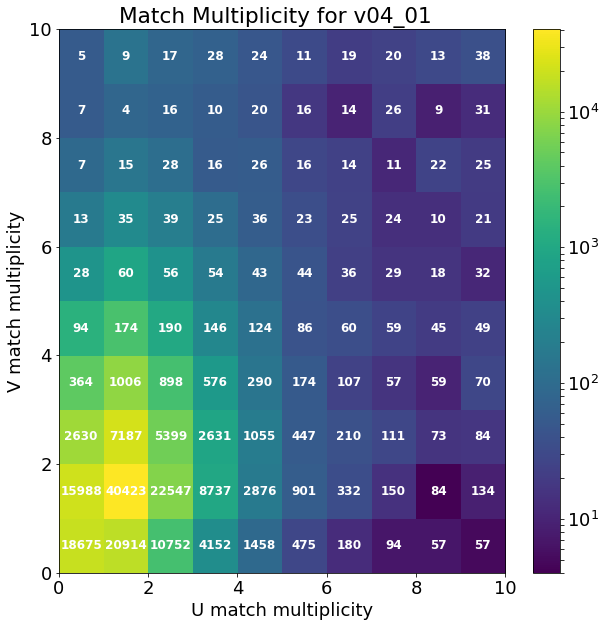

In [29]:
fig = plt.figure(figsize=(10,10))

hist, xbins, ybins, im = plt.hist2d(df_Matching_v04_01['U_match_multiplicity'].values,df_Matching_v04_01['V_match_multiplicity'].values, bins=(10), range=[[-0.0000001, 10], [-0.00000010, 10]] , norm=LogNorm())

for k in range(len(ybins)-1):
    for l in range(len(xbins)-1):
        plt.text(xbins[l]+0.5,ybins[k]+0.5, '%i'%(hist[k,l]), 
                color="w", ha="center", va="center", fontweight="bold",fontsize= 12)

plt.colorbar()
plt.title('Match Multiplicity for v04_01  ')
plt.xlabel('U match multiplicity')
plt.ylabel('V match multiplicity')


plt.show()
fig.savefig('multi_v04_01.png', dpi=200)

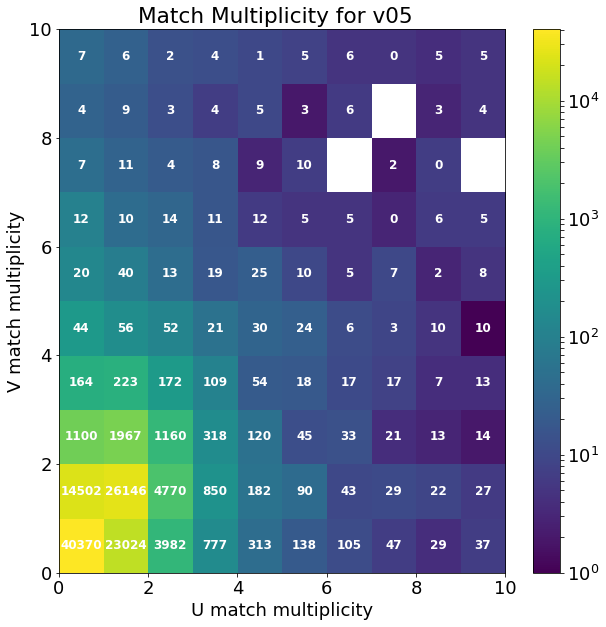

In [30]:
fig = plt.figure(figsize=(10,10))

hist, xbins, ybins, im = plt.hist2d(df_Matching_v05['U_match_multiplicity'].values,df_Matching_v05['V_match_multiplicity'].values, bins=(10), range=[[-0.0000001, 10], [-0.00000010, 10]] , norm=LogNorm())

for k in range(len(ybins)-1):
    for l in range(len(xbins)-1):
        plt.text(xbins[l]+0.5,ybins[k]+0.5, '%i'%(hist[k,l]), 
                color="w", ha="center", va="center", fontweight="bold",fontsize= 12)

plt.colorbar()
plt.title('Match Multiplicity for v05  ')
plt.xlabel('U match multiplicity')
plt.ylabel('V match multiplicity')


plt.show()
fig.savefig('multi_v05.png', dpi=200)

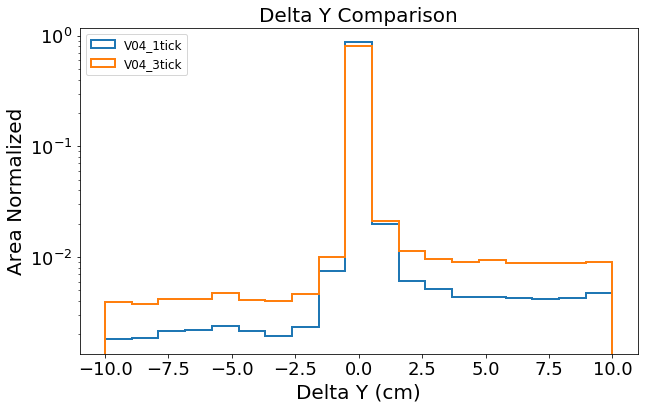

In [31]:
fig = plt.figure(figsize=(10,6))

BINS=np.linspace(-10,10,20)
#plt.hist(df_Matching_old['deltaY'].values, bins=BINS,histtype='step',lw=2,label='Old Threshold',density=True)
#plt.hist(df_Matching_v00_NO_CONE['deltaY'].values, bins=BINS,histtype='step',lw=2,label='v00_NO_CONE',density=True)
#plt.hist(df_Matching_v01_NO_CONE['deltaY'].values, bins=BINS,histtype='step',lw=2,label='v01_NO_CONE',density=True)
#plt.hist(df_Matching_v02_NO_CONE['deltaY'].values, bins=BINS,histtype='step',lw=2,label='v02_NO_CONE',density=True)
#plt.hist(df_Matching_v03_NO_CONE['deltaY'].values, bins=BINS,histtype='step',lw=2,label='v03_NO_CONE',density=True)
#plt.hist(df_Matching_v04_NO_CONE['deltaY'].values, bins=BINS,histtype='step',lw=2,label='v04_NO_CONE',density=True)
#plt.hist(df_Matching_v04_SKIP_TRACK['deltaY'].values, bins=BINS,histtype='step',lw=2,label='v04_SKIP_TRACK',density=True)

#plt.hist(df_Matching_v05_NO_CONE['deltaY'].values, bins=BINS,histtype='step',lw=2,label='v05_NO_CONE',density=True)
#plt.hist(df_Matching_v01['deltaY'].values, bins=BINS,histtype='step',lw=2,label='v01',density=True)
#plt.hist(df_Matching_v02['deltaY'].values, bins=BINS,histtype='step',lw=2,label='v02',density=True)
#plt.hist(df_Matching_v03['deltaY'].values, bins=BINS,histtype='step',lw=2,label='V03',density=True)
#plt.hist(df_Matching_v04['deltaY'].values, bins=BINS,histtype='step',lw=2,label='V04',density=True)
plt.hist(df_Matching_v04_00_no_cone['deltaY'].values, bins=BINS,histtype='step',lw=2,label='V04_1tick',density=True)
plt.hist(df_Matching_v04_00_deltaY5['deltaY'].values, bins=BINS,histtype='step',lw=2,label='V04_3tick',density=True)
#plt.hist(df_Matching_v05['deltaY'].values, bins=BINS,histtype='step',lw=2,label='V05',density=True)

plt.yscale('log')
plt.legend(loc=2,prop={'size': 12})
plt.xlabel("Delta Y (cm)",fontsize=20)
plt.ylabel('Area Normalized',fontsize=20)
plt.title('Delta Y Comparison',fontsize=20)

plt.show()
fig.savefig('deltaY_Comparison.png', dpi=500)

In [32]:
df_Matching_old_match=df_Matching_old.query(MATCH_CUT)
df_Matching_v00_match=df_Matching_v00.query(MATCH_CUT)
df_Matching_v00_NO_CONE_match=df_Matching_v00_NO_CONE.query(MATCH_CUT)
df_Matching_v01_NO_CONE_match=df_Matching_v01_NO_CONE.query(MATCH_CUT)
df_Matching_v02_NO_CONE_match=df_Matching_v02_NO_CONE.query(MATCH_CUT)
df_Matching_v03_NO_CONE_match=df_Matching_v03_NO_CONE.query(MATCH_CUT)
df_Matching_v04_NO_CONE_match=df_Matching_v04_00_no_cone.query(MATCH_CUT)
df_Matching_v04_SKIP_TRACK_match=df_Matching_v04_SKIP_TRACK.query(MATCH_CUT)
df_Matching_v05_NO_CONE_match=df_Matching_v05_NO_CONE.query(MATCH_CUT)

df_Matching_MCC9_match=df_Matching_MCC9.query(MATCH_CUT)
#df_Matching_v01_match=df_Matching_v01.query(MATCH_CUT)
df_Matching_v02_match=df_Matching_v02.query(MATCH_CUT)
df_Matching_v03_match=df_Matching_v03.query(MATCH_CUT)
df_Matching_v04_match=df_Matching_v04.query(MATCH_CUT)
df_Matching_v04_00_match=df_Matching_v04_00.query(MATCH_CUT)
df_Matching_v04_00_no_cone_match=df_Matching_v04_00_no_cone.query(MATCH_CUT)
df_Matching_v04_00_deltaY5_match=df_Matching_v04_00_deltaY5.query(MATCH_CUT)
df_Matching_v04_01_match=df_Matching_v04_01.query(MATCH_CUT)
df_Matching_default_match=df_Matching_default.query(MATCH_CUT)
df_Matching_default_no_cone_match=df_Matching_default_no_cone.query(MATCH_CUT)

df_Matching_v05_match=df_Matching_v05.query(MATCH_CUT)

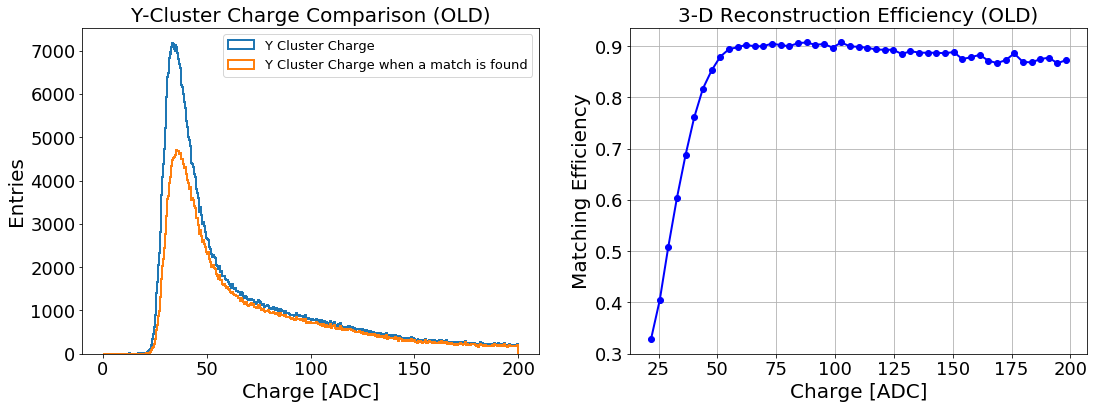

In [33]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_old['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_old_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (OLD)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

vals2D_old, bins2D_old = np.histogram(df_Matching_old['Y_cluster_charge'].values,bins=BINS)
vals3D_old, bins3D_old = np.histogram(df_Matching_old_match['Y_cluster_charge'].values,bins=BINS)
binC_old = 0.5*(bins2D_old[1:]+bins2D_old[:-1])
vals2D_old = vals2D_old.astype(float)
#print vals2D
vals3D_old = vals3D_old.astype(float)
ratio_v_old = []
for i,v in enumerate(vals2D_old):
    if (v == 0):
        ratio_v_old.append(0.)
    else:
        ratio_v_old.append(vals3D_old[i]/v)
#print ratio_v
plt.plot(binC_old,ratio_v_old,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (OLD)',fontsize=20)

plt.show()



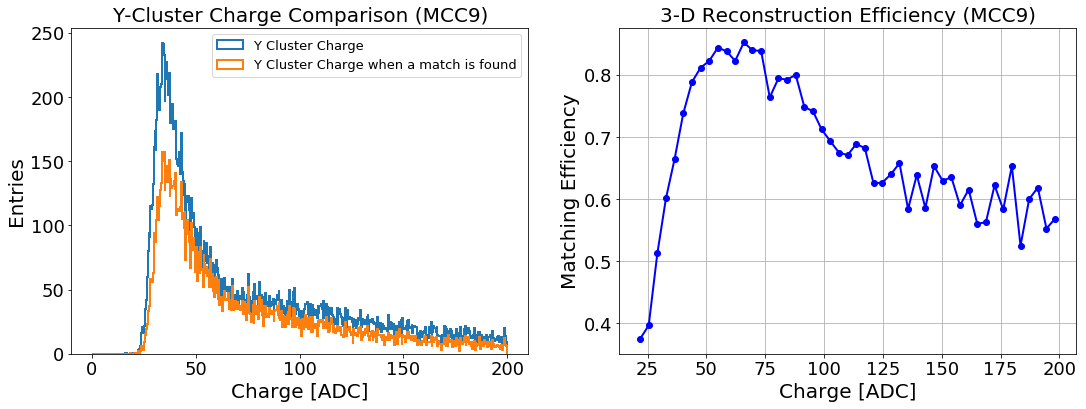

In [34]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_MCC9['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_MCC9_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (MCC9)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

vals2D_MCC9, bins2D_MCC9 = np.histogram(df_Matching_MCC9['Y_cluster_charge'].values,bins=BINS)
vals3D_MCC9, bins3D_MCC9 = np.histogram(df_Matching_MCC9_match['Y_cluster_charge'].values,bins=BINS)
binC_MCC9 = 0.5*(bins2D_MCC9[1:]+bins2D_MCC9[:-1])
vals2D_MCC9 = vals2D_MCC9.astype(float)
#print vals2D
vals3D_MCC9 = vals3D_MCC9.astype(float)
ratio_v_MCC9 = []
for i,v in enumerate(vals2D_MCC9):
    if (v == 0):
        ratio_v_MCC9.append(0.)
    else:
        ratio_v_MCC9.append(vals3D_MCC9[i]/v)
#print ratio_v
plt.plot(binC_MCC9,ratio_v_MCC9,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (MCC9)',fontsize=20)

plt.show()


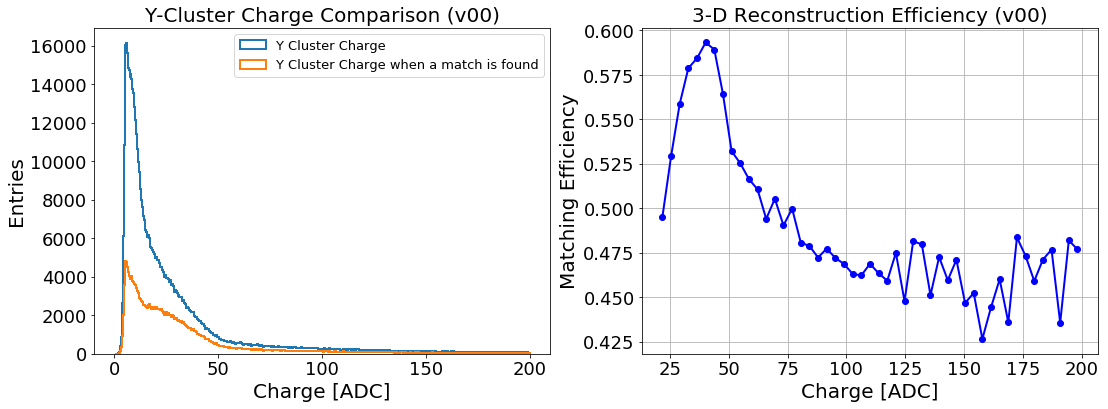

In [35]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_v00['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_v00_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (v00)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

vals2D_v00, bins2D_v00 = np.histogram(df_Matching_v00['Y_cluster_charge'].values,bins=BINS)
vals3D_v00, bins3D_v00 = np.histogram(df_Matching_v00_match['Y_cluster_charge'].values,bins=BINS)
binC_v00 = 0.5*(bins2D_v00[1:]+bins2D_v00[:-1])
vals2D_v00 = vals2D_v00.astype(float)
#print vals2D
vals3D_v00 = vals3D_v00.astype(float)
ratio_v_v00 = []
for i,v in enumerate(vals2D_v00):
    if (v == 0):
        ratio_v_v00.append(0.)
    else:
        ratio_v_v00.append(vals3D_v00[i]/v)
#print ratio_v
plt.plot(binC_v00,ratio_v_v00,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v00)',fontsize=20)

plt.show()


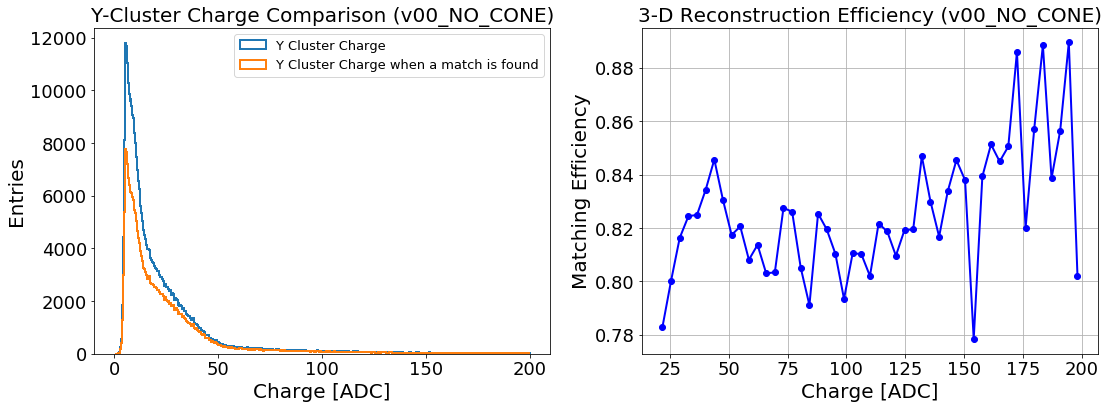

In [36]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_v00_NO_CONE['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_v00_NO_CONE_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (v00_NO_CONE)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

vals2D_v00_NO_CONE, bins2D_v00_NO_CONE = np.histogram(df_Matching_v00_NO_CONE['Y_cluster_charge'].values,bins=BINS)
vals3D_v00_NO_CONE, bins3D_v00_NO_CONE = np.histogram(df_Matching_v00_NO_CONE_match['Y_cluster_charge'].values,bins=BINS)
binC_v00_NO_CONE = 0.5*(bins2D_v00_NO_CONE[1:]+bins2D_v00[:-1])
vals2D_v00_NO_CONE = vals2D_v00_NO_CONE.astype(float)
#print vals2D
vals3D_v00_NO_CONE = vals3D_v00_NO_CONE.astype(float)
ratio_v_v00_NO_CONE = []
for i,v in enumerate(vals2D_v00_NO_CONE):
    if (v == 0):
        ratio_v_v00_NO_CONE.append(0.)
    else:
        ratio_v_v00_NO_CONE.append(vals3D_v00_NO_CONE[i]/v)
#print ratio_v
plt.plot(binC_v00_NO_CONE,ratio_v_v00_NO_CONE,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v00_NO_CONE)',fontsize=20)

plt.show()


In [37]:
# fig = plt.figure(figsize=(18,6))

# plt.subplot(1, 2, 1)

# BINS = np.linspace(0.1,200,500)
# plt.hist(df_Matching_v01['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
# plt.hist(df_Matching_v01_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
# plt.xlabel("Charge [ADC]",fontsize=20)
# plt.ylabel('Entries',fontsize=20)
# plt.title('Y-Cluster Charge Comparison (v01)',fontsize=20)


# plt.legend(loc=1,fontsize=13)
# plt.subplot(1, 2, 2)
# #fig = plt.figure(figsize=(18,6))

# BINS = np.linspace(20,200,50)

# vals2D_v01, bins2D_v01 = np.histogram(df_Matching_v01['Y_cluster_charge'].values,bins=BINS)
# vals3D_v01, bins3D_v01 = np.histogram(df_Matching_v01_match['Y_cluster_charge'].values,bins=BINS)
# binC_v01 = 0.5*(bins2D_v01[1:]+bins2D_v01[:-1])
# vals2D_v01 = vals2D_v01.astype(float)
# #print vals2D
# vals3D_v01 = vals3D_v01.astype(float)
# ratio_v_v01 = []
# for i,v in enumerate(vals2D_v01):
#     if (v == 0):
#         ratio_v_v01.append(0.)
#     else:
#         ratio_v_v01.append(vals3D_v01[i]/v)
# #print ratio_v
# plt.plot(binC_v01,ratio_v_v01,'bo-',lw=2)
# plt.grid()
# plt.xlabel("Charge [ADC]",fontsize=20)
# plt.ylabel('Matching Efficiency',fontsize=20)
# plt.title('3-D Reconstruction Efficiency (v01)',fontsize=20)

# plt.show()


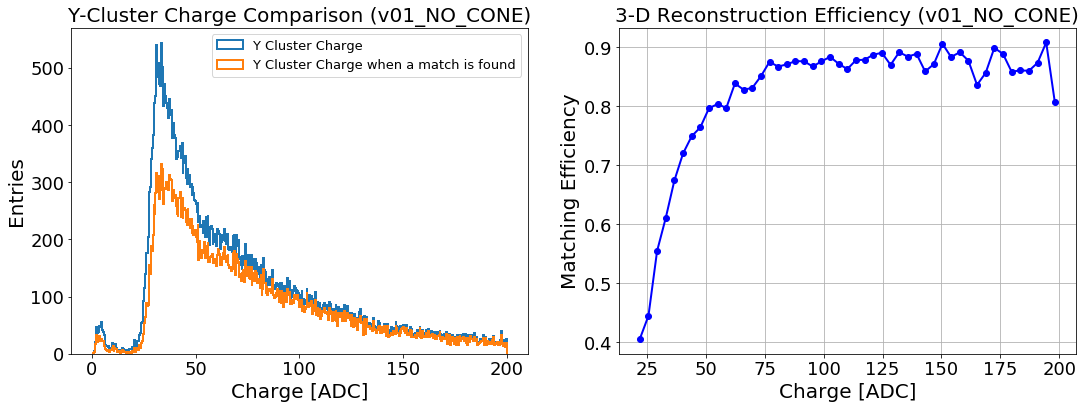

In [38]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_v01_NO_CONE['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_v01_NO_CONE_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (v01_NO_CONE)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

vals2D_v01_NO_CONE, bins2D_v01_NO_CONE = np.histogram(df_Matching_v01_NO_CONE['Y_cluster_charge'].values,bins=BINS)
vals3D_v01_NO_CONE, bins3D_v01_NO_CONE = np.histogram(df_Matching_v01_NO_CONE_match['Y_cluster_charge'].values,bins=BINS)
binC_v01_NO_CONE = 0.5*(bins2D_v01_NO_CONE[1:]+bins2D_v01_NO_CONE[:-1])
vals2D_v01_NO_CONE = vals2D_v01_NO_CONE.astype(float)
#print vals2D
vals3D_v01_NO_CONE = vals3D_v01_NO_CONE.astype(float)
ratio_v_v01_NO_CONE = []
for i,v in enumerate(vals2D_v01_NO_CONE):
    if (v == 0):
        ratio_v_v01_NO_CONE.append(0.)
    else:
        ratio_v_v01_NO_CONE.append(vals3D_v01_NO_CONE[i]/v)
#print ratio_v
plt.plot(binC_v01_NO_CONE,ratio_v_v01_NO_CONE,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v01_NO_CONE)',fontsize=20)

plt.show()


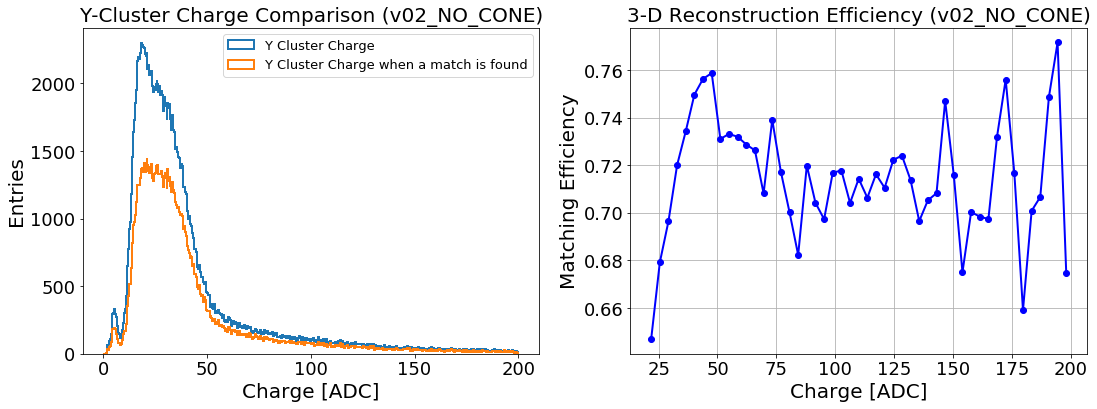

In [39]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_v02_NO_CONE['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_v02_NO_CONE_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (v02_NO_CONE)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

vals2D_v02_NO_CONE, bins2D_v02_NO_CONE = np.histogram(df_Matching_v02_NO_CONE['Y_cluster_charge'].values,bins=BINS)
vals3D_v02_NO_CONE, bins3D_v02_NO_CONE = np.histogram(df_Matching_v02_NO_CONE_match['Y_cluster_charge'].values,bins=BINS)
binC_v02_NO_CONE = 0.5*(bins2D_v02_NO_CONE[1:]+bins2D_v02_NO_CONE[:-1])
vals2D_v02_NO_CONE = vals2D_v02_NO_CONE.astype(float)
#print vals2D
vals3D_v02_NO_CONE = vals3D_v02_NO_CONE.astype(float)
ratio_v_v02_NO_CONE = []
for i,v in enumerate(vals2D_v02_NO_CONE):
    if (v == 0):
        ratio_v_v02_NO_CONE.append(0.)
    else:
        ratio_v_v02_NO_CONE.append(vals3D_v02_NO_CONE[i]/v)
#print ratio_v
plt.plot(binC_v02_NO_CONE,ratio_v_v02_NO_CONE,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v02_NO_CONE)',fontsize=20)

plt.show()


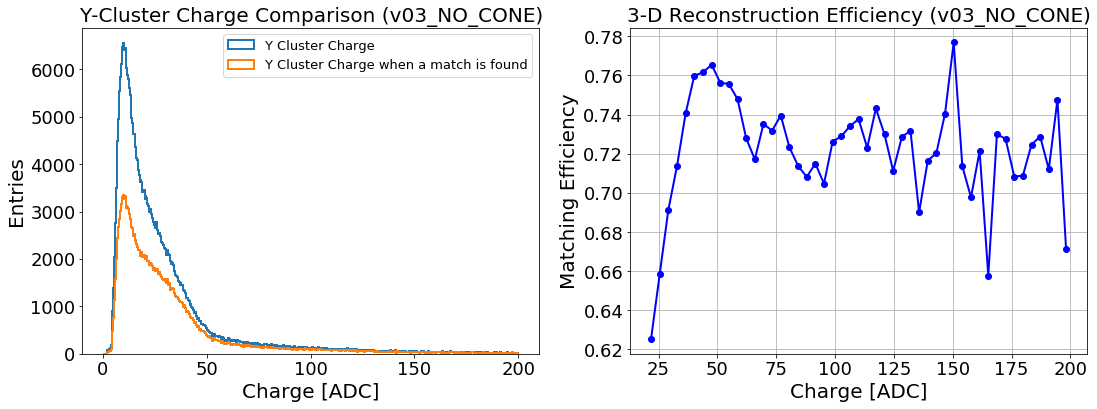

In [40]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_v03_NO_CONE['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_v03_NO_CONE_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (v03_NO_CONE)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

vals2D_v03_NO_CONE, bins2D_v03_NO_CONE = np.histogram(df_Matching_v03_NO_CONE['Y_cluster_charge'].values,bins=BINS)
vals3D_v03_NO_CONE, bins3D_v03_NO_CONE = np.histogram(df_Matching_v03_NO_CONE_match['Y_cluster_charge'].values,bins=BINS)
binC_v03_NO_CONE = 0.5*(bins2D_v03_NO_CONE[1:]+bins2D_v03_NO_CONE[:-1])
vals2D_v03_NO_CONE = vals2D_v03_NO_CONE.astype(float)
#print vals2D
vals3D_v03_NO_CONE = vals3D_v03_NO_CONE.astype(float)
ratio_v_v03_NO_CONE = []
for i,v in enumerate(vals2D_v03_NO_CONE):
    if (v == 0):
        ratio_v_v03_NO_CONE.append(0.)
    else:
        ratio_v_v03_NO_CONE.append(vals3D_v03_NO_CONE[i]/v)
#print ratio_v
plt.plot(binC_v03_NO_CONE,ratio_v_v03_NO_CONE,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v03_NO_CONE)',fontsize=20)

plt.show()


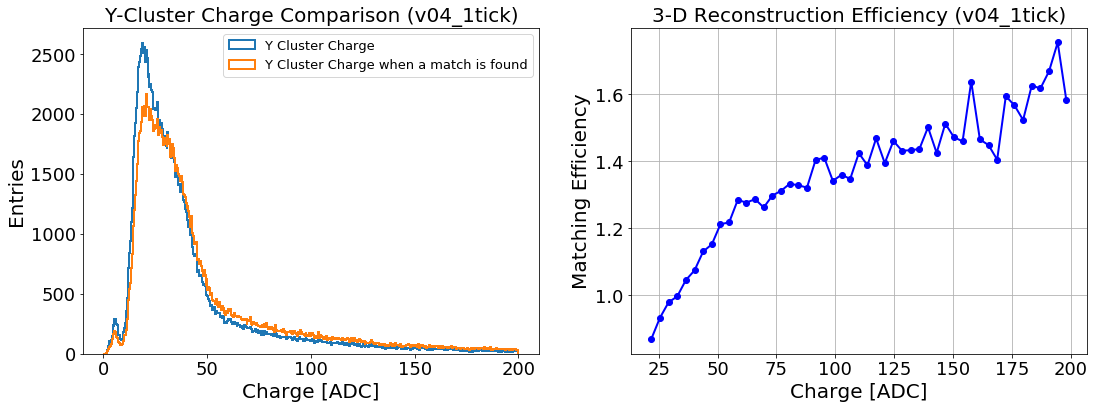

In [41]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_v04_NO_CONE['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_v04_NO_CONE_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (v04_1tick)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

vals2D_v04_NO_CONE, bins2D_v04_NO_CONE = np.histogram(df_Matching_v04_NO_CONE['Y_cluster_charge'].values,bins=BINS)
vals3D_v04_NO_CONE, bins3D_v04_NO_CONE = np.histogram(df_Matching_v04_NO_CONE_match['Y_cluster_charge'].values,bins=BINS)
binC_v04_NO_CONE = 0.5*(bins2D_v04_NO_CONE[1:]+bins2D_v04_NO_CONE[:-1])
vals2D_v04_NO_CONE = vals2D_v04_NO_CONE.astype(float)
#print vals2D
vals3D_v04_NO_CONE = vals3D_v04_NO_CONE.astype(float)
ratio_v_v04_NO_CONE = []
for i,v in enumerate(vals2D_v04_NO_CONE):
    if (v == 0):
        ratio_v_v04_NO_CONE.append(0.)
    else:
        ratio_v_v04_NO_CONE.append(vals3D_v04_NO_CONE[i]/v)
#print ratio_v
plt.plot(binC_v04_NO_CONE,ratio_v_v04_NO_CONE,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v04_1tick)',fontsize=20)

plt.show()


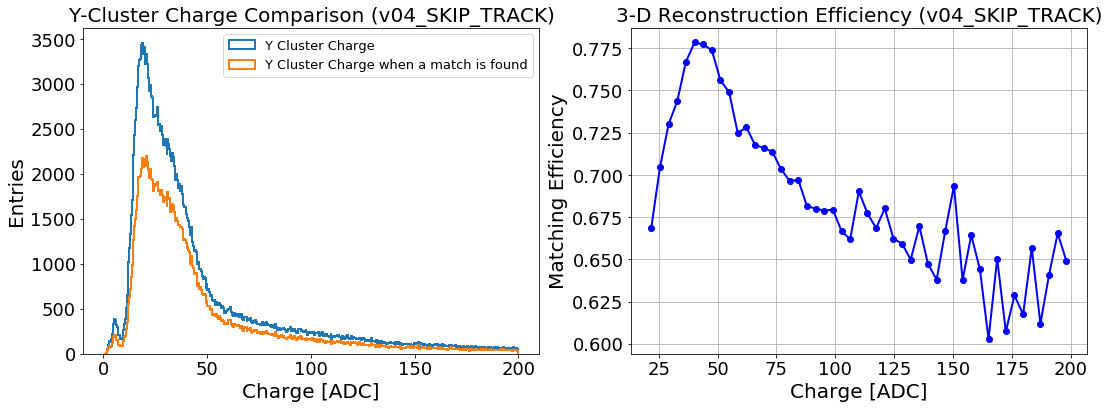

In [42]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_v04_SKIP_TRACK['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_v04_SKIP_TRACK_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (v04_SKIP_TRACK)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

vals2D_v04_SKIP_TRACK, bins2D_v04_SKIP_TRACK = np.histogram(df_Matching_v04_SKIP_TRACK['Y_cluster_charge'].values,bins=BINS)
vals3D_v04_SKIP_TRACK, bins3D_v04_SKIP_TRACK = np.histogram(df_Matching_v04_SKIP_TRACK_match['Y_cluster_charge'].values,bins=BINS)
binC_v04_SKIP_TRACK = 0.5*(bins2D_v04_SKIP_TRACK[1:]+bins2D_v04_SKIP_TRACK[:-1])
vals2D_v04_SKIP_TRACK = vals2D_v04_SKIP_TRACK.astype(float)
#print vals2D
vals3D_v04_SKIP_TRACK = vals3D_v04_SKIP_TRACK.astype(float)
ratio_v_v04_SKIP_TRACK = []
for i,v in enumerate(vals2D_v04_SKIP_TRACK):
    if (v == 0):
        ratio_v_v04_SKIP_TRACK.append(0.)
    else:
        ratio_v_v04_SKIP_TRACK.append(vals3D_v04_SKIP_TRACK[i]/v)
#print ratio_v
plt.plot(binC_v04_SKIP_TRACK,ratio_v_v04_SKIP_TRACK,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v04_SKIP_TRACK)',fontsize=20)

plt.show()


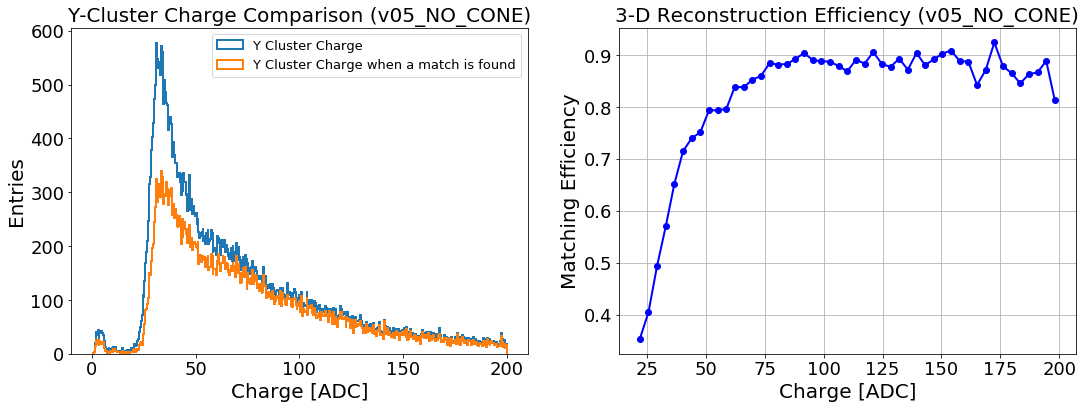

In [43]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_v05_NO_CONE['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_v05_NO_CONE_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (v05_NO_CONE)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

vals2D_v05_NO_CONE, bins2D_v05_NO_CONE = np.histogram(df_Matching_v05_NO_CONE['Y_cluster_charge'].values,bins=BINS)
vals3D_v05_NO_CONE, bins3D_v05_NO_CONE = np.histogram(df_Matching_v05_NO_CONE_match['Y_cluster_charge'].values,bins=BINS)
binC_v05_NO_CONE = 0.5*(bins2D_v05_NO_CONE[1:]+bins2D_v05_NO_CONE[:-1])
vals2D_v05_NO_CONE = vals2D_v05_NO_CONE.astype(float)
#print vals2D
vals3D_v05_NO_CONE = vals3D_v05_NO_CONE.astype(float)
ratio_v_v05_NO_CONE = []
for i,v in enumerate(vals2D_v05_NO_CONE):
    if (v == 0):
        ratio_v_v05_NO_CONE.append(0.)
    else:
        ratio_v_v05_NO_CONE.append(vals3D_v05_NO_CONE[i]/v)
#print ratio_v
plt.plot(binC_v05_NO_CONE,ratio_v_v05_NO_CONE,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v05_NO_CONE)',fontsize=20)

plt.show()


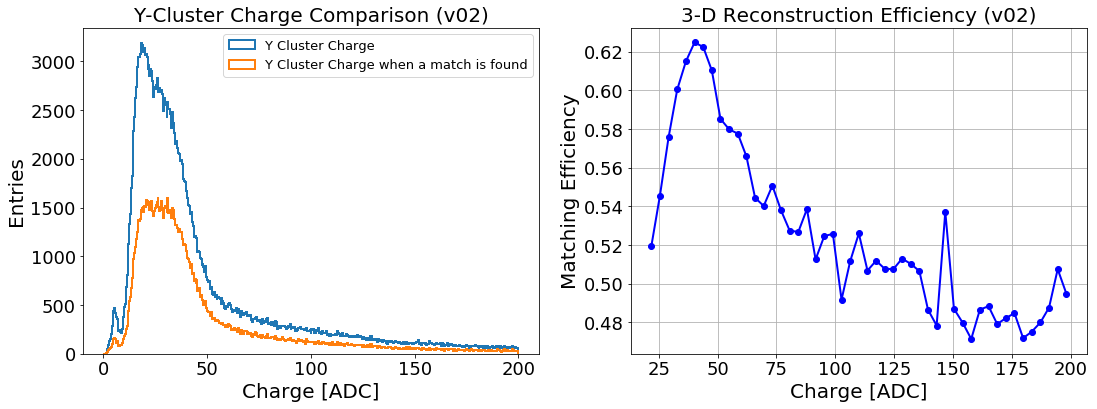

In [44]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_v02['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_v02_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (v02)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

vals2D_v02, bins2D_v02 = np.histogram(df_Matching_v02['Y_cluster_charge'].values,bins=BINS)
vals3D_v02, bins3D_v02 = np.histogram(df_Matching_v02_match['Y_cluster_charge'].values,bins=BINS)
binC_v02 = 0.5*(bins2D_v02[1:]+bins2D_v02[:-1])
vals2D_v02 = vals2D_v02.astype(float)
#print vals2D
vals3D_v02 = vals3D_v02.astype(float)
ratio_v_v02 = []
for i,v in enumerate(vals2D_v02):
    if (v == 0):
        ratio_v_v02.append(0.)
    else:
        ratio_v_v02.append(vals3D_v02[i]/v)
#print ratio_v
plt.plot(binC_v02,ratio_v_v02,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v02)',fontsize=20)

plt.show()


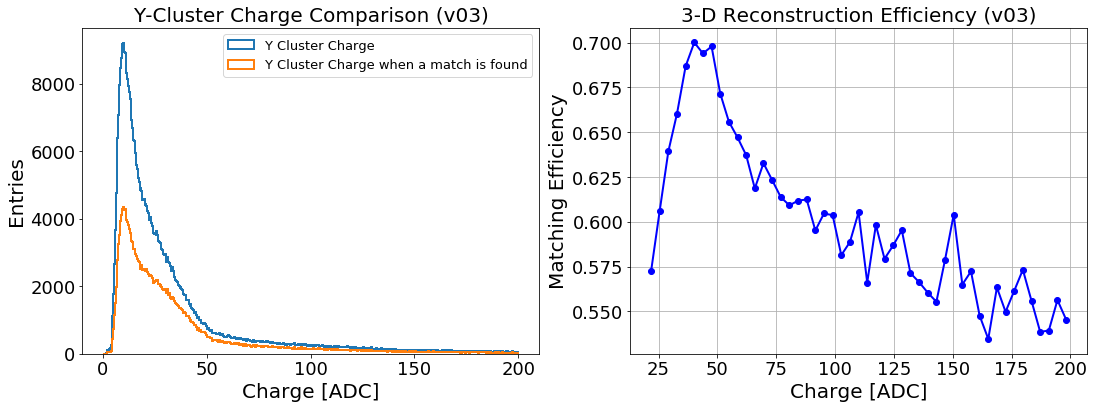

In [45]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_v03['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_v03_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (v03)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

vals2D_v03, bins2D_v03 = np.histogram(df_Matching_v03['Y_cluster_charge'].values,bins=BINS)
vals3D_v03, bins3D_v03 = np.histogram(df_Matching_v03_match['Y_cluster_charge'].values,bins=BINS)
binC_v03 = 0.5*(bins2D_v03[1:]+bins2D_v03[:-1])
vals2D_v03 = vals2D_v03.astype(float)
#print vals2D
vals3D_v03 = vals3D_v03.astype(float)
ratio_v_v03 = []
for i,v in enumerate(vals2D_v03):
    if (v == 0):
        ratio_v_v03.append(0.)
    else:
        ratio_v_v03.append(vals3D_v03[i]/v)
#print ratio_v
plt.plot(binC_v03,ratio_v_v03,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v03)',fontsize=20)

plt.show()

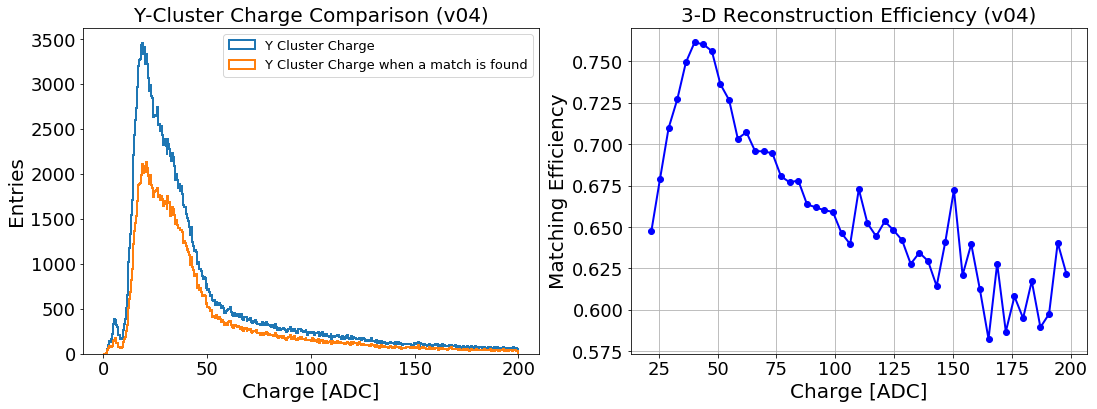

In [46]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_v04['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_v04_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (v04)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

vals2D_v04, bins2D_v04 = np.histogram(df_Matching_v04['Y_cluster_charge'].values,bins=BINS)
vals3D_v04, bins3D_v04 = np.histogram(df_Matching_v04_match['Y_cluster_charge'].values,bins=BINS)
binC_v04 = 0.5*(bins2D_v04[1:]+bins2D_v04[:-1])
vals2D_v04 = vals2D_v04.astype(float)
#print vals2D
vals3D_v04 = vals3D_v04.astype(float)
ratio_v_v04 = []
for i,v in enumerate(vals2D_v04):
    if (v == 0):
        ratio_v_v04.append(0.)
    else:
        ratio_v_v04.append(vals3D_v04[i]/v)
#print ratio_v
plt.plot(binC_v04,ratio_v_v04,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v04)',fontsize=20)

plt.show()

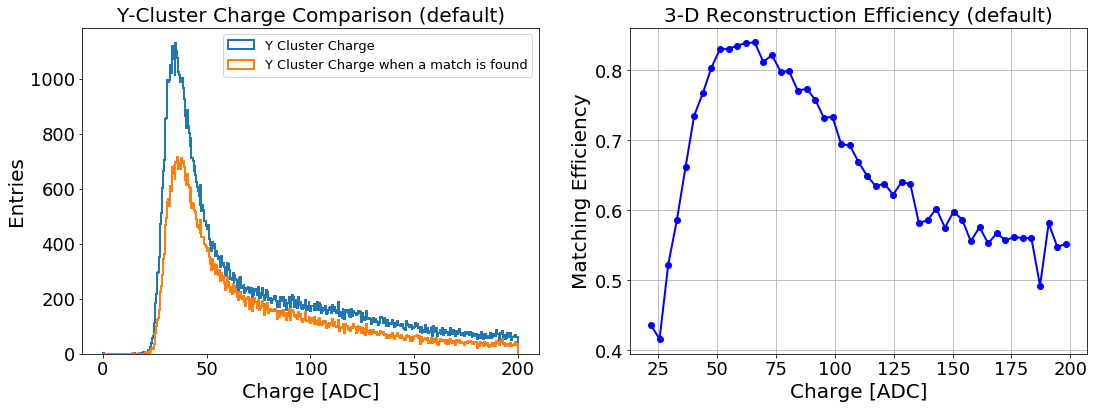

In [47]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_default['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_default_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (default)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

vals2D_default, bins2D_default = np.histogram(df_Matching_default['Y_cluster_charge'].values,bins=BINS)
vals3D_default, bins3D_default = np.histogram(df_Matching_default_match['Y_cluster_charge'].values,bins=BINS)
binC_default = 0.5*(bins2D_default[1:]+bins2D_default[:-1])
vals2D_default = vals2D_default.astype(float)
#print vals2D
vals3D_default = vals3D_default.astype(float)
ratio_v_default = []
for i,v in enumerate(vals2D_default):
    if (v == 0):
        ratio_v_default.append(0.)
    else:
        ratio_v_default.append(vals3D_default[i]/v)
#print ratio_v
plt.plot(binC_default,ratio_v_default,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (default)',fontsize=20)

plt.show()

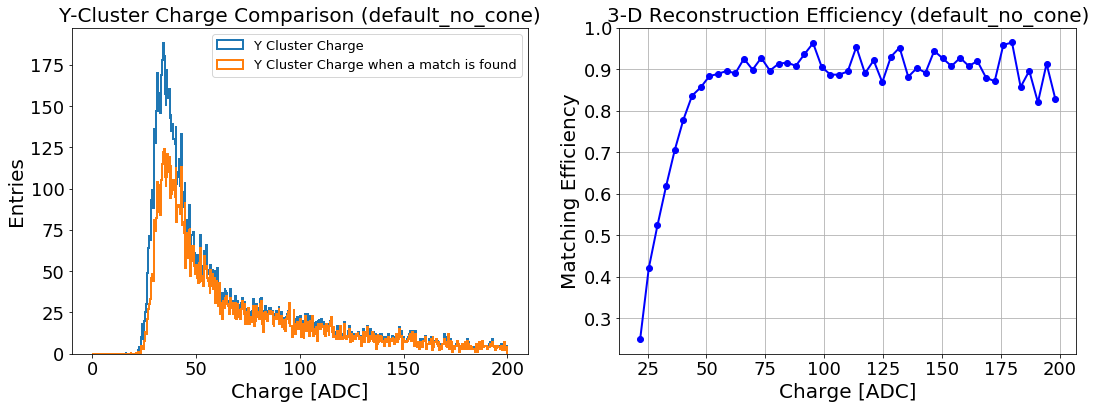

In [48]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_default_no_cone['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_default_no_cone_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (default_no_cone)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

vals2D_default_no_cone, bins2D_default_no_cone = np.histogram(df_Matching_default_no_cone['Y_cluster_charge'].values,bins=BINS)
vals3D_default_no_cone, bins3D_default_no_cone = np.histogram(df_Matching_default_no_cone_match['Y_cluster_charge'].values,bins=BINS)
binC_default_no_cone = 0.5*(bins2D_default_no_cone[1:]+bins2D_default_no_cone[:-1])
vals2D_default_no_cone = vals2D_default_no_cone.astype(float)
#print vals2D
vals3D_default_no_cone = vals3D_default_no_cone.astype(float)
ratio_v_default_no_cone = []
for i,v in enumerate(vals2D_default_no_cone):
    if (v == 0):
        ratio_v_default_no_cone.append(0.)
    else:
        ratio_v_default_no_cone.append(vals3D_default_no_cone[i]/v)
#print ratio_v
plt.plot(binC_default_no_cone,ratio_v_default_no_cone,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (default_no_cone)',fontsize=20)

plt.show()

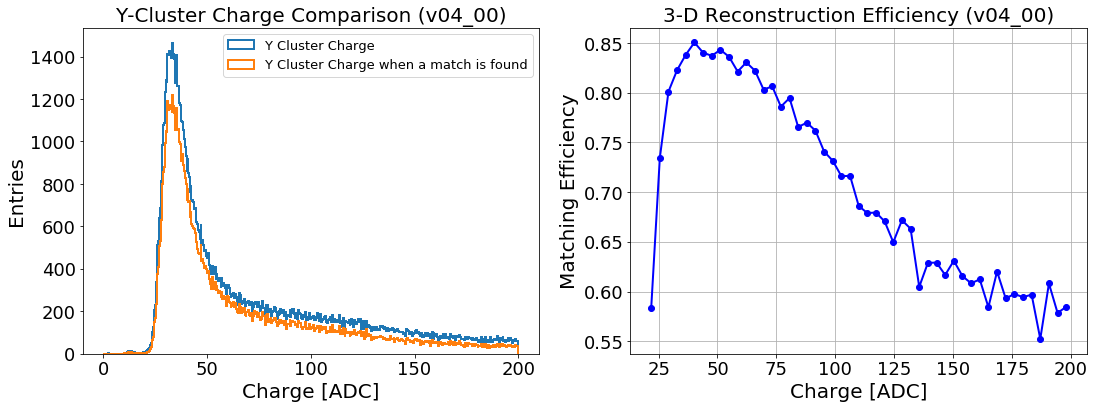

In [49]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_v04_00['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_v04_00_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (v04_00)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

vals2D_v04_00, bins2D_v04_00 = np.histogram(df_Matching_v04_00['Y_cluster_charge'].values,bins=BINS)
vals3D_v04_00, bins3D_v04_00 = np.histogram(df_Matching_v04_00_match['Y_cluster_charge'].values,bins=BINS)
binC_v04_00 = 0.5*(bins2D_v04_00[1:]+bins2D_v04_00[:-1])
vals2D_v04_00 = vals2D_v04_00.astype(float)
#print vals2D
vals3D_v04_00 = vals3D_v04_00.astype(float)
ratio_v_v04_00 = []
for i,v in enumerate(vals2D_v04_00):
    if (v == 0):
        ratio_v_v04_00.append(0.)
    else:
        ratio_v_v04_00.append(vals3D_v04_00[i]/v)
#print ratio_v
plt.plot(binC_v04_00,ratio_v_v04_00,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v04_00)',fontsize=20)

plt.show()

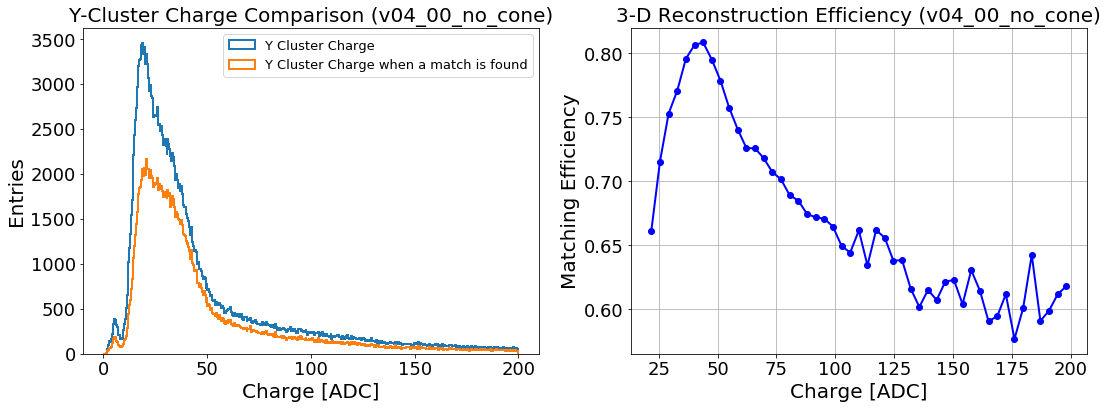

In [50]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_v04_00_no_cone['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_v04_00_no_cone_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (v04_00_no_cone)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

vals2D_v04_00_no_cone, bins2D_v04_00_no_cone = np.histogram(df_Matching_v04_00_no_cone['Y_cluster_charge'].values,bins=BINS)
vals3D_v04_00_no_cone, bins3D_v04_00_no_cone = np.histogram(df_Matching_v04_00_no_cone_match['Y_cluster_charge'].values,bins=BINS)
binC_v04_00_no_cone = 0.5*(bins2D_v04_00_no_cone[1:]+bins2D_v04_00_no_cone[:-1])
vals2D_v04_00_no_cone = vals2D_v04_00_no_cone.astype(float)
#print vals2D
vals3D_v04_00_no_cone = vals3D_v04_00_no_cone.astype(float)
ratio_v_v04_00_no_cone = []
for i,v in enumerate(vals2D_v04_00_no_cone):
    if (v == 0):
        ratio_v_v04_00_no_cone.append(0.)
    else:
        ratio_v_v04_00_no_cone.append(vals3D_v04_00_no_cone[i]/v)
#print ratio_v
plt.plot(binC_v04_00_no_cone,ratio_v_v04_00_no_cone,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v04_00_no_cone)',fontsize=20)

plt.show()

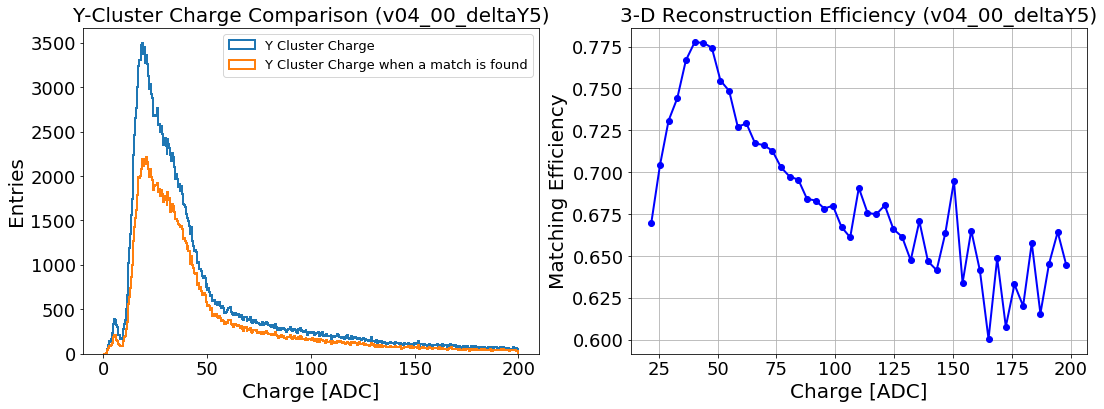

In [51]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_v04_00_deltaY5['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_v04_00_deltaY5_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (v04_00_deltaY5)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

vals2D_v04_00_deltaY5, bins2D_v04_00_deltaY5 = np.histogram(df_Matching_v04_00_deltaY5['Y_cluster_charge'].values,bins=BINS)
vals3D_v04_00_deltaY5, bins3D_v04_00_deltaY5 = np.histogram(df_Matching_v04_00_deltaY5_match['Y_cluster_charge'].values,bins=BINS)
binC_v04_00_deltaY5 = 0.5*(bins2D_v04_00_deltaY5[1:]+bins2D_v04_00_deltaY5[:-1])
vals2D_v04_00_deltaY5 = vals2D_v04_00_deltaY5.astype(float)
#print vals2D
vals3D_v04_00_deltaY5 = vals3D_v04_00_deltaY5.astype(float)
ratio_v_v04_00_deltaY5 = []
for i,v in enumerate(vals2D_v04_00_deltaY5):
    if (v == 0):
        ratio_v_v04_00_deltaY5.append(0.)
    else:
        ratio_v_v04_00_deltaY5.append(vals3D_v04_00_deltaY5[i]/v)
#print ratio_v
plt.plot(binC_v04_00_deltaY5,ratio_v_v04_00_deltaY5,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v04_00_deltaY5)',fontsize=20)

plt.show()

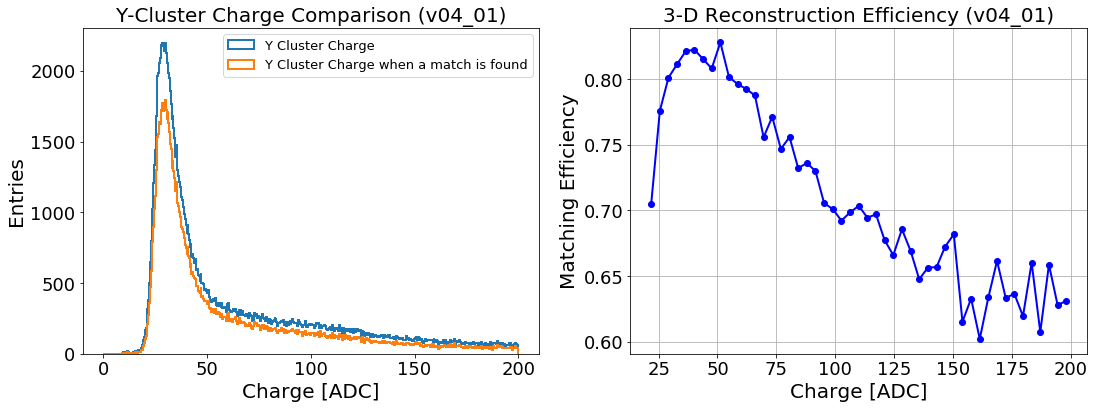

In [52]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_v04_01['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_v04_01_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (v04_01)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

vals2D_v04_01, bins2D_v04_01 = np.histogram(df_Matching_v04_01['Y_cluster_charge'].values,bins=BINS)
vals3D_v04_01, bins3D_v04_01 = np.histogram(df_Matching_v04_01_match['Y_cluster_charge'].values,bins=BINS)
binC_v04_01 = 0.5*(bins2D_v04_01[1:]+bins2D_v04_01[:-1])
vals2D_v04_01 = vals2D_v04_01.astype(float)
#print vals2D
vals3D_v04_01 = vals3D_v04_01.astype(float)
ratio_v_v04_01 = []
for i,v in enumerate(vals2D_v04_01):
    if (v == 0):
        ratio_v_v04_01.append(0.)
    else:
        ratio_v_v04_01.append(vals3D_v04_01[i]/v)
#print ratio_v
plt.plot(binC_v04_01,ratio_v_v04_01,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v04_01)',fontsize=20)

plt.show()

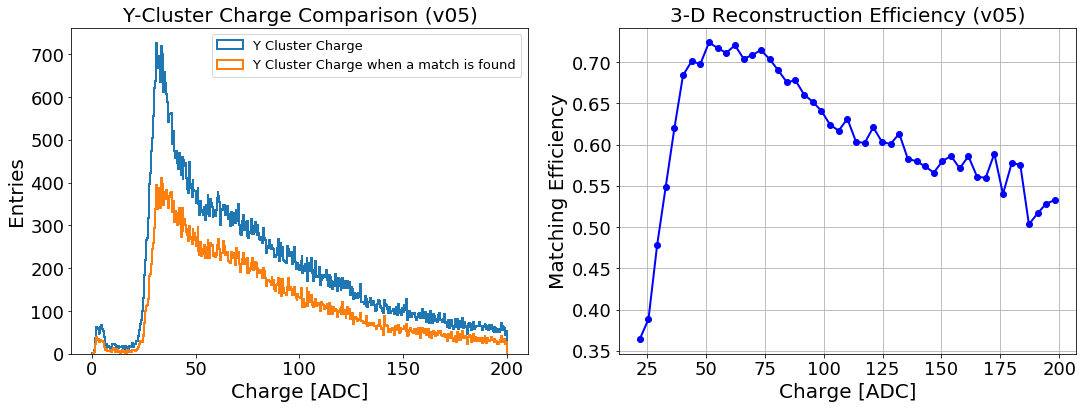

In [53]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
plt.hist(df_Matching_v05['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge')
plt.hist(df_Matching_v05_match['Y_cluster_charge'].values, bins=BINS,histtype='step',lw=2,label='Y Cluster Charge when a match is found')
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Charge Comparison (v05)',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

vals2D_v05, bins2D_v05 = np.histogram(df_Matching_v05['Y_cluster_charge'].values,bins=BINS)
vals3D_v05, bins3D_v05 = np.histogram(df_Matching_v05_match['Y_cluster_charge'].values,bins=BINS)
binC_v05 = 0.5*(bins2D_v05[1:]+bins2D_v05[:-1])
vals2D_v05 = vals2D_v05.astype(float)
#print vals2D
vals3D_v05 = vals3D_v05.astype(float)
ratio_v_v05 = []
for i,v in enumerate(vals2D_v05):
    if (v == 0):
        ratio_v_v05.append(0.)
    else:
        ratio_v_v05.append(vals3D_v05[i]/v)
#print ratio_v
plt.plot(binC_v05,ratio_v_v05,'bo-',lw=2)
plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v05)',fontsize=20)

plt.show()

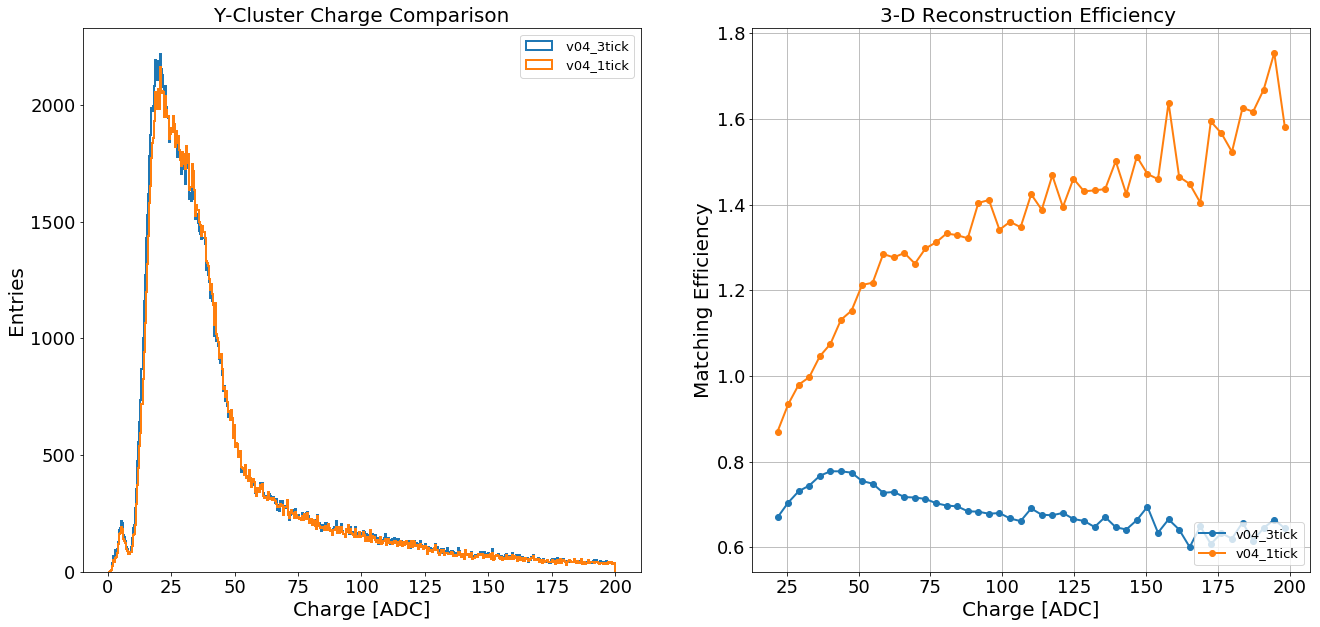

In [54]:
fig = plt.figure(figsize=(22,10))

plt.subplot(1, 2, 1)

BINS = np.linspace(0.1,200,500)
#plt.hist(df_Matching_old_match['Y_cluster_charge'].values, bins=BINS,histtype='step', normed=False,lw=2,label='  old ')
#plt.hist(df_Matching_v00_match['Y_cluster_charge'].values, bins=BINS,histtype='step', normed=False,lw=2,label='  v00')
#plt.hist(df_Matching_v01_match['Y_cluster_charge'].values, bins=BINS,histtype='step', normed=False,lw=2,label='  v01')
#plt.hist(df_Matching_v02_match['Y_cluster_charge'].values, bins=BINS,histtype='step', normed=False,lw=2,label=' v02')
#plt.hist(df_Matching_v03_match['Y_cluster_charge'].values, bins=BINS,histtype='step', normed=False,lw=2,label=' v03')
#plt.hist(df_Matching_v04_match['Y_cluster_charge'].values, bins=BINS,histtype='step', normed=False,lw=2,label=' v04')
#plt.hist(df_Matching_v04_00_match['Y_cluster_charge'].values, bins=BINS,histtype='step', normed=False,lw=2,label=' v04_00')
#plt.hist(df_Matching_v04_01_match['Y_cluster_charge'].values, bins=BINS,histtype='step', normed=False,lw=2,label=' v04_01')
#plt.hist(df_Matching_v05_match['Y_cluster_charge'].values, bins=BINS,histtype='step', normed=False,lw=2,label=' v05')
#plt.hist(df_Matching_default_no_cone_match['Y_cluster_charge'].values, bins=BINS,histtype='step', normed=False,lw=2,label=' default_MCC9_NO_CONE')
plt.hist(df_Matching_v04_00_deltaY5_match['Y_cluster_charge'].values, bins=BINS,histtype='step', normed=False,lw=2,label=' v04_3tick')
#plt.hist(df_Matching_v04_00_no_cone_match['Y_cluster_charge'].values, bins=BINS,histtype='step', normed=False,lw=2,label=' v04_1tick')

#plt.hist(df_Matching_v00_NO_CONE_match['Y_cluster_charge'].values, bins=BINS,histtype='step', normed=False,lw=2,label=' v00_NO_CONE')
#plt.hist(df_Matching_v01_NO_CONE_match['Y_cluster_charge'].values, bins=BINS,histtype='step', normed=False,lw=2,label=' v01_NO_CONE')
#plt.hist(df_Matching_v02_NO_CONE_match['Y_cluster_charge'].values, bins=BINS,histtype='step', normed=False,lw=2,label=' v02_NO_CONE')
#plt.hist(df_Matching_v03_NO_CONE_match['Y_cluster_charge'].values, bins=BINS,histtype='step', normed=False,lw=2,label=' v03_NO_CONE')
plt.hist(df_Matching_v04_NO_CONE_match['Y_cluster_charge'].values, bins=BINS,histtype='step', normed=False,lw=2,label=' v04_1tick')
#plt.hist(df_Matching_v04_SKIP_TRACK_match['Y_cluster_charge'].values, bins=BINS,histtype='step', normed=False,lw=2,label=' v04_SKIP_TRACK')

#plt.hist(df_Matching_v05_NO_CONE_match['Y_cluster_charge'].values, bins=BINS,histtype='step', normed=False,lw=2,label=' v05_NO_CONE')

plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Entries',fontsize=20)#
plt.title('Y-Cluster Charge Comparison',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
#fig = plt.figure(figsize=(18,6))

BINS = np.linspace(20,200,50)

#plt.plot(binC_old,ratio_v_old,'bo-',lw=2,label='old')
#plt.plot(binC_v00,ratio_v_v00,'o-',color = 'orange',lw=2,label='v00')
#plt.plot(binC_v01,ratio_v_v01,'o-',lw=2,label='v01')
#plt.plot(binC_v02,ratio_v_v02,'o-',lw=2,label='v02')
#plt.plot(binC_v03,ratio_v_v03,'o-',lw=2,label='v03')
#plt.plot(binC_v04,ratio_v_v04,'o-',lw=2,label='v04')
#plt.plot(binC_v04_00,ratio_v_v04_00,lw=2,label='v04_00')
#plt.plot(binC_v04_01,ratio_v_v04_01,lw=2,label='v04_01')
#plt.plot(binC_v05,ratio_v_v05,'o-',lw=2,label='v05')
#plt.plot(binC_default_no_cone,ratio_v_default_no_cone,'o-',lw=2,label='Default_MCC9_NO_CONE')

# plt.plot(binC_v00_NO_CONE,ratio_v_v00_NO_CONE,'o-',lw=2,label='v00_NO_CONE')
# plt.plot(binC_v01_NO_CONE,ratio_v_v01_NO_CONE,'o-',lw=2,label='v01_NO_CONE')
# plt.plot(binC_v02_NO_CONE,ratio_v_v02_NO_CONE,'o-',lw=2,label='v02_NO_CONE')
# plt.plot(binC_v03_NO_CONE,ratio_v_v03_NO_CONE,'o-',lw=2,label='v03_NO_CONE')
# plt.plot(binC_v04_NO_CONE,ratio_v_v04_NO_CONE,'o-',lw=2,label='v04_NO_CONE')
# plt.plot(binC_v04_SKIP_TRACK,ratio_v_v04_NO_CONE,'o-',lw=2,label='v04_SKIP_TRACK')
# plt.plot(binC_v05_NO_CONE,ratio_v_v05_NO_CONE,'o-',lw=2,label='v05_NO_CONE')
plt.plot(binC_v04_00_deltaY5,ratio_v_v04_00_deltaY5,'o-',lw=2,label='v04_3tick')
plt.plot(binC_v04_NO_CONE,ratio_v_v04_NO_CONE,'o-',lw=2,label='v04_1tick')

plt.grid()
plt.xlabel("Charge [ADC]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency ',fontsize=20)
plt.legend(loc=4,fontsize=13)
plt.show()


In [55]:
# Argon properties

#LAr temperature
T = 89
# density
rho = 1.38 # g/cm^3

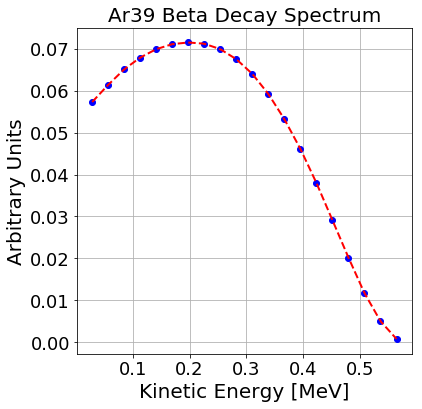

In [56]:
# Ar 39 energy spectrum

Ar39_E_v = [0.0282,0.0565,0.0847,0.1130,0.1412,0.1695,0.1977,0.2260,\
            0.2542,0.2825,0.3107,0.3390,0.3672,0.3955,0.4237,0.4520,0.4802,0.5085,0.5367,0.5650]

Ar39_A_v = [5.73E-02,6.14E-02,6.51E-02,6.79E-02,6.99E-02,7.11E-02,7.15E-02,\
            7.12E-02,6.99E-02,6.75E-02,6.40E-02,5.92E-02,5.32E-02,4.61E-02,\
            3.80E-02,2.91E-02,2.02E-02,1.17E-02,5.02E-03,7.77E-04]

# spline
Ar39spectrum = interp1d(Ar39_E_v,Ar39_A_v)

fig = plt.figure(figsize=(6,6))
plt.plot(Ar39_E_v,Ar39_A_v,'bo',lw=2)
xvals = np.linspace(Ar39_E_v[0],Ar39_E_v[-1],100)
plt.plot(xvals,Ar39spectrum(xvals),'r--',lw=2)
plt.xlabel("Kinetic Energy [MeV]",fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Beta Decay Spectrum',fontsize=20)
plt.grid()
plt.show()

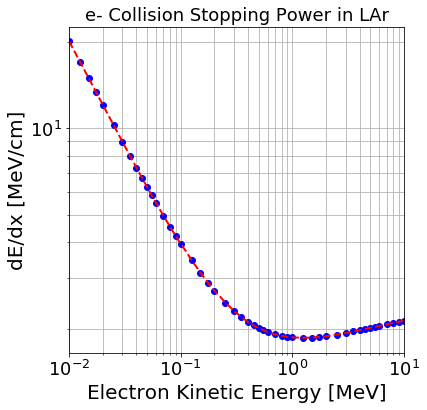

In [57]:
# load electron energy loss info [NIST]
fin = open('/uboone/app/users/abhat/gammacatcher_v08_00_00_09/srcs/ubreco/ubreco/GammaCatcher/nist_esar_ar_1p38density_188eV.txt','r')
ctr = 0

energy_v = []
collision_v = []

for line in fin:
    ctr += 1
    
    if (ctr < 9):
        continue
    words = line.split()
    if (len(words) != 4):
        continue
    energy_v.append   ( float(words[0])       )
    collision_v.append( float(words[1]) * rho )
    
energy_v    = np.array(energy_v   )
collision_v = np.array(collision_v)

dEdx = interp1d(energy_v,collision_v)

fig = plt.figure(figsize=(6,6))
plt.plot(energy_v,collision_v,'bo',lw=2)
xvals = np.linspace(0.01,10,1000)
plt.plot(xvals,dEdx(xvals),'r--',lw=2)
plt.xlim([0.01,10])
plt.xscale('log')
plt.yscale('log')
plt.grid(which='both')
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('dE/dx [MeV/cm]',fontsize=20)
plt.title('e- Collision Stopping Power in LAr',fontsize=18)
plt.show()

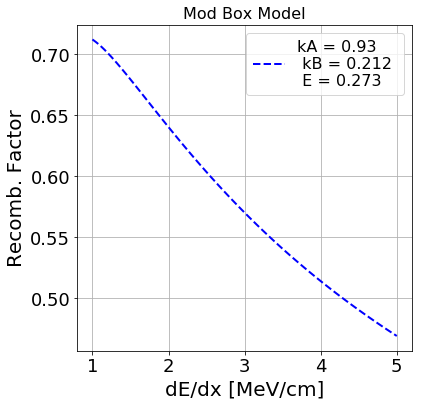

In [58]:
# Ion recombination model

# recombination model
def RecombModBox(dEdx, A, B, Efield):
    B /= (rho * Efield)
    r = np.log( dEdx * B + A ) / ( dEdx * B )
    return 1-r

def RecombBirks(dEdx, A, k, Efield):
    k /= rho
    r = ( 1 + k * dEdx / Efield ) / A
    return 1/r


fRecombA  = 0.8 # +- 0.003
fRecombk  = 0.0486 # +- 0.0006

fModBoxA = 0.93
fModBoxB = 0.212#0.212#3

fEfield  = 0.273

fig = plt.figure(figsize=(6,6))
dedx_v = np.linspace(1,5,100)
R_v = []
for dedx in dedx_v:
    R_v.append(1-RecombModBox(dedx,fModBoxA,fModBoxB,fEfield))
plt.plot(dedx_v,R_v,'b--',lw=2,label='kA = 0.93 \n kB = 0.212 \n E = 0.273')
plt.grid()
plt.xlabel('dE/dx [MeV/cm]',fontsize=20)
plt.ylabel('Recomb. Factor',fontsize=20)
plt.title('Mod Box Model',fontsize=16)
plt.legend(loc=1,fontsize=16)
plt.show()

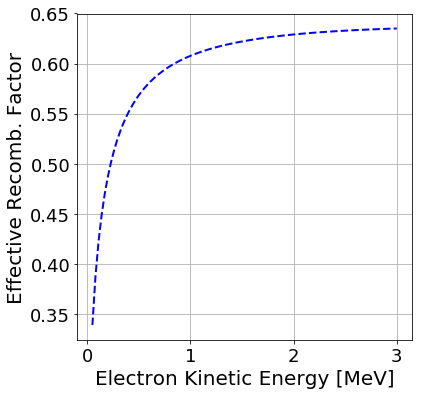

In [59]:
# Apply recombination model to get effective recombination for each electron energy
# return effective charge quenching amount
# effective recombination = amount of recombination for total energy lost by electron of given KE.

def EffectiveRecomb(ElectronEnergy,Estep,Field):
    
    # keep track of total energy lost
    dEtot = 0.
    # and total energy "seen" after recomb.
    dEobs = 0.
    
    while (ElectronEnergy > 1e-2):
    
        dedx = dEdx(ElectronEnergy)
        R    = RecombModBox(dedx,fModBoxA,fModBoxB,Field)
        
        dEtot += Estep
        dEobs += Estep * (1-R)
        
        ElectronEnergy -= Estep
        
        #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
        
    # perform last step
    dedx = dEdx(1e-2)
    dEtot += ElectronEnergy
    dEobs += ElectronEnergy * (1 - RecombModBox(dedx,fModBoxA,fModBoxB,Field))
    #print '@ E = %.02f : dE/dx : %.02f Etot : %.02f Eobs : %.02f'%(ElectronEnergy,dedx,dEtot,dEobs)
    
    return dEobs/dEtot

def Charge(ElectronEnergy,efield):
    
    EffRecomb = EffectiveRecomb(ElectronEnergy,0.01,efield)
    Eobs = ElectronEnergy * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    return Qobs

EffectiveRecomb_v = np.vectorize(EffectiveRecomb)
Charge_v = np.vectorize(Charge)

EffectiveRecomb(0.25,0.01,0.273)

fig = plt.figure(figsize=(6,6))
Evals = np.linspace(0.05,3,100)
Rvals = []
for E in Evals:
    Rvals.append(EffectiveRecomb(E,0.01,0.273))
plt.plot(Evals,Rvals,'b--',lw=2)
plt.xlabel('Electron Kinetic Energy [MeV]',fontsize=20)
plt.ylabel('Effective Recomb. Factor',fontsize=20)
plt.grid()
plt.show()



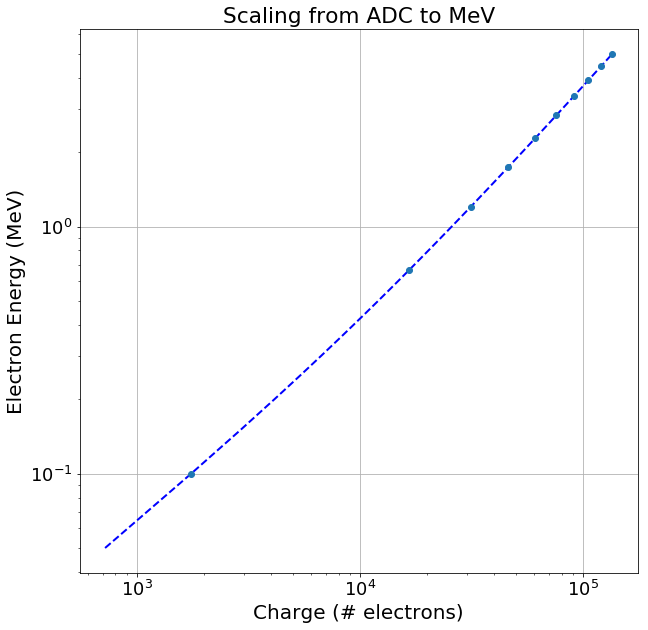

In [60]:
fig = plt.figure(figsize=(10,10))
Evals = np.linspace(0.05,5,100)
Qvals = []
for E in Evals:
    #R = EffectiveRecomb(E,0.01,0.273)
    Q = Charge(E,0.273)
    Qvals.append(Q)
    
fQ2E = interp1d(Qvals, Evals,kind='cubic')
xnew = np.linspace(Qvals[1], Qvals[-1], num=10, endpoint=True)
plt.plot(Qvals,Evals,'b--',xnew, fQ2E(xnew),'o',lw=2)
plt.ylabel('Electron Energy (MeV)',fontsize=20)
plt.xlabel('Charge (# electrons)',fontsize=20)
plt.grid()
plt.yscale('log')
plt.xscale('log')
plt.title('Scaling from ADC to MeV')
plt.show()
fig.savefig('Q2E.png', dpi=300)

In [61]:
# calculate Ar39 spectrum [in drifted electrons] accounting for recombination

# sample randomly from Ar39 spectrum and calculate visible charge for each event
Ar39_Q_v = []

Eavg = 0.

for n in xrange(5000):
    
    found = False
    while (found == False):
        Eval = np.random.uniform(Ar39_E_v[0],Ar39_E_v[-1])
        if (Ar39spectrum(Eval) > np.random.uniform(0,0.08) ): # 0.08 due to values in 1st histogram in notebook
            found = True
    Eavg += Eval
    EffRecomb = EffectiveRecomb(Eval,0.01,0.273)
    Eobs = Eval * EffRecomb
    Qobs = Eobs / (23.6 * (1e-6))
    Ar39_Q_v.append(Qobs)
Eavg /= 5000
print Eavg

0.238721223406


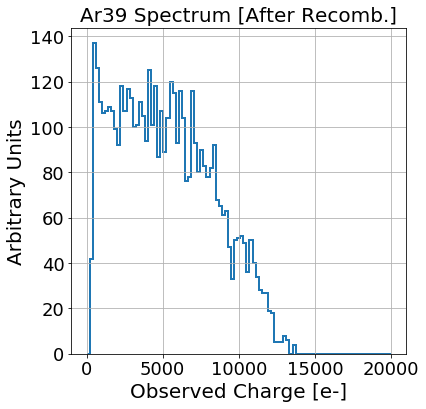

In [62]:
fig = plt.figure(figsize=(6,6))
plt.hist(Ar39_Q_v,bins=np.linspace(0,2e4,100),histtype='step',lw=2)
plt.grid()
plt.xlabel('Observed Charge [e-]',fontsize=20)
plt.ylabel('Arbitrary Units',fontsize=20)
plt.title('Ar39 Spectrum [After Recomb.]',fontsize=20)
plt.show()

In [63]:
elec_KE = np.linspace(0.05,1,100)
elec_Q_273 = []
elec_Q_500 = []
for ke in elec_KE:
    elec_Q_273.append(Charge(ke,0.273)/1e3)
    elec_Q_500.append(Charge(ke,0.500)/1e3)

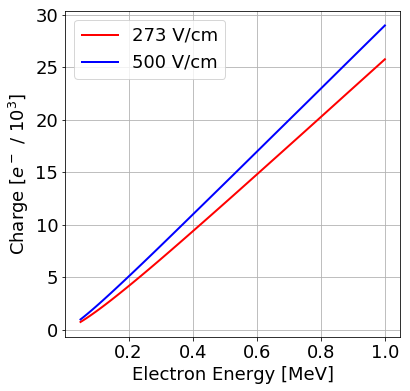

In [64]:
fig = plt.figure(figsize=(6,6))
plt.plot(elec_KE,elec_Q_273,lw=2,color='r',label='273 V/cm')
plt.plot(elec_KE,elec_Q_500,lw=2,color='b',label='500 V/cm')
plt.grid()
plt.xlabel('Electron Energy [MeV]')
plt.ylabel('Charge [$e^-$ / $10^3$]')
plt.legend(loc=2,fontsize=18)
plt.show()

In [65]:
def E_recoY(df,gain):
    YQ = df['Y_cluster_charge']
    QrecoY = YQ * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY = fQ2E(QrecoY)
    return ErecoY

def E_recoY_old(df,gain):
    YQ_old = df['Y_cluster_charge']
    QrecoY_old = YQ_old * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_old = fQ2E(QrecoY_old)
    return ErecoY_old

def E_recoY_v00(df,gain):
    YQ_v00 = df['Y_cluster_charge']
    QrecoY_v00 = YQ_v00 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_v00 = fQ2E(QrecoY_v00)
    return ErecoY_v00

def E_recoY_v01(df,gain):
    YQ_v01 = df['Y_cluster_charge']
    QrecoY_v01 = YQ_v01 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_v01 = fQ2E(QrecoY_v01)
    return ErecoY_v01

def E_recoY_v02(df,gain):
    YQ_v02 = df['Y_cluster_charge']
    QrecoY_v02 = YQ_v02 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_v02 = fQ2E(QrecoY_v02)
    return ErecoY_v02

def E_recoY_v03(df,gain):
    YQ_v03 = df['Y_cluster_charge']
    QrecoY_v03 = YQ_v03 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_v03 = fQ2E(QrecoY_v03)
    return ErecoY_v03

def E_recoY_v04(df,gain):
    YQ_v04 = df['Y_cluster_charge']
    QrecoY_v04 = YQ_v04 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_v04 = fQ2E(QrecoY_v04)
    return ErecoY_v04



def E_recoY_v00_NO_CONE(df,gain):
    YQ_v00_NO_CONE = df['Y_cluster_charge']
    QrecoY_v00_NO_CONE = YQ_v00_NO_CONE * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_v00_NO_CONE = fQ2E(QrecoY_v00_NO_CONE)
    return ErecoY_v00_NO_CONE

def E_recoY_v01_NO_CONE(df,gain):
    YQ_v01_NO_CONE = df['Y_cluster_charge']
    QrecoY_v01_NO_CONE = YQ_v01_NO_CONE * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_v01_NO_CONE = fQ2E(QrecoY_v01_NO_CONE)
    return ErecoY_v01_NO_CONE

def E_recoY_v02_NO_CONE(df,gain):
    YQ_v02_NO_CONE = df['Y_cluster_charge']
    QrecoY_v02_NO_CONE = YQ_v02_NO_CONE * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_v02_NO_CONE = fQ2E(QrecoY_v02_NO_CONE)
    return ErecoY_v02_NO_CONE

def E_recoY_v03_NO_CONE(df,gain):
    YQ_v03_NO_CONE = df['Y_cluster_charge']
    QrecoY_v03_NO_CONE = YQ_v03_NO_CONE * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_v03_NO_CONE = fQ2E(QrecoY_v03_NO_CONE)
    return ErecoY_v03_NO_CONE

def E_recoY_v04_NO_CONE(df,gain):
    YQ_v04_NO_CONE = df['Y_cluster_charge']
    QrecoY_v04_NO_CONE = YQ_v04_NO_CONE * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_v04_NO_CONE = fQ2E(QrecoY_v04_NO_CONE)
    return ErecoY_v04_NO_CONE


def E_recoY_v04_SKIP_TRACK(df,gain):
    YQ_v04_SKIP_TRACK = df['Y_cluster_charge']
    QrecoY_v04_SKIP_TRACK = YQ_v04_SKIP_TRACK * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_v04_SKIP_TRACK = fQ2E(QrecoY_v04_SKIP_TRACK)
    return ErecoY_v04_SKIP_TRACK




def E_recoY_v05_NO_CONE(df,gain):
    YQ_v05_NO_CONE = df['Y_cluster_charge']
    QrecoY_v05_NO_CONE = YQ_v05_NO_CONE * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_v05_NO_CONE = fQ2E(QrecoY_v05_NO_CONE)
    return ErecoY_v05_NO_CONE






def E_recoY_v04_01(df,gain):
    YQ_v04_01 = df['Y_cluster_charge']
    QrecoY_v04_01 = YQ_v04_01 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_v04_01 = fQ2E(QrecoY_v04_01)
    return ErecoY_v04_01

def E_recoY_v04_00(df,gain):
    YQ_v04_00 = df['Y_cluster_charge']
    QrecoY_v04_00 = YQ_v04_00 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_v04_00 = fQ2E(QrecoY_v04_00)
    return ErecoY_v04_00


def E_recoY_v05(df,gain):
    YQ_v05 = df['Y_cluster_charge']
    QrecoY_v05 = YQ_v05 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_v05 = fQ2E(QrecoY_v05)
    return ErecoY_v05

def E_recoU(df,gain):
    UQ = df['U_cluster_charge']
    QrecoU = UQ * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoU = fQ2E(QrecoU)
    return ErecoU

def E_recoU_old(df,gain):
    UQ_old = df['U_cluster_charge']
    QrecoU_old = UQ_old * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoU_old = fQ2E(QrecoU_old)
    return ErecoU_old

def E_recoU_v00(df,gain):
    UQ_v00 = df['U_cluster_charge']
    QrecoU_v00 = UQ_v00 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoU_v00 = fQ2E(QrecoU_v00)
    return ErecoU_v00

def E_recoU_v01(df,gain):
    UQ_v01 = df['U_cluster_charge']
    QrecoU_v01 = UQ_v01 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoU_v01 = fQ2E(QrecoU_v01)
    return ErecoU_v01

def E_recoU_v02(df,gain):
    UQ_v02 = df['U_cluster_charge']
    QrecoU_v02 = UQ_v02 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoU_v02 = fQ2E(QrecoU_v02)
    return ErecoU_v02

def E_recoU_v03(df,gain):
    UQ_v03 = df['U_cluster_charge']
    QrecoU_v03 = UQ_v03 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoU_v03 = fQ2E(QrecoU_v03)
    return ErecoU_v03

def E_recoU_v04(df,gain):
    UQ_v04 = df['U_cluster_charge']
    QrecoU_v04 = UQ_v04 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoU_v04 = fQ2E(QrecoU_v04)
    return ErecoU_v04


def E_recoU_v04_00(df,gain):
    UQ_v04_00 = df['U_cluster_charge']
    QrecoU_v04_00 = UQ_v04_00 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoU_v04_00 = fQ2E(QrecoU_v04_00)
    return ErecoU_v04_00



def E_recoU_v04_01(df,gain):
    UQ_v04_01 = df['U_cluster_charge']
    QrecoU_v04_01 = UQ_v04_01 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoU_v04_01 = fQ2E(QrecoU_v04_01)
    return ErecoU_v04_01

def E_recoU_v05(df,gain):
    UQ_v05 = df['U_cluster_charge']
    QrecoU_v05 = UQ_v05 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoU_v05 = fQ2E(QrecoU_v05)
    return ErecoU_v05

def E_recoV(df,gain):
    VQ = df['V_cluster_charge']
    QrecoV = VQ * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoV = fQ2E(QrecoV)
    return ErecoV

def E_recoV_old(df,gain):
    VQ_old = df['V_cluster_charge']
    QrecoV_old = VQ_old * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoV_old = fQ2E(QrecoV_old)
    return ErecoV_old

def E_recoV_v00(df,gain):
    VQ_v00 = df['V_cluster_charge']
    QrecoV_v00 = VQ_v00 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoV_v00 = fQ2E(QrecoV_v00)
    return ErecoV_v00


def E_recoV_v01(df,gain):
    VQ_v01 = df['V_cluster_charge']
    QrecoV_v01 = VQ_v01 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoV_v01 = fQ2E(QrecoV_v01)
    return ErecoV_v01

def E_recoV_v02(df,gain):
    VQ_v02 = df['V_cluster_charge']
    QrecoV_v02 = VQ_v02 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoV_v02 = fQ2E(QrecoV_v02)
    return ErecoV_v02


def E_recoV_v03(df,gain):
    VQ_v03 = df['V_cluster_charge']
    QrecoV_v03 = VQ_v03 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoV_v03 = fQ2E(QrecoV_v03)
    return ErecoV_v03

def E_recoV_v04(df,gain):
    VQ_v04 = df['V_cluster_charge']
    QrecoV_v04 = VQ_v04 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoV_v04 = fQ2E(QrecoV_v04)
    return ErecoV_v04


def E_recoV_v04_01(df,gain):
    VQ_v04_01 = df['V_cluster_charge']
    QrecoV_v04_01 = VQ_v04_01 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoV_v04_01 = fQ2E(QrecoV_v04_01)
    return ErecoV_v04_01



def E_recoV_v04_00(df,gain):
    VQ_v04_00 = df['V_cluster_charge']
    QrecoV_v04_00 = VQ_v04_00 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoV_v04_00 = fQ2E(QrecoV_v04_00)
    return ErecoV_v04_00


def E_recoV_v05(df,gain):
    VQ_v05 = df['V_cluster_charge']
    QrecoV_v05 = VQ_v05 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoV_v05 = fQ2E(QrecoV_v05)
    return ErecoV_v05


def E_recoY_off_G10(df,gain):
    YQ_off_G10  = df['sps_cluster_charge']
    QrecoY_off_G10 = YQ_off_G10 * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off_G10 = fQ2E(QrecoY_off_G10)
    return ErecoY_off_G10

def E_recoY_off_rest_det(df,gain):
    YQ_off_rest_det  = df['sps_cluster_charge']
    QrecoY_off_rest_det = YQ_off_rest_det * gain #* (23.6/1e6) # MeV w/ no recomb factor
    ErecoY_off_rest_det = fQ2E(QrecoY_off_rest_det)
    return ErecoY_off_rest_det

    #E_r=0.01 # MeV
    #while E_r<10:
    #    Eff_Recomb = EffectiveRecomb(E_r,0.01,0.273)
    #    Q_hypo=Eff_Recomb*E_r # MeV
    #    if Q_hypo>Qreco:
    #        return E_r
    #    E_r+=0.01
    #    
def E_reco_simple(YQ,gain):
    #YQ = df['Y_cluster_charge']
    Qreco = YQ * gain * (23.6/1e6) # MeV w/ no recomb factor
    E_r=0.01 # MeV
    while E_r<10:
        Eff_Recomb = EffectiveRecomb(E_r,0.01,0.273)
        Q_hypo=Eff_Recomb*E_r # MeV
        if Q_hypo>Qreco:
            return E_r
        E_r+=0.01

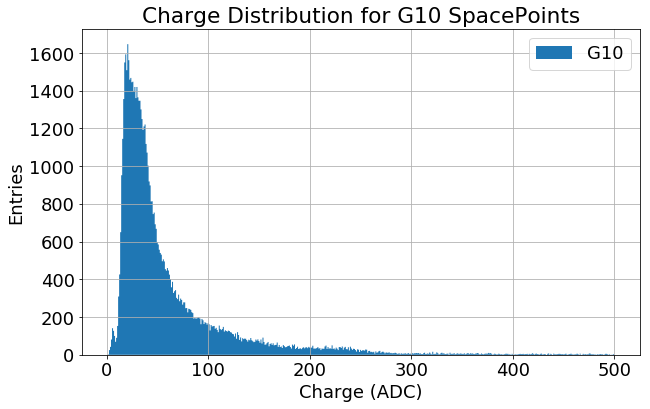

In [66]:
fig = plt.figure(figsize=(10,6))
BINS=np.linspace(0,500,500)
plt.hist(df_G10_off_cut['sps_cluster_charge'].values,bins=BINS,histtype='stepfilled',label='G10')
plt.title("Charge Distribution for G10 SpacePoints")
plt.xlabel('Charge (ADC)')
plt.ylabel('Entries')
plt.legend(loc=1)
plt.grid()
plt.show()

In [67]:
#print (df_G10_off_cut['sps_cluster_charge'])

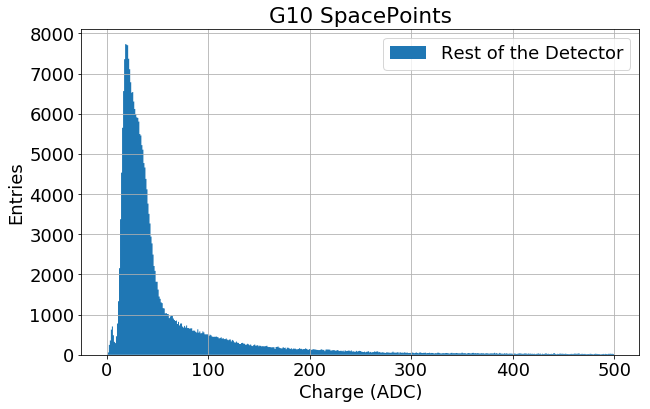

In [68]:

fig = plt.figure(figsize=(10,6))
BINS=np.linspace(0,500,500)
plt.hist(df_rest_det_off_cut['sps_cluster_charge'].values,bins=BINS,histtype='stepfilled',label='Rest of the Detector')
plt.title("G10 SpacePoints")
plt.xlabel('Charge (ADC)')
plt.ylabel('Entries')
plt.legend(loc=1)
plt.grid()
plt.show()


In [69]:
#print (df_rest_det_off_cut['sps_cluster_charge'])

/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


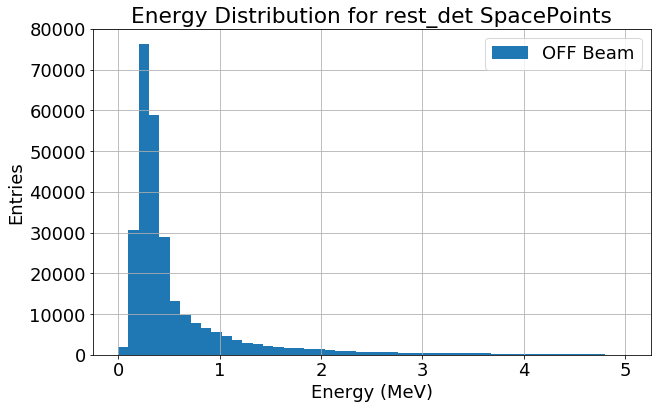

In [70]:
df_sps_charge_off_rest_det=df_rest_det_off_cut.query('sps_cluster_charge * 238.4 < 130000. and sps_cluster_charge > 4')
df_sps_charge_off_rest_det['energy']=E_recoY_off_rest_det(df_sps_charge_off_rest_det,238.4)
fig = plt.figure(figsize=(10,6))
BINS=np.linspace(0,5,50)
plt.hist(df_sps_charge_off_rest_det['energy'].values,bins=BINS,histtype='stepfilled',label='OFF Beam')
plt.title("Energy Distribution for rest_det SpacePoints")
plt.xlabel('Energy (MeV)')
plt.ylabel('Entries')
plt.legend(loc=1)
plt.grid()
plt.show()

/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


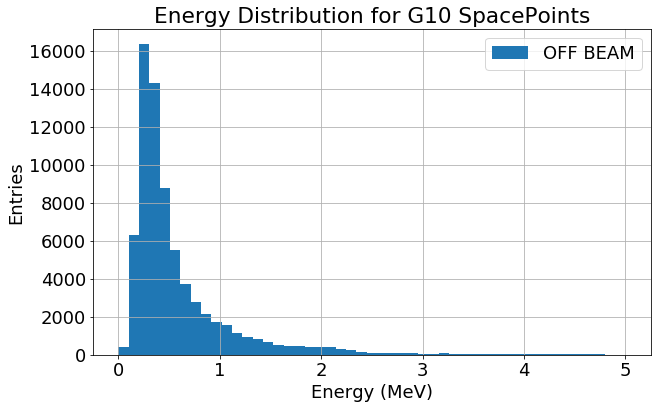

In [71]:
df_sps_charge_off_G10=df_G10_off_cut.query('sps_cluster_charge * 238.4 < 130000. and sps_cluster_charge > 4.')
df_sps_charge_off_G10['energy']=E_recoY_off_G10(df_sps_charge_off_G10,238.4)
fig = plt.figure(figsize=(10,6))
BINS=np.linspace(0,5,50)
plt.hist(df_sps_charge_off_G10['energy'].values,bins=BINS,histtype='stepfilled',label='OFF BEAM')
plt.title("Energy Distribution for G10 SpacePoints")
plt.xlabel('Energy (MeV)')
plt.ylabel('Entries')
plt.legend(loc=1)
plt.grid()
plt.show()

In [72]:
#print (df_sps_charge_off_G10['energy'])

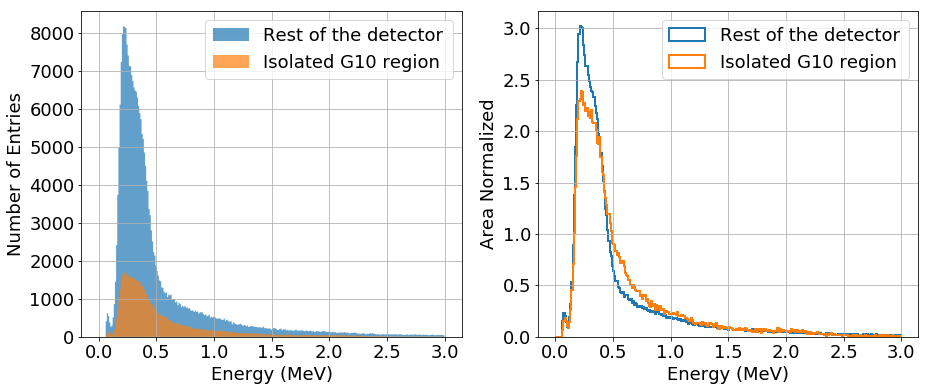

In [73]:
fig = plt.figure(figsize=(15,6))

BINS=np.linspace(0,3,300)
plt.subplot(1, 2, 1)


plt.hist(df_sps_charge_off_rest_det['energy'].values,bins=BINS,histtype='stepfilled',label='Rest of the detector',alpha=0.7)
plt.hist(df_sps_charge_off_G10['energy'].values,bins=BINS,histtype='stepfilled',label='Isolated G10 region ',alpha=0.7)
#plt.title("Energy Distribution for SpacePoints")
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of Entries')
plt.legend(loc=1)
plt.grid()


plt.subplot(1, 2, 2)


plt.hist(df_sps_charge_off_rest_det['energy'].values,bins=BINS,histtype='step',label='Rest of the detector',alpha=1,density=True,lw=2)
plt.hist(df_sps_charge_off_G10['energy'].values,bins=BINS,histtype='step',label='Isolated G10 region ',alpha=1,density=True,lw=2)
#plt.title("Energy Distribution for SpacePoints")
plt.xlabel('Energy (MeV)')
plt.ylabel('Area Normalized')
plt.legend(loc=1)
plt.grid()
plt.show()
fig.savefig('Energy_comp_G10_low_threshold.png', dpi=400)

In [74]:
# scaling_factor = 0.08560090702
scaling_factor = 0.08560090702*2.25
nRest_det = len(df_sps_charge_off_rest_det)
weights_Rest_det = np.ones(nRest_det) * scaling_factor # factor needed to scale off-beam to on-beam


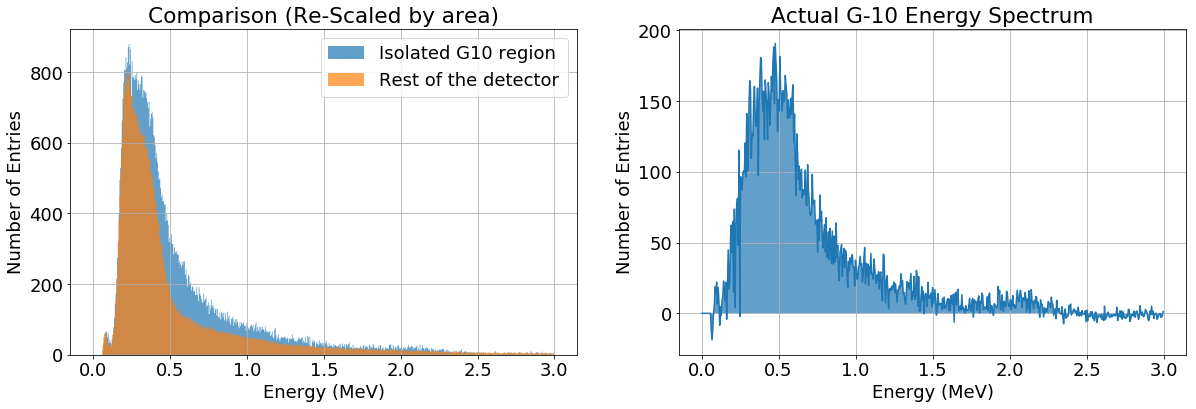

In [75]:
fig = plt.figure(figsize=(20,6))

BINS=np.linspace(0,3,600)
plt.subplot(1, 2, 1)

n1, bins1, p1 = plt.hist(df_sps_charge_off_G10['energy'].values,bins=BINS,histtype='stepfilled',label='Isolated G10 region ',alpha=0.7)

n2, bins2, p2 = plt.hist(df_sps_charge_off_rest_det['energy'].values,bins=BINS,histtype='stepfilled',label='Rest of the detector',alpha=0.7,weights=weights_Rest_det)
#plt.title("Energy Distribution for SpacePoints")
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of Entries')
plt.legend(loc=1)
plt.grid()
plt.title("Comparison (Re-Scaled by area)")
#plt.show()
plt.subplot(1, 2, 2)
binsc1 = 0.5*(bins1[:-1]+bins1[1:])
#fig = plt.figure(figsize=(10,6))
plt.fill_between(binsc1,(n1-n2), alpha=0.7)
plt.plot(binsc1,(n1-n2))
plt.xlabel('Energy (MeV)')
plt.ylabel('Number of Entries')
plt.grid()
plt.title("Actual G-10 Energy Spectrum")
plt.show()
fig.savefig('Reweighted_comparison.png', dpi=400)

In [76]:
vals_G10, bins_G10=np.histogram(df_sps_charge_off_G10['energy'].values,bins=BINS)
vals_rest_det, bins_rest_det=np.histogram(df_sps_charge_off_rest_det['energy'].values,bins=BINS,weights=weights_Rest_det)


In [77]:
dfcut_match_old = df_Matching_old_match.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')
dfcut_all_old   = df_Matching_old.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')

dfcut_match_old['energy'] = E_recoY(dfcut_match_old,238.4)
dfcut_all_old['energy']   = E_recoY(dfcut_all_old,238.4)


dfcut_match_v00 = df_Matching_v00_match.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')
dfcut_all_v00   = df_Matching_v00.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')

dfcut_match_v00['energy'] = E_recoY(dfcut_match_v00,238.4)
dfcut_all_v00['energy']   = E_recoY(dfcut_all_v00,238.4)

# dfcut_match_v01 = df_Matching_v01_match.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')
# dfcut_all_v01   = df_Matching_v01.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')

# dfcut_match_v01['energy'] = E_recoY(dfcut_match_v01,238.4)
# dfcut_all_v01['energy']   = E_recoY(dfcut_all_v01,238.4)

dfcut_match_v02 = df_Matching_v02_match.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')
dfcut_all_v02   = df_Matching_v02.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')

dfcut_match_v02['energy'] = E_recoY(dfcut_match_v02,238.4)
dfcut_all_v02['energy']   = E_recoY(dfcut_all_v02,238.4)

dfcut_match_v03 = df_Matching_v03_match.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')
dfcut_all_v03   = df_Matching_v03.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')

dfcut_match_v03['energy'] = E_recoY(dfcut_match_v03,238.4)
dfcut_all_v03['energy']   = E_recoY(dfcut_all_v03,238.4)

dfcut_match_v04 = df_Matching_v04_match.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')
dfcut_all_v04   = df_Matching_v04.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')

dfcut_match_v04['energy'] = E_recoY(dfcut_match_v04,238.4)
dfcut_all_v04['energy']   = E_recoY(dfcut_all_v04,238.4)






dfcut_match_v00_NO_CONE = df_Matching_v00_NO_CONE_match.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')
dfcut_all_v00_NO_CONE   = df_Matching_v00_NO_CONE.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')

dfcut_match_v00_NO_CONE['energy'] = E_recoY(dfcut_match_v00_NO_CONE,238.4)
dfcut_all_v00_NO_CONE['energy']   = E_recoY(dfcut_all_v00_NO_CONE,238.4)

dfcut_match_v01_NO_CONE = df_Matching_v01_NO_CONE_match.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')
dfcut_all_v01_NO_CONE   = df_Matching_v01_NO_CONE.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')

dfcut_match_v01_NO_CONE['energy'] = E_recoY(dfcut_match_v01_NO_CONE,238.4)
dfcut_all_v01_NO_CONE['energy']   = E_recoY(dfcut_all_v01_NO_CONE,238.4)

dfcut_match_v02_NO_CONE = df_Matching_v02_NO_CONE_match.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')
dfcut_all_v02_NO_CONE   = df_Matching_v02_NO_CONE.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')

dfcut_match_v02_NO_CONE['energy'] = E_recoY(dfcut_match_v02_NO_CONE,238.4)
dfcut_all_v02_NO_CONE['energy']   = E_recoY(dfcut_all_v02_NO_CONE,238.4)

dfcut_match_v03_NO_CONE = df_Matching_v03_NO_CONE_match.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')
dfcut_all_v03_NO_CONE   = df_Matching_v03_NO_CONE.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')

dfcut_match_v03_NO_CONE['energy'] = E_recoY(dfcut_match_v03_NO_CONE,238.4)
dfcut_all_v03_NO_CONE['energy']   = E_recoY(dfcut_all_v03_NO_CONE,238.4)

dfcut_match_v04_NO_CONE = df_Matching_v04_NO_CONE_match.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')
dfcut_all_v04_NO_CONE   = df_Matching_v04_NO_CONE.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')

dfcut_match_v04_NO_CONE['energy'] = E_recoY(dfcut_match_v04_NO_CONE,238.4)
dfcut_all_v04_NO_CONE['energy']   = E_recoY(dfcut_all_v04_NO_CONE,238.4)



dfcut_match_v04_SKIP_TRACK = df_Matching_v04_SKIP_TRACK_match.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')
dfcut_all_v04_SKIP_TRACK   = df_Matching_v04_SKIP_TRACK.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')

dfcut_match_v04_SKIP_TRACK['energy'] = E_recoY(dfcut_match_v04_SKIP_TRACK,238.4)
dfcut_all_v04_SKIP_TRACK['energy']   = E_recoY(dfcut_all_v04_SKIP_TRACK,238.4)




dfcut_match_v05_NO_CONE = df_Matching_v05_NO_CONE_match.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')
dfcut_all_v05_NO_CONE   = df_Matching_v05_NO_CONE.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')


dfcut_match_v05_NO_CONE['energy'] = E_recoY(dfcut_match_v05_NO_CONE,238.4)
dfcut_all_v05_NO_CONE['energy']   = E_recoY(dfcut_all_v05_NO_CONE,238.4)











dfcut_match_v04_00 = df_Matching_v04_00_match.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')
dfcut_all_v04_00   = df_Matching_v04_00.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')

dfcut_match_v04_00['energy'] = E_recoY(dfcut_match_v04_00,238.4)
dfcut_all_v04_00['energy']   = E_recoY(dfcut_all_v04_00,238.4)




dfcut_match_v04_01 = df_Matching_v04_01_match.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')
dfcut_all_v04_01   = df_Matching_v04_01.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')

dfcut_match_v04_01['energy'] = E_recoY(dfcut_match_v04_01,238.4)
dfcut_all_v04_01['energy']   = E_recoY(dfcut_all_v04_01,238.4)


dfcut_match_v05 = df_Matching_v05_match.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')
dfcut_all_v05   = df_Matching_v05.query('Y_cluster_charge * 238.4 < 130000. and Y_cluster_charge * 238.4 > 800.')

dfcut_match_v05['energy'] = E_recoY(dfcut_match_v05,238.4)
dfcut_all_v05['energy']   = E_recoY(dfcut_all_v05,238.4)






/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inst

/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:89: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:104: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

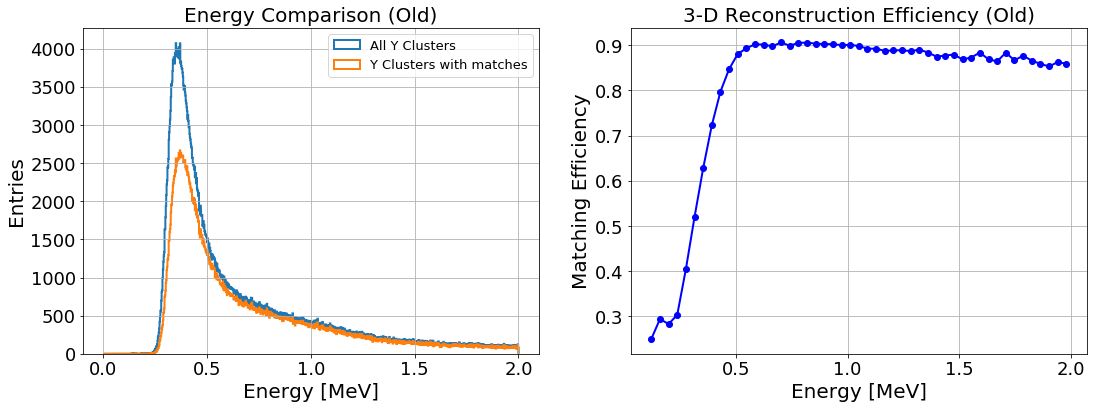

477978


In [78]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)

BINS = np.linspace(0,2,1000)
plt.hist(dfcut_all_old['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_old['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison (Old)',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.subplot(1, 2, 2)


BINS = np.linspace(0.1,2,50)

vals2D_old, bins2D_old = np.histogram(dfcut_all_old['energy'].values,bins=BINS)
vals3D_old, bins3D_old = np.histogram(dfcut_match_old['energy'].values,bins=BINS)
binC_old = 0.5*(bins2D_old[1:]+bins2D_old[:-1])
vals2D_old = vals2D_old.astype(float)
#print vals2D
vals3D_old = vals3D_old.astype(float)
ratio_v_old = []
for i,v in enumerate(vals2D_old):
    if (v == 0):
        ratio_v_old.append(0.)
    else:
        ratio_v_old.append(vals3D_old[i]/v)
#print ratio_v
plt.plot(binC_old,ratio_v_old,'bo-',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (Old)',fontsize=20)

plt.grid()
plt.show()
#fig.savefig('Ratio.png', dpi=300)
print dfcut_match_old.shape[0]

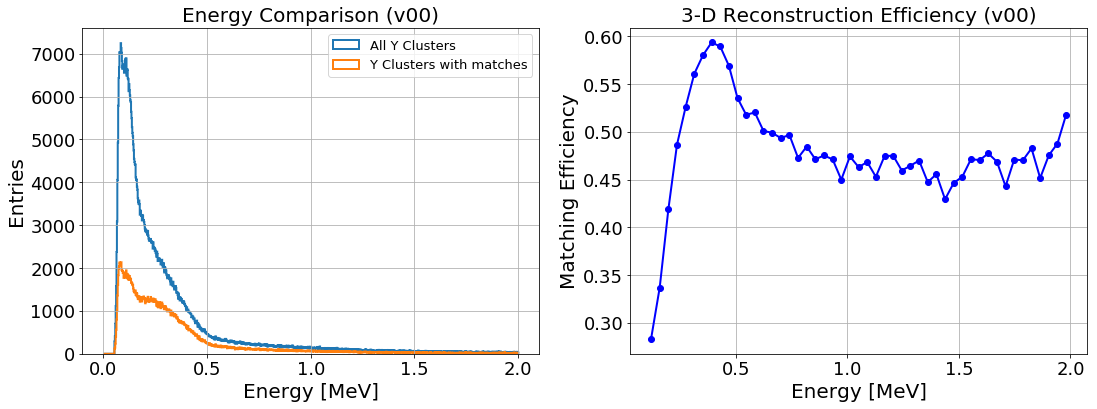

In [79]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)

BINS = np.linspace(0,2,1000)
plt.hist(dfcut_all_v00['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_v00['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison (v00)',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.subplot(1, 2, 2)


BINS = np.linspace(0.1,2,50)

vals2D_v00, bins2D_v00 = np.histogram(dfcut_all_v00['energy'].values,bins=BINS)
vals3D_v00, bins3D_v00 = np.histogram(dfcut_match_v00['energy'].values,bins=BINS)
binC_v00 = 0.5*(bins2D_v00[1:]+bins2D_v00[:-1])
vals2D_v00 = vals2D_v00.astype(float)
#print vals2D
vals3D_v00 = vals3D_v00.astype(float)
ratio_v_v00 = []
for i,v in enumerate(vals2D_v00):
    if (v == 0):
        ratio_v_v00.append(0.)
    else:
        ratio_v_v00.append(vals3D_v00[i]/v)
#print ratio_v
plt.plot(binC_v00,ratio_v_v00,'bo-',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v00)',fontsize=20)

plt.grid()
plt.show()
#fig.savefig('Ratio.png', dpi=300)
#print dfcut_match_v00.shape[0]

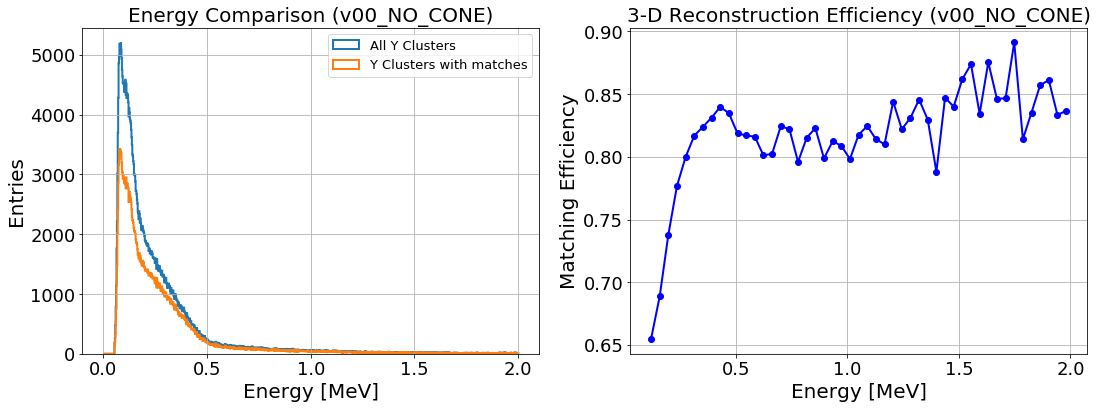

310399


In [80]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)

BINS = np.linspace(0,2,1000)
plt.hist(dfcut_all_v00_NO_CONE['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_v00_NO_CONE['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison (v00_NO_CONE)',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.subplot(1, 2, 2)


BINS = np.linspace(0.1,2,50)

vals2D_v00_NO_CONE, bins2D_v00_NO_CONE = np.histogram(dfcut_all_v00_NO_CONE['energy'].values,bins=BINS)
vals3D_v00_NO_CONE, bins3D_v00_NO_CONE = np.histogram(dfcut_match_v00_NO_CONE['energy'].values,bins=BINS)
binC_v00_NO_CONE = 0.5*(bins2D_v00_NO_CONE[1:]+bins2D_v00_NO_CONE[:-1])
vals2D_v00_NO_CONE = vals2D_v00_NO_CONE.astype(float)
#print vals2D
vals3D_v00_NO_CONE = vals3D_v00_NO_CONE.astype(float)
ratio_v_v00_NO_CONE = []
for i,v in enumerate(vals2D_v00_NO_CONE):
    if (v == 0):
        ratio_v_v00_NO_CONE.append(0.)
    else:
        ratio_v_v00_NO_CONE.append(vals3D_v00_NO_CONE[i]/v)
#print ratio_v
plt.plot(binC_v00_NO_CONE,ratio_v_v00_NO_CONE,'bo-',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v00_NO_CONE)',fontsize=20)

plt.grid()
plt.show()
#fig.savefig('Ratio.png', dpi=300)
print dfcut_match_v00_NO_CONE.shape[0]

In [81]:
# fig = plt.figure(figsize=(18,6))
# plt.subplot(1, 2, 1)

# BINS = np.linspace(0,2,1000)
# plt.hist(dfcut_all_v01['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
# plt.hist(dfcut_match_v01['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
# #plt.yscale('log')
# plt.xlabel("Energy [MeV]",fontsize=20)
# plt.ylabel('Entries',fontsize=20)
# plt.title('Energy Comparison (v00)',fontsize=20)
# plt.legend(loc=1,fontsize=13)
# plt.grid()
# plt.subplot(1, 2, 2)


# BINS = np.linspace(0.1,2,50)

# vals2D_v01, bins2D_v01 = np.histogram(dfcut_all_v01['energy'].values,bins=BINS)
# vals3D_v01, bins3D_v01 = np.histogram(dfcut_match_v01['energy'].values,bins=BINS)
# binC_v01 = 0.5*(bins2D_v01[1:]+bins2D_v01[:-1])
# vals2D_v01 = vals2D_v01.astype(float)
# #print vals2D
# vals3D_v01 = vals3D_v01.astype(float)
# ratio_v_v01 = []
# for i,v in enumerate(vals2D_v01):
#     if (v == 0):
#         ratio_v_v01.append(0.)
#     else:
#         ratio_v_v01.append(vals3D_v01[i]/v)
# #print ratio_v
# plt.plot(binC_v01,ratio_v_v01,'bo-',lw=2)
# plt.xlabel("Energy [MeV]",fontsize=20)
# plt.ylabel('Matching Efficiency',fontsize=20)
# plt.title('3-D Reconstruction Efficiency (v01)',fontsize=20)

# plt.grid()
# plt.show()
# #fig.savefig('Ratio.png', dpi=300)


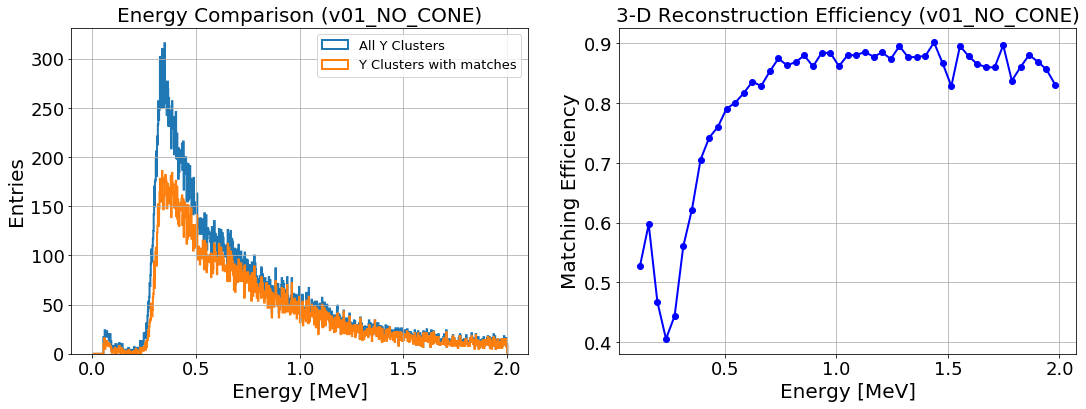

47906


In [82]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)

BINS = np.linspace(0,2,1000)
plt.hist(dfcut_all_v01_NO_CONE['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_v01_NO_CONE['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison (v01_NO_CONE)',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.subplot(1, 2, 2)


BINS = np.linspace(0.1,2,50)

vals2D_v01_NO_CONE, bins2D_v01_NO_CONE = np.histogram(dfcut_all_v01_NO_CONE['energy'].values,bins=BINS)
vals3D_v01_NO_CONE, bins3D_v01_NO_CONE = np.histogram(dfcut_match_v01_NO_CONE['energy'].values,bins=BINS)
binC_v01_NO_CONE = 0.5*(bins2D_v01_NO_CONE[1:]+bins2D_v01_NO_CONE[:-1])
vals2D_v01_NO_CONE = vals2D_v01_NO_CONE.astype(float)
#print vals2D_NO_CONE
vals3D_v01_NO_CONE = vals3D_v01_NO_CONE.astype(float)
ratio_v_v01_NO_CONE = []
for i,v in enumerate(vals2D_v01_NO_CONE):
    if (v == 0):
        ratio_v_v01_NO_CONE.append(0.)
    else:
        ratio_v_v01_NO_CONE.append(vals3D_v01_NO_CONE[i]/v)
#print ratio_v
plt.plot(binC_v01_NO_CONE,ratio_v_v01_NO_CONE,'bo-',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v01_NO_CONE)',fontsize=20)

plt.grid()
plt.show()
#fig.savefig('Ratio.png', dpi=300)
print dfcut_match_v01_NO_CONE.shape[0]

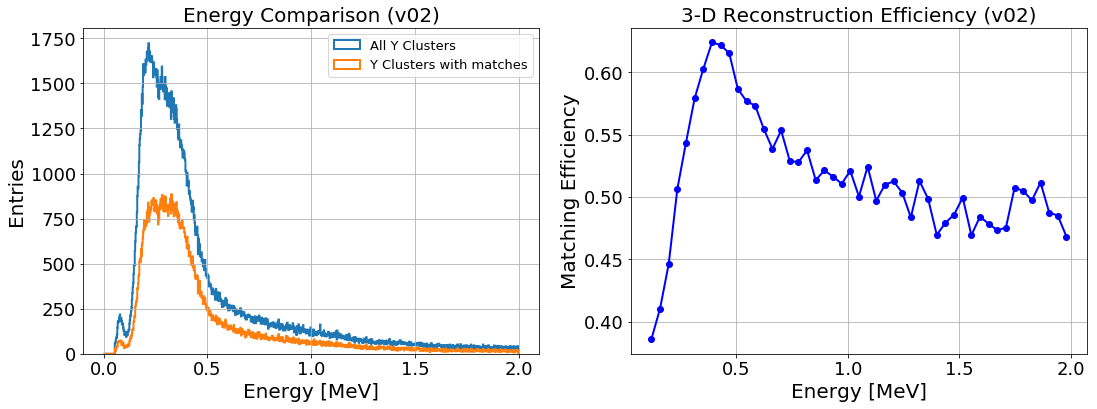

In [83]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)

BINS = np.linspace(0,2,1000)
plt.hist(dfcut_all_v02['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_v02['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison (v02)',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.subplot(1, 2, 2)


BINS = np.linspace(0.1,2,50)

vals2D_v02, bins2D_v02 = np.histogram(dfcut_all_v02['energy'].values,bins=BINS)
vals3D_v02, bins3D_v02 = np.histogram(dfcut_match_v02['energy'].values,bins=BINS)
binC_v02 = 0.5*(bins2D_v02[1:]+bins2D_v02[:-1])
vals2D_v02 = vals2D_v02.astype(float)
#print vals2D
vals3D_v02 = vals3D_v02.astype(float)
ratio_v_v02 = []
for i,v in enumerate(vals2D_v02):
    if (v == 0):
        ratio_v_v02.append(0.)
    else:
        ratio_v_v02.append(vals3D_v02[i]/v)
#print ratio_v
plt.plot(binC_v02,ratio_v_v02,'bo-',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v02)',fontsize=20)

plt.grid()
plt.show()
#fig.savefig('Ratio.png', dpi=300)

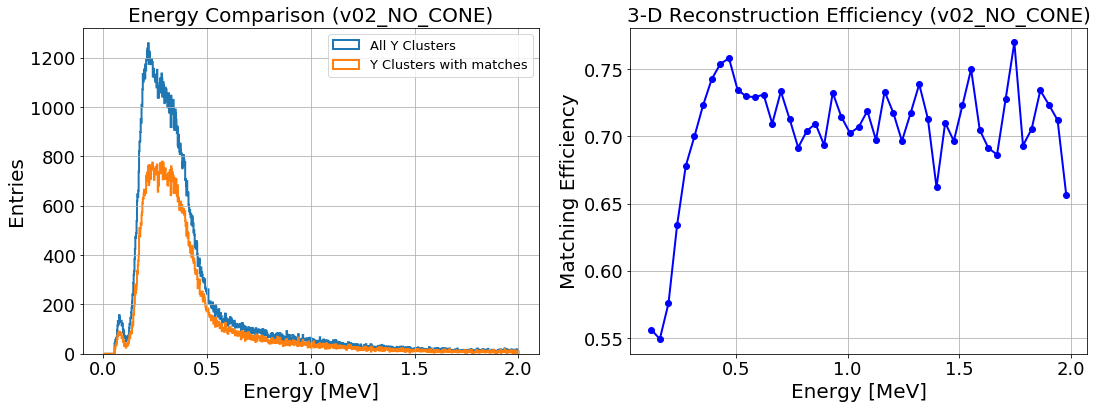

129268


In [84]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)

BINS = np.linspace(0,2,1000)
plt.hist(dfcut_all_v02_NO_CONE['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_v02_NO_CONE['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison (v02_NO_CONE)',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.subplot(1, 2, 2)


BINS = np.linspace(0.1,2,50)

vals2D_v02_NO_CONE, bins2D_v02_NO_CONE = np.histogram(dfcut_all_v02_NO_CONE['energy'].values,bins=BINS)
vals3D_v02_NO_CONE, bins3D_v02_NO_CONE = np.histogram(dfcut_match_v02_NO_CONE['energy'].values,bins=BINS)
binC_v02_NO_CONE = 0.5*(bins2D_v02_NO_CONE[1:]+bins2D_v02_NO_CONE[:-1])
vals2D_v02_NO_CONE = vals2D_v02_NO_CONE.astype(float)
#print vals2D
vals3D_v02_NO_CONE = vals3D_v02_NO_CONE.astype(float)
ratio_v_v02_NO_CONE = []
for i,v in enumerate(vals2D_v02_NO_CONE):
    if (v == 0):
        ratio_v_v02_NO_CONE.append(0.)
    else:
        ratio_v_v02_NO_CONE.append(vals3D_v02_NO_CONE[i]/v)
#print ratio_v
plt.plot(binC_v02_NO_CONE,ratio_v_v02_NO_CONE,'bo-',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v02_NO_CONE)',fontsize=20)

plt.grid()
plt.show()
#fig.savefig('Ratio.png', dpi=300)
print dfcut_match_v02_NO_CONE.shape[0]

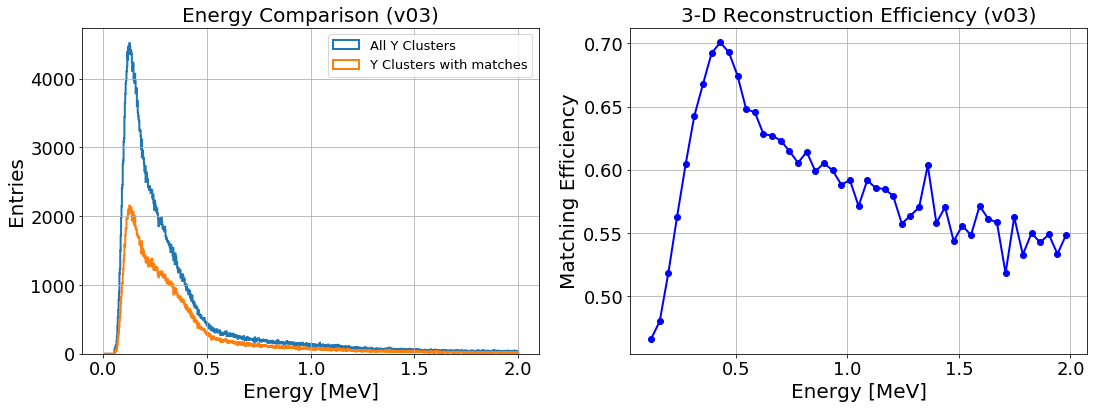

In [85]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)

BINS = np.linspace(0,2,1000)
plt.hist(dfcut_all_v03['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_v03['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison (v03)',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.subplot(1, 2, 2)


BINS = np.linspace(0.1,2,50)

vals2D_v03, bins2D_v03 = np.histogram(dfcut_all_v03['energy'].values,bins=BINS)
vals3D_v03, bins3D_v03 = np.histogram(dfcut_match_v03['energy'].values,bins=BINS)
binC_v03 = 0.5*(bins2D_v03[1:]+bins2D_v03[:-1])
vals2D_v03 = vals2D_v03.astype(float)
#print vals2D
vals3D_v03 = vals3D_v03.astype(float)
ratio_v_v03 = []
for i,v in enumerate(vals2D_v03):
    if (v == 0):
        ratio_v_v03.append(0.)
    else:
        ratio_v_v03.append(vals3D_v03[i]/v)
#print ratio_v
plt.plot(binC_v03,ratio_v_v03,'bo-',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v03)',fontsize=20)

plt.grid()
plt.show()
#fig.savefig('Ratio.png', dpi=300)


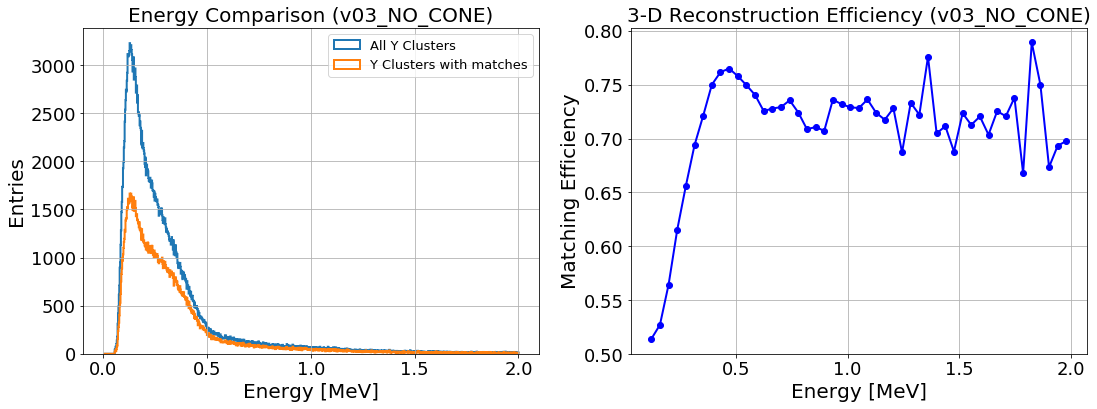

223480


In [86]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)

BINS = np.linspace(0,2,1000)
plt.hist(dfcut_all_v03_NO_CONE['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_v03_NO_CONE['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison (v03_NO_CONE)',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.subplot(1, 2, 2)


BINS = np.linspace(0.1,2,50)

vals2D_v03_NO_CONE, bins2D_v03_NO_CONE = np.histogram(dfcut_all_v03_NO_CONE['energy'].values,bins=BINS)
vals3D_v03_NO_CONE, bins3D_v03_NO_CONE = np.histogram(dfcut_match_v03_NO_CONE['energy'].values,bins=BINS)
binC_v03_NO_CONE = 0.5*(bins2D_v03_NO_CONE[1:]+bins2D_v03_NO_CONE[:-1])
vals2D_v03_NO_CONE = vals2D_v03_NO_CONE.astype(float)
#print vals2D
vals3D_v03_NO_CONE = vals3D_v03_NO_CONE.astype(float)
ratio_v_v03_NO_CONE = []
for i,v in enumerate(vals2D_v03_NO_CONE):
    if (v == 0):
        ratio_v_v03_NO_CONE.append(0.)
    else:
        ratio_v_v03_NO_CONE.append(vals3D_v03_NO_CONE[i]/v)
#print ratio_v
plt.plot(binC_v03_NO_CONE,ratio_v_v03_NO_CONE,'bo-',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v03_NO_CONE)',fontsize=20)

plt.grid()
plt.show()
#fig.savefig('Ratio.png', dpi=300)
print dfcut_match_v03_NO_CONE.shape[0]

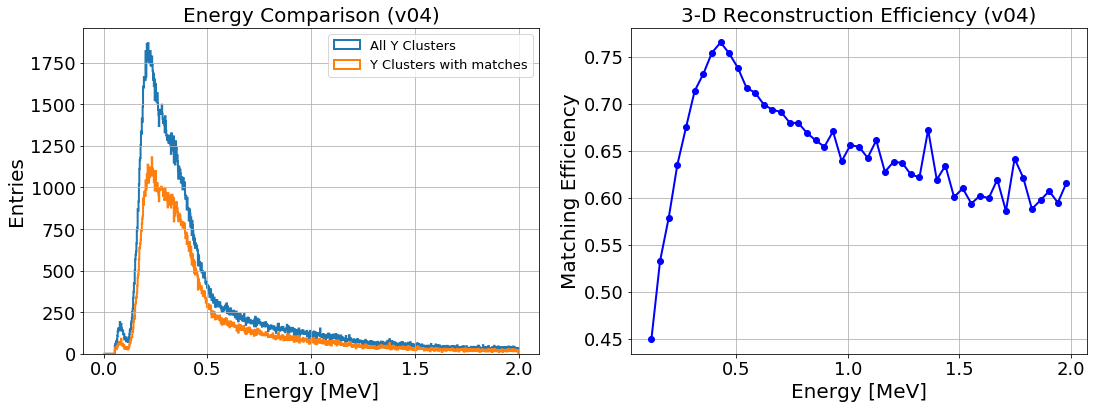

In [87]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)

BINS = np.linspace(0,2,1000)
plt.hist(dfcut_all_v04['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_v04['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison (v04)',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.subplot(1, 2, 2)


BINS = np.linspace(0.1,2,50)

vals2D_v04, bins2D_v04 = np.histogram(dfcut_all_v04['energy'].values,bins=BINS)
vals3D_v04, bins3D_v04 = np.histogram(dfcut_match_v04['energy'].values,bins=BINS)
binC_v04 = 0.5*(bins2D_v04[1:]+bins2D_v04[:-1])
vals2D_v04 = vals2D_v04.astype(float)
#print vals2D
vals3D_v04 = vals3D_v04.astype(float)
ratio_v_v04 = []
for i,v in enumerate(vals2D_v04):
    if (v == 0):
        ratio_v_v04.append(0.)
    else:
        ratio_v_v04.append(vals3D_v04[i]/v)
#print ratio_v
plt.plot(binC_v04,ratio_v_v04,'bo-',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v04)',fontsize=20)

plt.grid()
plt.show()
#fig.savefig('Ratio.png', dpi=300)

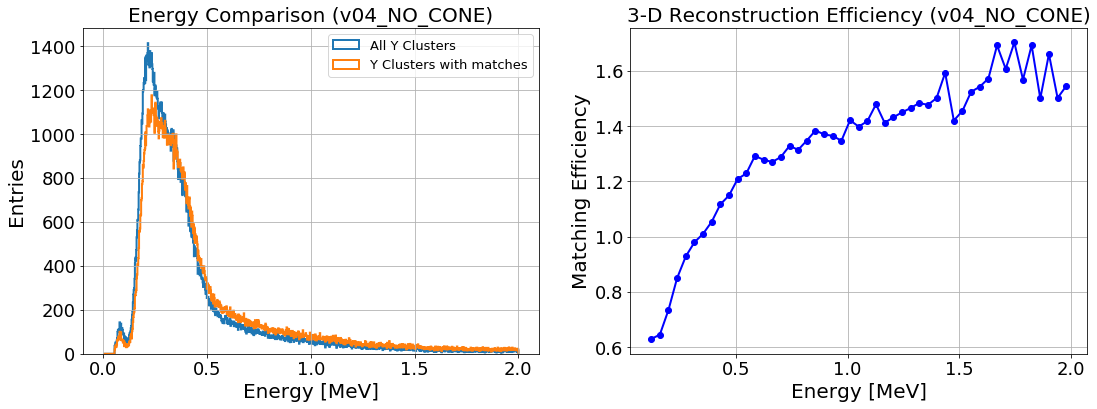

202381


In [88]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)

BINS = np.linspace(0,2,1000)
plt.hist(dfcut_all_v04_NO_CONE['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_v04_NO_CONE['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison (v04_NO_CONE)',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.subplot(1, 2, 2)


BINS = np.linspace(0.1,2,50)

vals2D_v04_NO_CONE, bins2D_v04_NO_CONE = np.histogram(dfcut_all_v04_NO_CONE['energy'].values,bins=BINS)
vals3D_v04_NO_CONE, bins3D_v04_NO_CONE = np.histogram(dfcut_match_v04_NO_CONE['energy'].values,bins=BINS)
binC_v04_NO_CONE = 0.5*(bins2D_v04_NO_CONE[1:]+bins2D_v04[:-1])
vals2D_v04_NO_CONE = vals2D_v04_NO_CONE.astype(float)
#print vals2D
vals3D_v04_NO_CONE = vals3D_v04_NO_CONE.astype(float)
ratio_v_v04_NO_CONE = []
for i,v in enumerate(vals2D_v04_NO_CONE):
    if (v == 0):
        ratio_v_v04_NO_CONE.append(0.)
    else:
        ratio_v_v04_NO_CONE.append(vals3D_v04_NO_CONE[i]/v)
#print ratio_v
plt.plot(binC_v04_NO_CONE,ratio_v_v04_NO_CONE,'bo-',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v04_NO_CONE)',fontsize=20)

plt.grid()
plt.show()
#fig.savefig('Ratio.png', dpi=300)
print dfcut_match_v04_NO_CONE.shape[0]

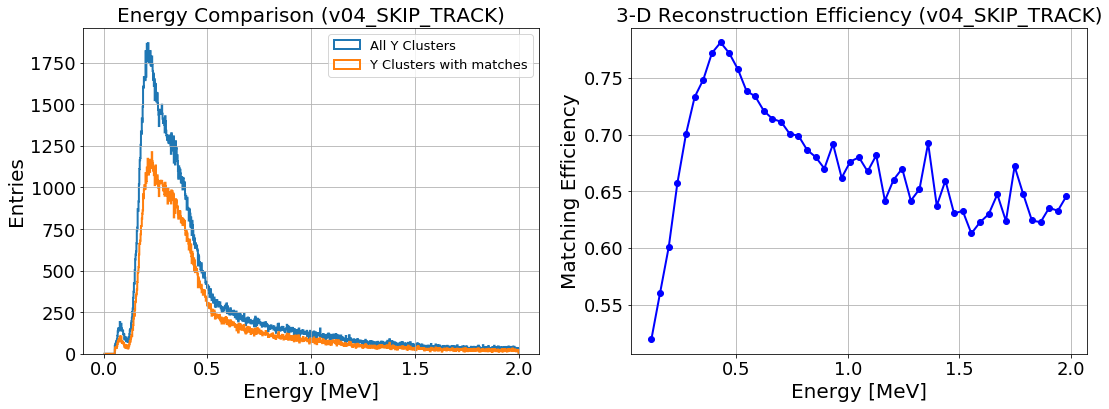

204552


In [89]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)

BINS = np.linspace(0,2,1000)
plt.hist(dfcut_all_v04_SKIP_TRACK['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_v04_SKIP_TRACK['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison (v04_SKIP_TRACK)',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.subplot(1, 2, 2)


BINS = np.linspace(0.1,2,50)

vals2D_v04_SKIP_TRACK, bins2D_v04_SKIP_TRACK = np.histogram(dfcut_all_v04_SKIP_TRACK['energy'].values,bins=BINS)
vals3D_v04_SKIP_TRACK, bins3D_v04_SKIP_TRACK = np.histogram(dfcut_match_v04_SKIP_TRACK['energy'].values,bins=BINS)
binC_v04_SKIP_TRACK = 0.5*(bins2D_v04_SKIP_TRACK[1:]+bins2D_v04[:-1])
vals2D_v04_SKIP_TRACK = vals2D_v04_SKIP_TRACK.astype(float)
#print vals2D
vals3D_v04_SKIP_TRACK = vals3D_v04_SKIP_TRACK.astype(float)
ratio_v_v04_SKIP_TRACK = []
for i,v in enumerate(vals2D_v04_SKIP_TRACK):
    if (v == 0):
        ratio_v_v04_SKIP_TRACK.append(0.)
    else:
        ratio_v_v04_SKIP_TRACK.append(vals3D_v04_SKIP_TRACK[i]/v)
#print ratio_v
plt.plot(binC_v04_SKIP_TRACK,ratio_v_v04_SKIP_TRACK,'bo-',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v04_SKIP_TRACK)',fontsize=20)

plt.grid()
plt.show()
#fig.savefig('Ratio.png', dpi=300)
print dfcut_match_v04_SKIP_TRACK.shape[0]

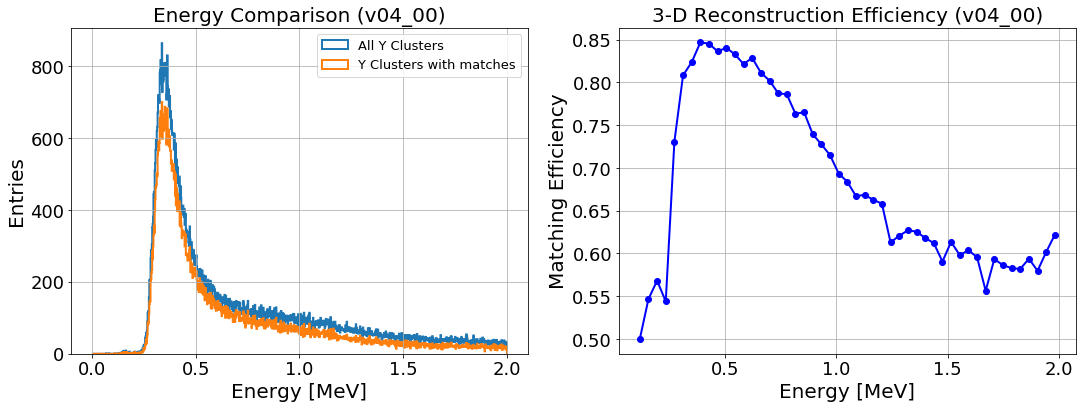

In [90]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)

BINS = np.linspace(0,2,1000)
plt.hist(dfcut_all_v04_00['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_v04_00['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison (v04_00)',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.subplot(1, 2, 2)


BINS = np.linspace(0.1,2,50)

vals2D_v04_00, bins2D_v04_00 = np.histogram(dfcut_all_v04_00['energy'].values,bins=BINS)
vals3D_v04_00, bins3D_v04_00 = np.histogram(dfcut_match_v04_00['energy'].values,bins=BINS)
binC_v04_00 = 0.5*(bins2D_v04_00[1:]+bins2D_v04_00[:-1])
vals2D_v04_00 = vals2D_v04_00.astype(float)
#print vals2D
vals3D_v04_00 = vals3D_v04_00.astype(float)
ratio_v_v04_00 = []
for i,v in enumerate(vals2D_v04_00):
    if (v == 0):
        ratio_v_v04_00.append(0.)
    else:
        ratio_v_v04_00.append(vals3D_v04_00[i]/v)
#print ratio_v
plt.plot(binC_v04_00,ratio_v_v04_00,'bo-',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v04_00)',fontsize=20)

plt.grid()
plt.show()
#fig.savefig('Ratio.png', dpi=300)

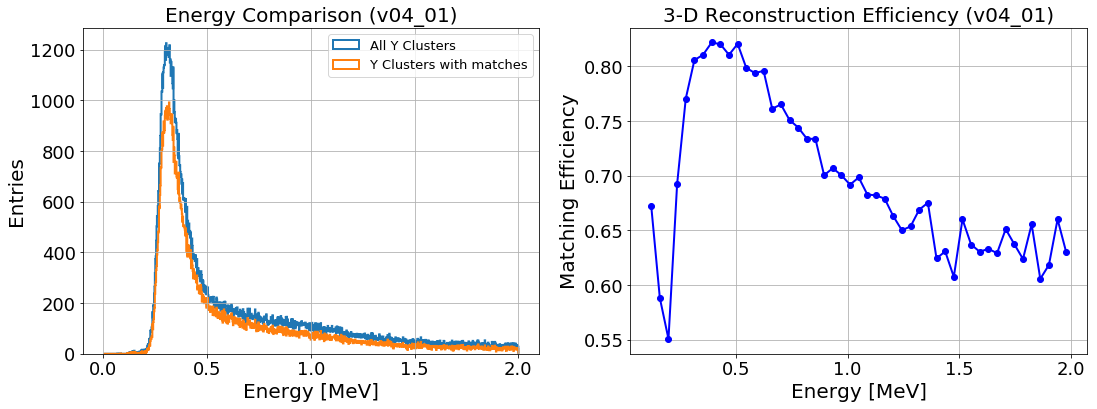

In [91]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)

BINS = np.linspace(0,2,1000)
plt.hist(dfcut_all_v04_01['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_v04_01['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison (v04_01)',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.subplot(1, 2, 2)


BINS = np.linspace(0.1,2,50)

vals2D_v04_01, bins2D_v04_01 = np.histogram(dfcut_all_v04_01['energy'].values,bins=BINS)
vals3D_v04_01, bins3D_v04_01 = np.histogram(dfcut_match_v04_01['energy'].values,bins=BINS)
binC_v04_01 = 0.5*(bins2D_v04_01[1:]+bins2D_v04_01[:-1])
vals2D_v04_01 = vals2D_v04_01.astype(float)
#print vals2D
vals3D_v04_01 = vals3D_v04_01.astype(float)
ratio_v_v04_01 = []
for i,v in enumerate(vals2D_v04_01):
    if (v == 0):
        ratio_v_v04_01.append(0.)
    else:
        ratio_v_v04_01.append(vals3D_v04_01[i]/v)
#print ratio_v
plt.plot(binC_v04_01,ratio_v_v04_01,'bo-',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v04_01)',fontsize=20)

plt.grid()
plt.show()
#fig.savefig('Ratio.png', dpi=300)

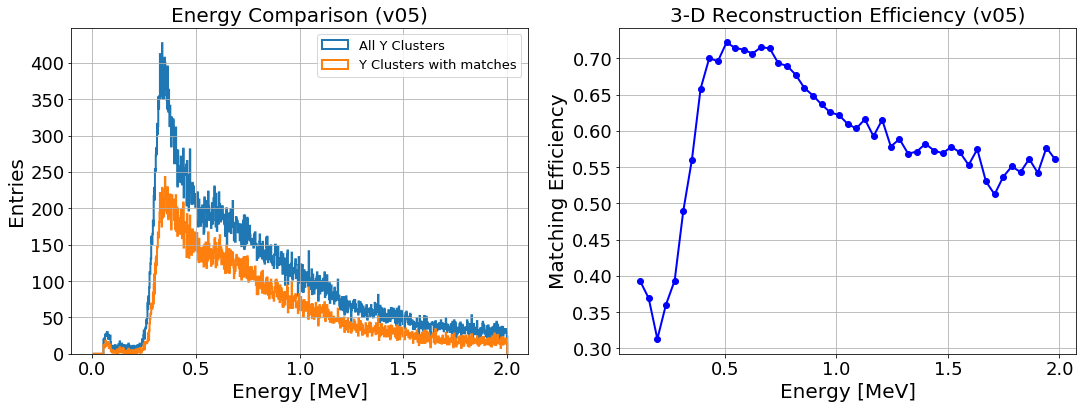

In [92]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)

BINS = np.linspace(0,2,1000)
plt.hist(dfcut_all_v05['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_v05['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison (v05)',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.subplot(1, 2, 2)


BINS = np.linspace(0.1,2,50)

vals2D_v05, bins2D_v05 = np.histogram(dfcut_all_v05['energy'].values,bins=BINS)
vals3D_v05, bins3D_v05 = np.histogram(dfcut_match_v05['energy'].values,bins=BINS)
binC_v05 = 0.5*(bins2D_v05[1:]+bins2D_v05[:-1])
vals2D_v05 = vals2D_v05.astype(float)
#print vals2D
vals3D_v05 = vals3D_v05.astype(float)
ratio_v_v05 = []
for i,v in enumerate(vals2D_v05):
    if (v == 0):
        ratio_v_v05.append(0.)
    else:
        ratio_v_v05.append(vals3D_v05[i]/v)
#print ratio_v
plt.plot(binC_v05,ratio_v_v05,'bo-',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v05)',fontsize=20)

plt.grid()
plt.show()
#fig.savefig('Ratio.png', dpi=300)

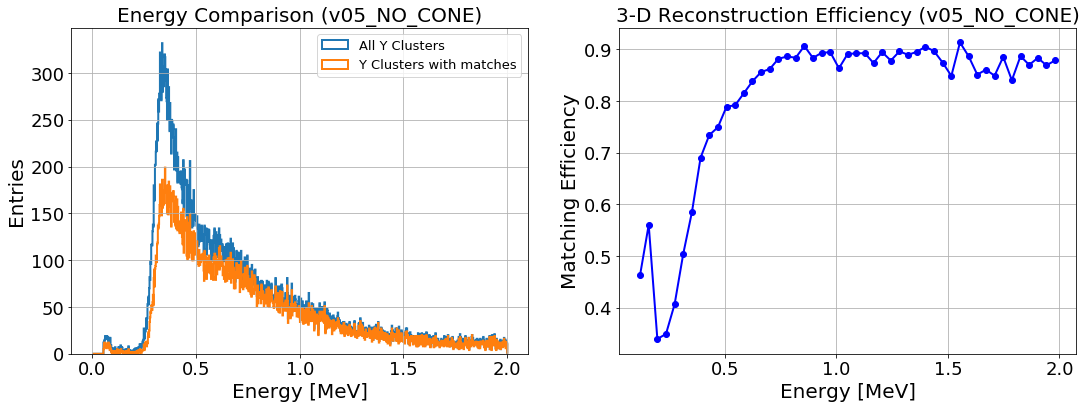

46953


In [93]:
fig = plt.figure(figsize=(18,6))
plt.subplot(1, 2, 1)

BINS = np.linspace(0,2,1000)
plt.hist(dfcut_all_v05_NO_CONE['energy'].values, bins=BINS,histtype='step',lw=2,label='All Y Clusters')
plt.hist(dfcut_match_v05_NO_CONE['energy'].values, bins=BINS,histtype='step',lw=2,label='Y Clusters with matches')
#plt.yscale('log')
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Energy Comparison (v05_NO_CONE)',fontsize=20)
plt.legend(loc=1,fontsize=13)
plt.grid()
plt.subplot(1, 2, 2)


BINS = np.linspace(0.1,2,50)

vals2D_v05_NO_CONE, bins2D_v05_NO_CONE = np.histogram(dfcut_all_v05_NO_CONE['energy'].values,bins=BINS)
vals3D_v05_NO_CONE, bins3D_v05_NO_CONE = np.histogram(dfcut_match_v05_NO_CONE['energy'].values,bins=BINS)
binC_v05_NO_CONE = 0.5*(bins2D_v05_NO_CONE[1:]+bins2D_v04[:-1])
vals2D_v05_NO_CONE = vals2D_v05_NO_CONE.astype(float)
#print vals2D
vals3D_v05_NO_CONE = vals3D_v05_NO_CONE.astype(float)
ratio_v_v05_NO_CONE = []
for i,v in enumerate(vals2D_v05_NO_CONE):
    if (v == 0):
        ratio_v_v05_NO_CONE.append(0.)
    else:
        ratio_v_v05_NO_CONE.append(vals3D_v05_NO_CONE[i]/v)
#print ratio_v
plt.plot(binC_v05_NO_CONE,ratio_v_v05_NO_CONE,'bo-',lw=2)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Matching Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency (v05_NO_CONE)',fontsize=20)

plt.grid()
plt.show()
#fig.savefig('Ratio.png', dpi=300)
print dfcut_match_v05_NO_CONE.shape[0]

In [94]:
print df_Cluster_old.shape[0]
#477978
print df_Cluster_v00_NO_CONE.shape[0]
#310399
print df_Cluster_v01_NO_CONE.shape[0]
#47906
print df_Cluster_v02_NO_CONE.shape[0]
#129268
print df_Cluster_v03_NO_CONE.shape[0]
#223480
print df_Cluster_v04_NO_CONE.shape[0]
#143226
print df_Cluster_v05_NO_CONE.shape[0]
#46953

9075104
953064
1505294
25507223
10055139
5861146
1099081


In [95]:
print(46953/477978.)
print(46953/310399.)
print(46953/47906.)
print(46953/129268.)
print(46953/223480.)
print(46953/143226.)
print(46953/46953.)

0.0982325546364
0.151266595575
0.980106875965
0.363222143144
0.210099337748
0.327824556994
1.0


In [96]:
old_scaling=0.0982325546364
v00_scaling=0.151266595575
v01_scaling=0.980106875965
v02_scaling=0.363222143144
v03_scaling=0.210099337748
v04_scaling=0.327824556994
v05_scaling=1.0

In [97]:
n_old = len(dfcut_match_old)
weights_old = np.ones(n_old) * old_scaling # factor needed to scale off-beam to on-beam

n_v00 = len(dfcut_match_v00_NO_CONE)
weights_v00 = np.ones(n_v00) * v00_scaling # factor needed to scale off-beam to on-beam

n_v01 = len(dfcut_match_v01_NO_CONE)
weights_v01 = np.ones(n_v01) * v01_scaling # factor needed to scale off-beam to on-beam

n_v02 = len(dfcut_match_v02_NO_CONE)
weights_v02 = np.ones(n_v02) * v02_scaling # factor needed to scale off-beam to on-beam

n_v03 = len(dfcut_match_v03_NO_CONE)
weights_v03 = np.ones(n_v03) * v03_scaling # factor needed to scale off-beam to on-beam

n_v04 = len(dfcut_match_v04_NO_CONE)
weights_v04 = np.ones(n_v04) * v04_scaling # factor needed to scale off-beam to on-beam


n_v05 = len(dfcut_match_v05_NO_CONE)
weights_v05 = np.ones(n_v05) * v05_scaling # factor needed to scale off-beam to on-beam

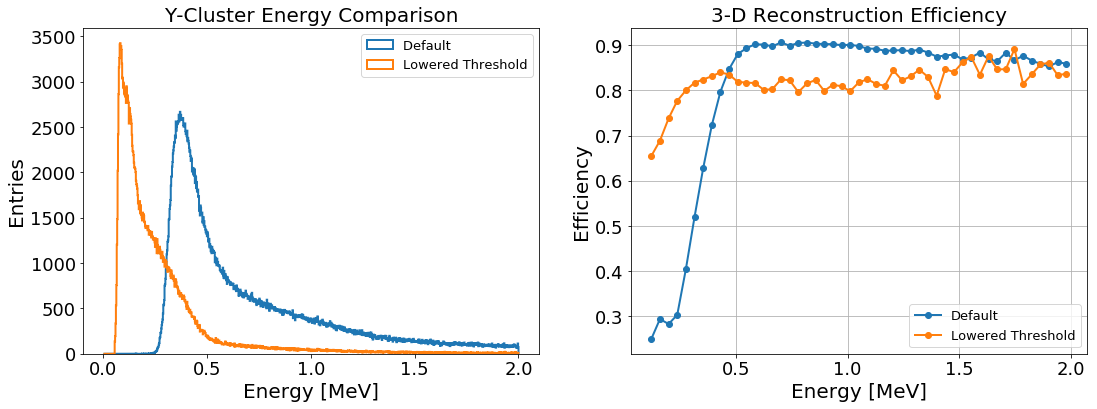

In [98]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0,2,1000)
plt.hist(dfcut_match_old['energy'].values, bins=BINS,histtype='step',lw=2,label='Default ')
#plt.hist(dfcut_match_v00['energy'].values, bins=BINS,histtype='step',lw=2,label='v00')
#plt.hist(dfcut_match_v01['energy'].values, bins=BINS,histtype='step',lw=2,label='v01')
#plt.hist(dfcut_match_v02['energy'].values, bins=BINS,histtype='step',lw=2,label='v02')
#plt.hist(dfcut_match_v03['energy'].values, bins=BINS,histtype='step',lw=2,label='v03')
#plt.hist(dfcut_match_v04['energy'].values, bins=BINS,histtype='step',lw=2,label='v04')
#plt.hist(dfcut_match_v04_00['energy'].values, bins=BINS,histtype='step',lw=2,label='v04_00')
#plt.hist(dfcut_match_v04_01['energy'].values, bins=BINS,histtype='step',lw=2,label='v04_01')
#plt.hist(dfcut_match_v05['energy'].values, bins=BINS,histtype='step',lw=2,label='v05')
plt.hist(dfcut_match_v00_NO_CONE['energy'].values, bins=BINS,histtype='step',lw=2,label='Lowered Threshold')
#plt.hist(dfcut_match_v01_NO_CONE['energy'].values, bins=BINS,histtype='step',lw=2,label='v01')
#plt.hist(dfcut_match_v02_NO_CONE['energy'].values, bins=BINS,histtype='step',lw=2,label='v02')
#plt.hist(dfcut_match_v03_NO_CONE['energy'].values, bins=BINS,histtype='step',lw=2,label='v03')
#plt.hist(dfcut_match_v04_NO_CONE['energy'].values, bins=BINS,histtype='step',lw=2,label='v04')
#plt.hist(dfcut_match_v04_SKIP_TRACK['energy'].values, bins=BINS,histtype='step',lw=2,label='v04_SKIP_TRACK')

#plt.hist(dfcut_match_v05_NO_CONE['energy'].values, bins=BINS,histtype='step',lw=2,label='v05')



plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Energy Comparison',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)



plt.plot(binC_old,ratio_v_old,'o-',lw=2,label='Default')
#plt.plot(binC_v00,ratio_v_v00,'o-',lw=2,label='v00')
#plt.plot(binC_v01,ratio_v_v01,'o-',lw=2,label='v01')
#plt.plot(binC_v02,ratio_v_v02,'o-',lw=2,label='v02')
#plt.plot(binC_v03,ratio_v_v03,'o-',lw=2,label='v03')
#plt.plot(binC_v04,ratio_v_v04,'o-',lw=2,label='v04')
#plt.plot(binC_v04_00,ratio_v_v04_00,'o-',lw=2,label='v04_00')
#plt.plot(binC_v04_01,ratio_v_v04_01,'o-',lw=2,label='v04_01')
#plt.plot(binC_v05,ratio_v_v05,'o-',lw=2,label='v05')


plt.plot(binC_v00_NO_CONE,ratio_v_v00_NO_CONE,'o-',lw=2,label='Lowered Threshold')
#plt.plot(binC_v01_NO_CONE,ratio_v_v01_NO_CONE,'o-',lw=2,label='v01')
#plt.plot(binC_v02_NO_CONE,ratio_v_v02_NO_CONE,'o-',lw=2,label='v02')
#plt.plot(binC_v03_NO_CONE,ratio_v_v03_NO_CONE,'o-',lw=2,label='v03')
#plt.plot(binC_v04_NO_CONE,ratio_v_v04_NO_CONE,'o-',lw=2,label='v04')
#plt.plot(binC_v04_SKIP_TRACK,ratio_v_v04_SKIP_TRACK,'o-',lw=2,label='v04_SKIP_TRACK')


#plt.plot(binC_v05_NO_CONE,ratio_v_v05_NO_CONE,'o-',lw=2,label='v05')


plt.grid()
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency',fontsize=20)
plt.legend(loc=4,fontsize=13)
plt.show()
fig.savefig('Threshold_Comparison.png', dpi=500)



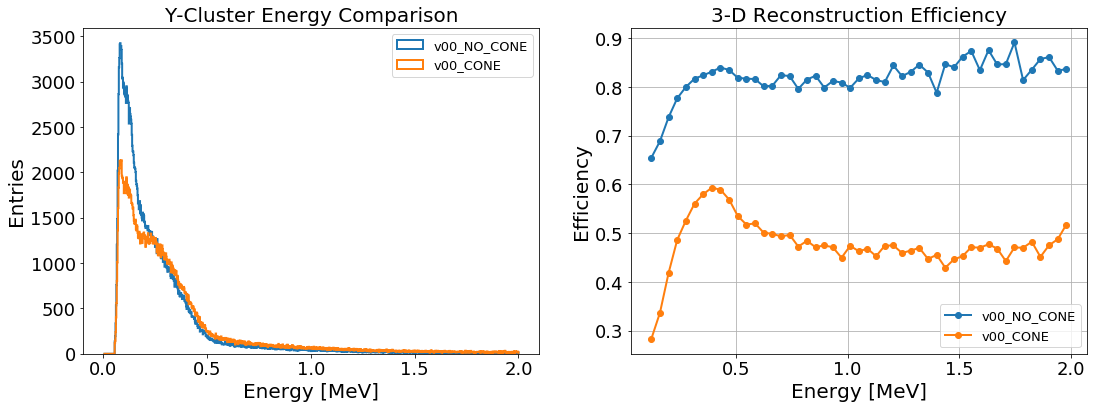

In [99]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0,2,1000)
plt.hist(dfcut_match_v00_NO_CONE['energy'].values, bins=BINS,histtype='step',lw=2,label='v00_NO_CONE')
plt.hist(dfcut_match_v00['energy'].values, bins=BINS,histtype='step',lw=2,label='v00_CONE')



plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Energy Comparison',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
plt.plot(binC_v00_NO_CONE,ratio_v_v00_NO_CONE,'o-',lw=2,label='v00_NO_CONE')
plt.plot(binC_v00,ratio_v_v00,'o-',lw=2,label='v00_CONE')

plt.grid()
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency',fontsize=20)
plt.legend(loc=4,fontsize=13)
plt.show()


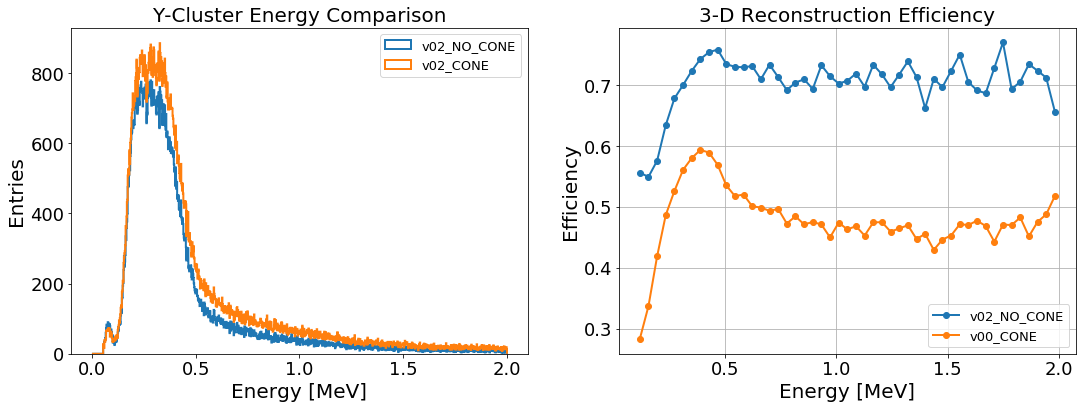

In [100]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0,2,1000)
plt.hist(dfcut_match_v02_NO_CONE['energy'].values, bins=BINS,histtype='step',lw=2,label='v02_NO_CONE')
plt.hist(dfcut_match_v02['energy'].values, bins=BINS,histtype='step',lw=2,label='v02_CONE')



plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Energy Comparison',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
plt.plot(binC_v02_NO_CONE,ratio_v_v02_NO_CONE,'o-',lw=2,label='v02_NO_CONE')
plt.plot(binC_v02,ratio_v_v00,'o-',lw=2,label='v00_CONE')

plt.grid()
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency',fontsize=20)
plt.legend(loc=4,fontsize=13)
plt.show()


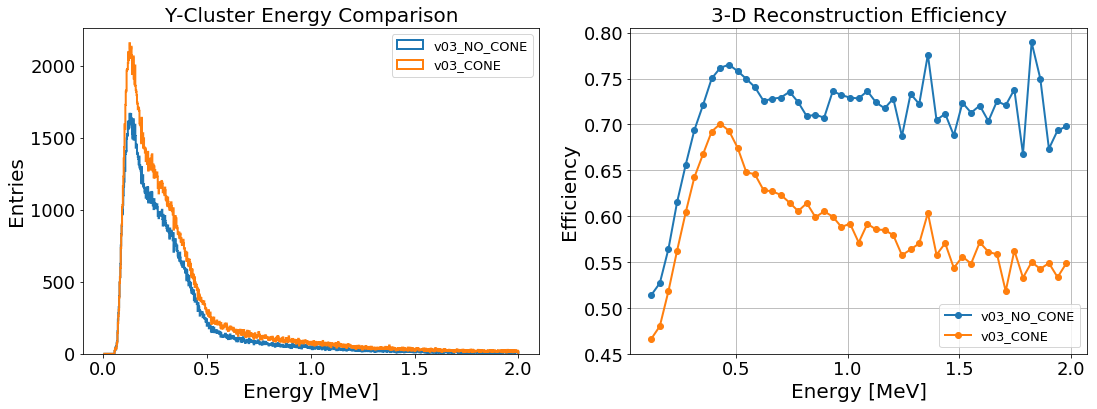

In [101]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0,2,1000)
plt.hist(dfcut_match_v03_NO_CONE['energy'].values, bins=BINS,histtype='step',lw=2,label='v03_NO_CONE')
plt.hist(dfcut_match_v03['energy'].values, bins=BINS,histtype='step',lw=2,label='v03_CONE')



plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Energy Comparison',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
plt.plot(binC_v03_NO_CONE,ratio_v_v03_NO_CONE,'o-',lw=2,label='v03_NO_CONE')
plt.plot(binC_v03,ratio_v_v03,'o-',lw=2,label='v03_CONE')

plt.grid()
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency',fontsize=20)
plt.legend(loc=4,fontsize=13)
plt.show()


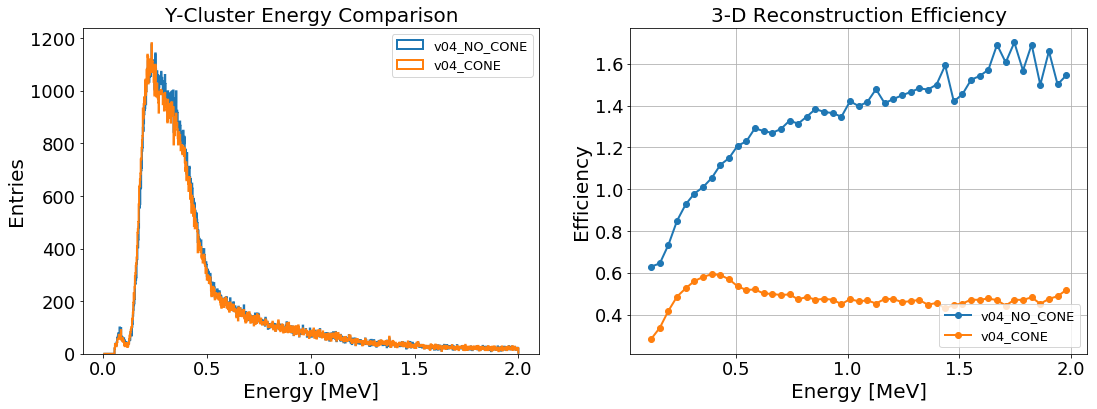

In [102]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0,2,1000)
plt.hist(dfcut_match_v04_NO_CONE['energy'].values, bins=BINS,histtype='step',lw=2,label='v04_NO_CONE')
plt.hist(dfcut_match_v04['energy'].values, bins=BINS,histtype='step',lw=2,label='v04_CONE')



plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Energy Comparison',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
plt.plot(binC_v04_NO_CONE,ratio_v_v04_NO_CONE,'o-',lw=2,label='v04_NO_CONE')
plt.plot(binC_v04,ratio_v_v00,'o-',lw=2,label='v04_CONE')

plt.grid()
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency',fontsize=20)
plt.legend(loc=4,fontsize=13)
plt.show()


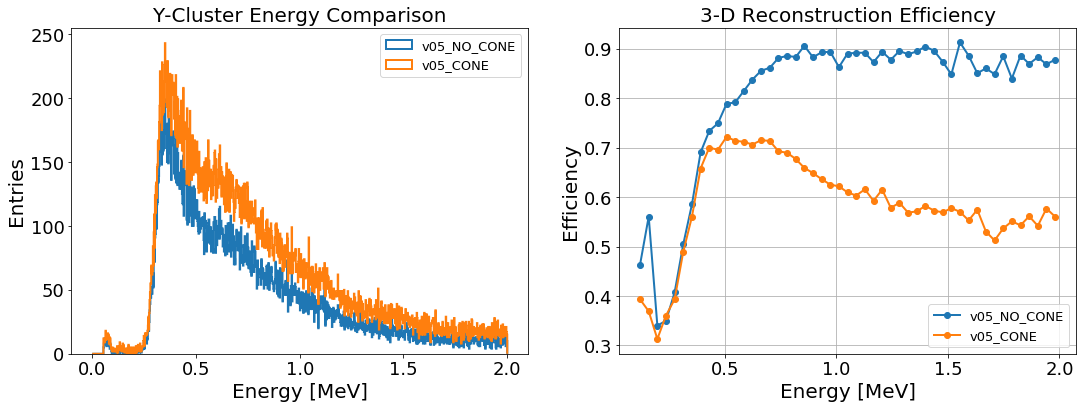

In [103]:
fig = plt.figure(figsize=(18,6))

plt.subplot(1, 2, 1)

BINS = np.linspace(0,2,1000)
plt.hist(dfcut_match_v05_NO_CONE['energy'].values, bins=BINS,histtype='step',lw=2,label='v05_NO_CONE')
plt.hist(dfcut_match_v05['energy'].values, bins=BINS,histtype='step',lw=2,label='v05_CONE')



plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Energy Comparison',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.subplot(1, 2, 2)
plt.plot(binC_v05_NO_CONE,ratio_v_v05_NO_CONE,'o-',lw=2,label='v05_NO_CONE')
plt.plot(binC_v05,ratio_v_v05,'o-',lw=2,label='v05_CONE')

plt.grid()
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Efficiency',fontsize=20)
plt.title('3-D Reconstruction Efficiency',fontsize=20)
plt.legend(loc=4,fontsize=13)
plt.show()


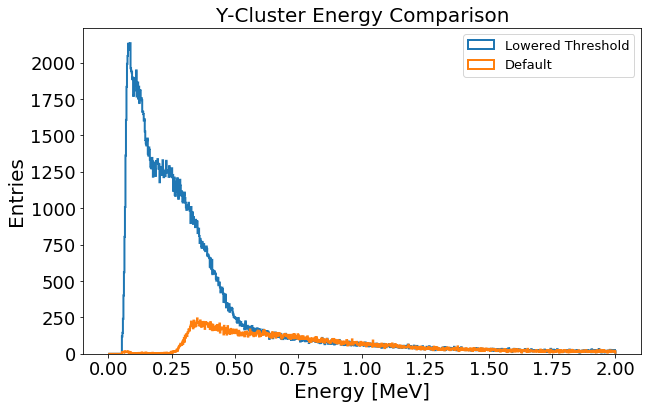

In [104]:
fig = plt.figure(figsize=(10,6))
BINS = np.linspace(0,2,1000)
plt.hist(dfcut_match_v00['energy'].values, bins=BINS,histtype='step',lw=2,label='Lowered Threshold')#,normed=True)

plt.hist(dfcut_match_v05['energy'].values, bins=BINS,histtype='step',lw=2,label='Default')#,normed=True)
plt.xlabel("Energy [MeV]",fontsize=20)
plt.ylabel('Entries',fontsize=20)
plt.title('Y-Cluster Energy Comparison',fontsize=20)


plt.legend(loc=1,fontsize=13)
plt.show()
fig.savefig('Ar39_and_noise.png', dpi=500)

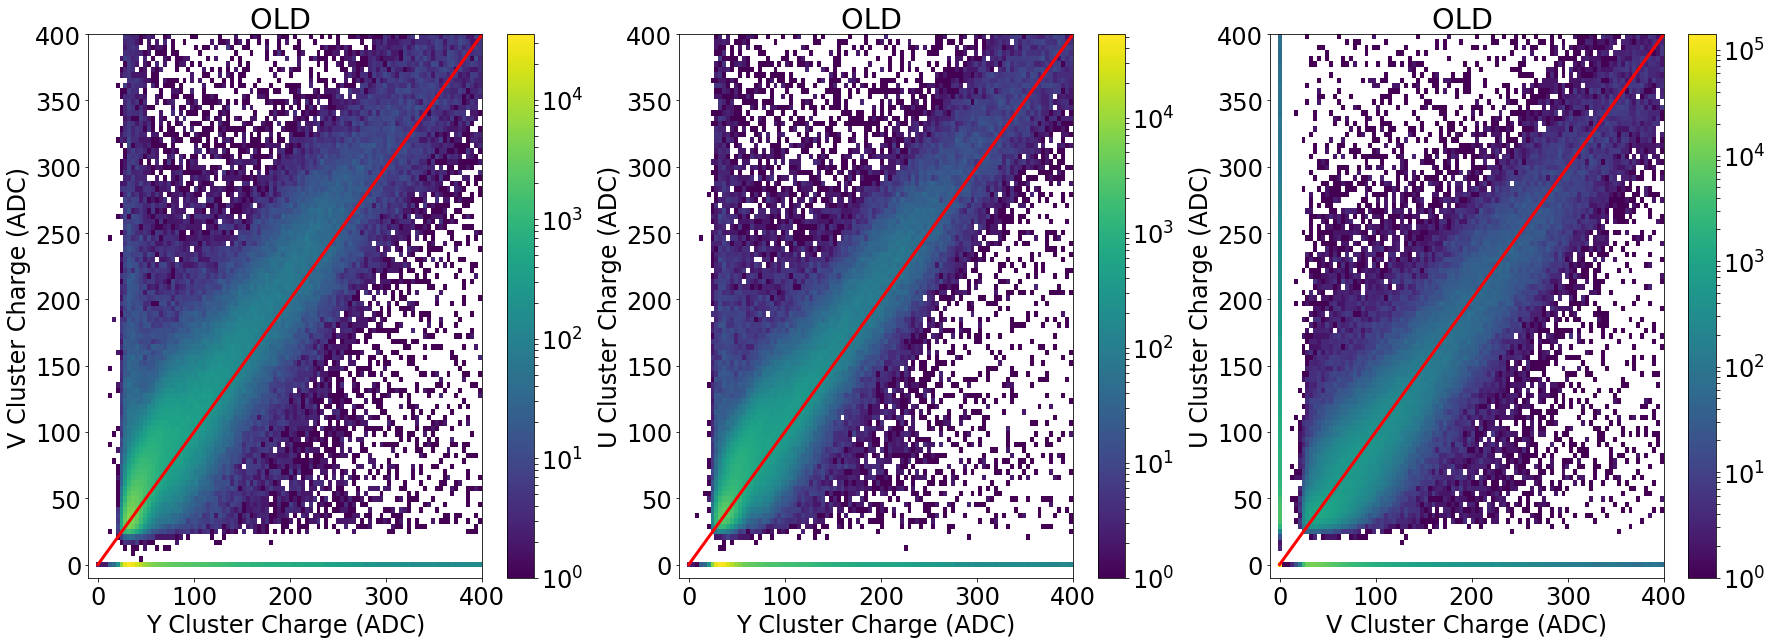

In [105]:
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(df_Matching_old['Y_cluster_charge'].values,df_Matching_old['V_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('OLD ')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(df_Matching_old['Y_cluster_charge'].values,df_Matching_old['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('OLD ')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(df_Matching_old['V_cluster_charge'].values,df_Matching_old['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('V Cluster Charge (ADC)')
plt.title('OLD ')
#plt.legend(loc=1)
plt.show()

#plt.draw()
#fig.savefig('charge11.png', dpi=270)



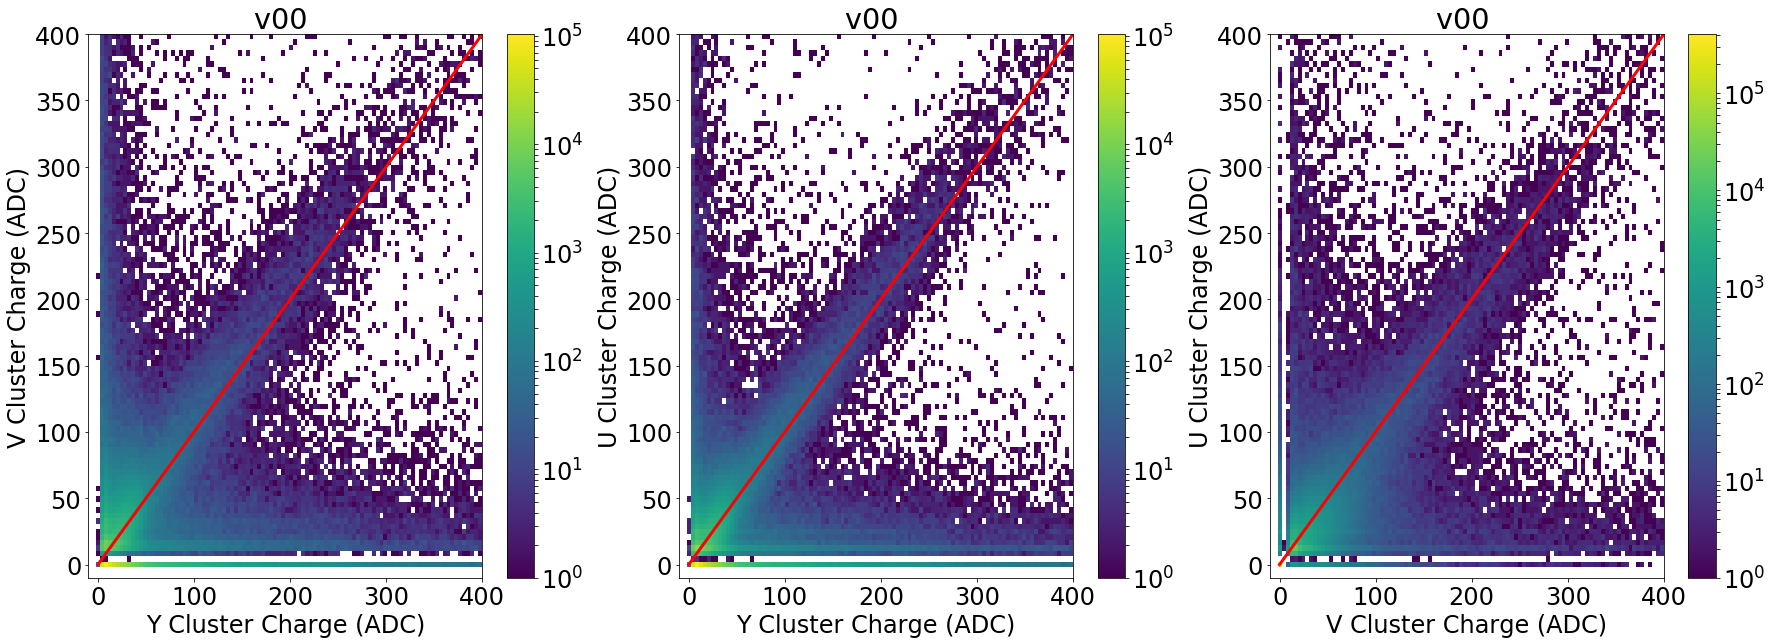

In [106]:
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(df_Matching_v00['Y_cluster_charge'].values,df_Matching_v00['V_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('v00 ')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(df_Matching_v00['Y_cluster_charge'].values,df_Matching_v00['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('v00 ')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(df_Matching_v00['V_cluster_charge'].values,df_Matching_v00['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('V Cluster Charge (ADC)')
plt.title('v00 ')
#plt.legend(loc=1)
plt.show()

#plt.draw()
#fig.savefig('charge11.png', dpi=270)



In [107]:
# fig = plt.figure(figsize=(30,10))
# plt.rcParams.update({'font.size': 24})
# plt.subplot(1, 3, 1)
# plt.hist2d(df_Matching_v01['Y_cluster_charge'].values,df_Matching_v01['V_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
# plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
# plt.colorbar()
# plt.ylabel('V Cluster Charge (ADC)')
# plt.xlabel('Y Cluster Charge (ADC)')
# plt.title('v01 ')
# #plt.legend(loc=1)

# plt.subplot(1, 3, 2)
# plt.hist2d(df_Matching_v01['Y_cluster_charge'].values,df_Matching_v01['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
# plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
# plt.colorbar()
# plt.ylabel('U Cluster Charge (ADC)')
# plt.xlabel('Y Cluster Charge (ADC)')
# plt.title('v01 ')
# #plt.legend(loc=1)


# plt.subplot(1, 3, 3)
# plt.hist2d(df_Matching_v01['V_cluster_charge'].values,df_Matching_v01['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
# plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
# plt.colorbar()
# plt.ylabel('U Cluster Charge (ADC)')
# plt.xlabel('V Cluster Charge (ADC)')
# plt.title('v01 ')
# #plt.legend(loc=1)
# plt.show()

# #plt.draw()
# #fig.savefig('charge11.png', dpi=270)



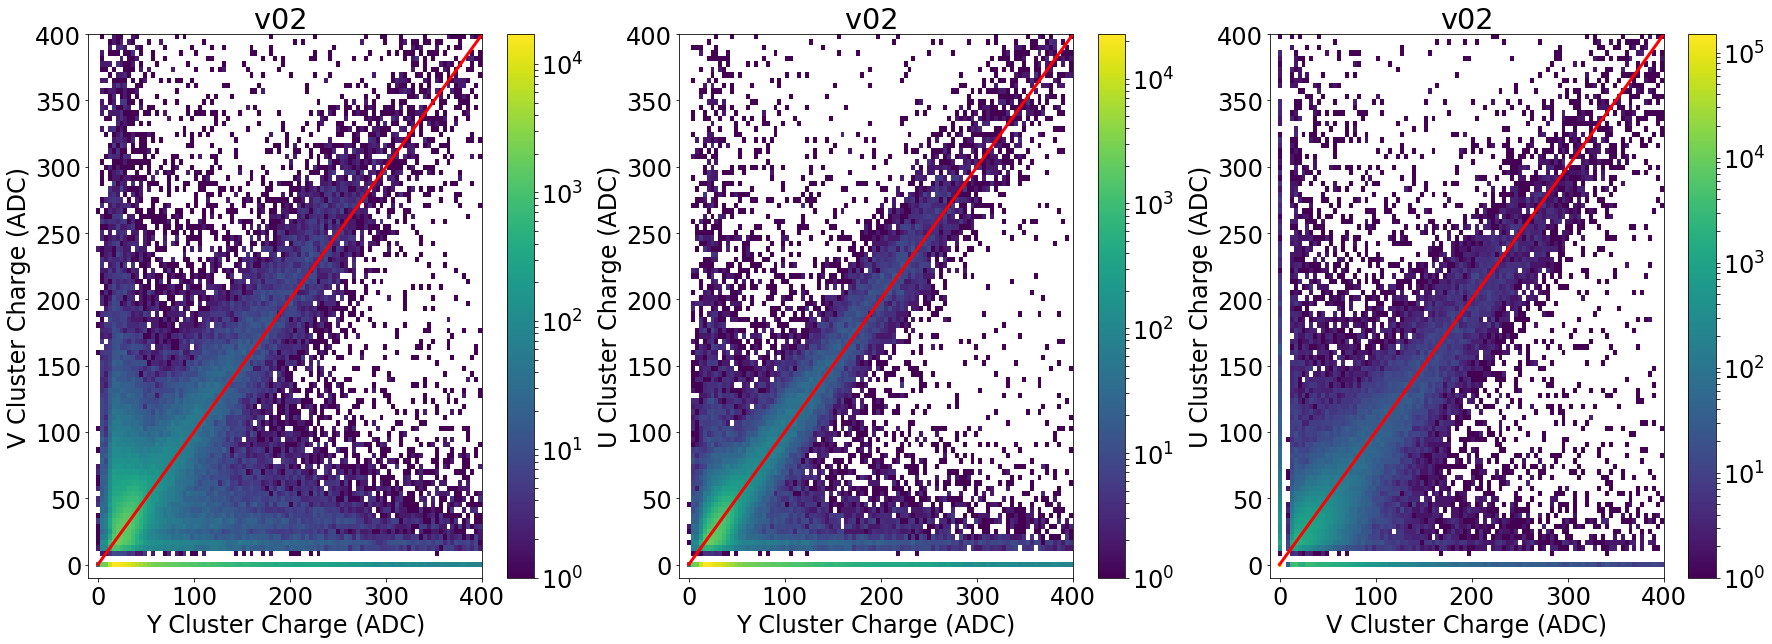

In [108]:
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(df_Matching_v02['Y_cluster_charge'].values,df_Matching_v02['V_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('v02 ')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(df_Matching_v02['Y_cluster_charge'].values,df_Matching_v02['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('v02 ')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(df_Matching_v02['V_cluster_charge'].values,df_Matching_v02['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('V Cluster Charge (ADC)')
plt.title('v02')
#plt.legend(loc=1)
plt.show()

#plt.draw()
#fig.savefig('charge11.png', dpi=270)



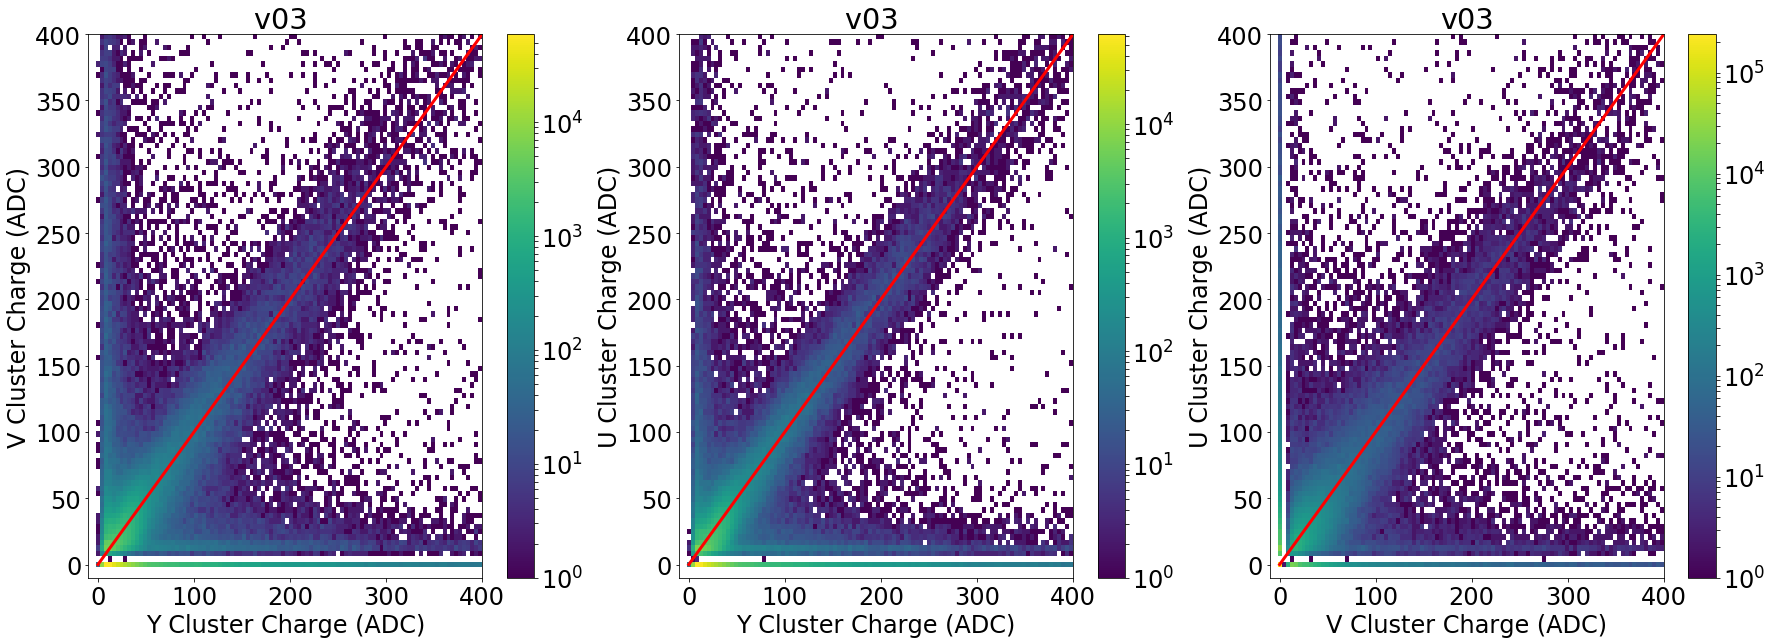

In [109]:
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(df_Matching_v03['Y_cluster_charge'].values,df_Matching_v03['V_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('v03 ')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(df_Matching_v03['Y_cluster_charge'].values,df_Matching_v03['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('v03 ')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(df_Matching_v03['V_cluster_charge'].values,df_Matching_v03['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('V Cluster Charge (ADC)')
plt.title('v03')
#plt.legend(loc=1)
plt.show()

#plt.draw()
#fig.savefig('charge11.png', dpi=270)



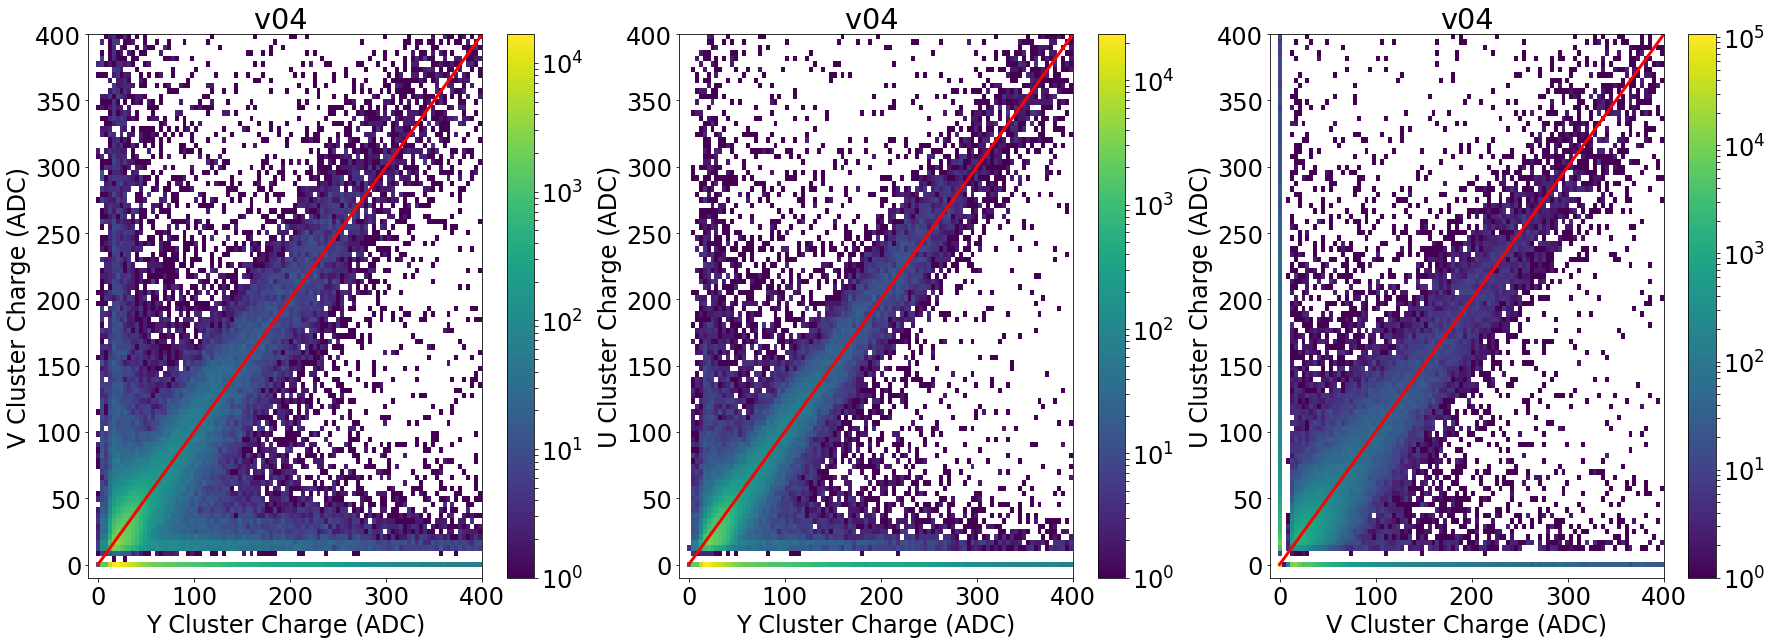

In [110]:
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(df_Matching_v04['Y_cluster_charge'].values,df_Matching_v04['V_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('v04 ')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(df_Matching_v04['Y_cluster_charge'].values,df_Matching_v04['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('v04 ')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(df_Matching_v04['V_cluster_charge'].values,df_Matching_v04['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('V Cluster Charge (ADC)')
plt.title('v04')
#plt.legend(loc=1)
plt.show()

#plt.draw()
#fig.savefig('charge11.png', dpi=270)



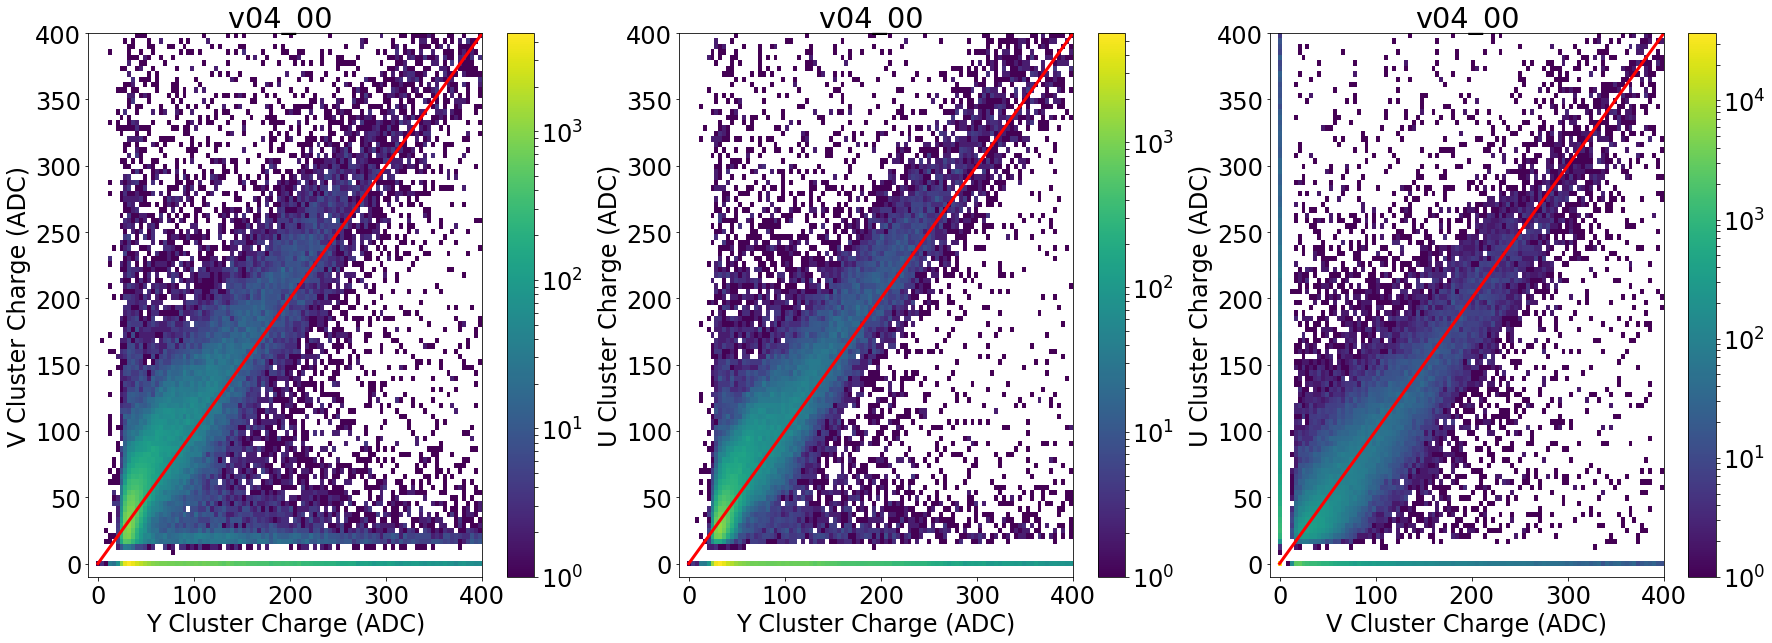

In [111]:
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(df_Matching_v04_00['Y_cluster_charge'].values,df_Matching_v04_00['V_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('v04_00 ')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(df_Matching_v04_00['Y_cluster_charge'].values,df_Matching_v04_00['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('v04_00 ')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(df_Matching_v04_00['V_cluster_charge'].values,df_Matching_v04_00['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('V Cluster Charge (ADC)')
plt.title('v04_00')
#plt.legend(loc=1)
plt.show()

#plt.draw()
#fig.savefig('charge11.png', dpi=270)



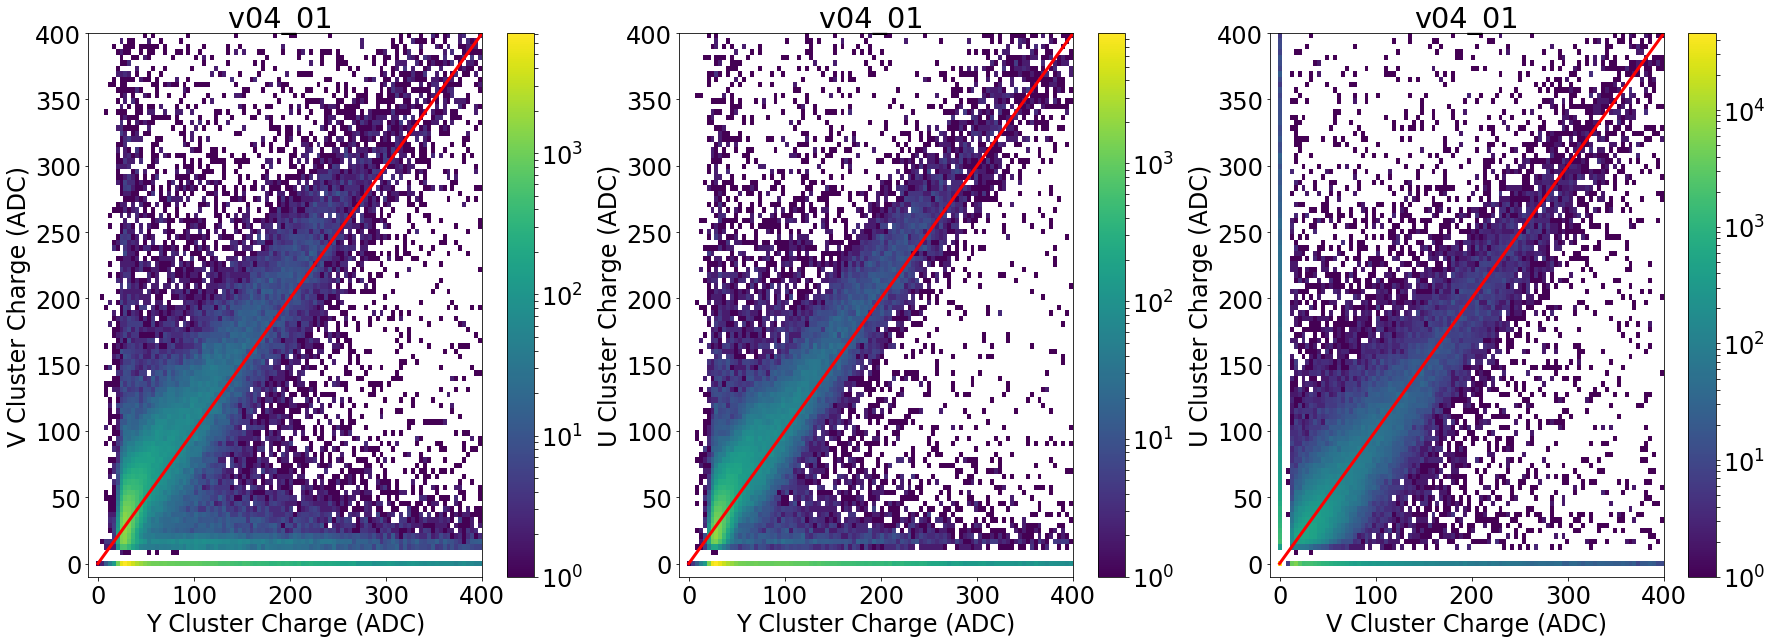

In [112]:
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(df_Matching_v04_01['Y_cluster_charge'].values,df_Matching_v04_01['V_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('v04_01 ')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(df_Matching_v04_01['Y_cluster_charge'].values,df_Matching_v04_01['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('v04_01 ')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(df_Matching_v04_01['V_cluster_charge'].values,df_Matching_v04_01['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('V Cluster Charge (ADC)')
plt.title('v04_01')
#plt.legend(loc=1)
plt.show()

#plt.draw()
#fig.savefig('charge11.png', dpi=270)



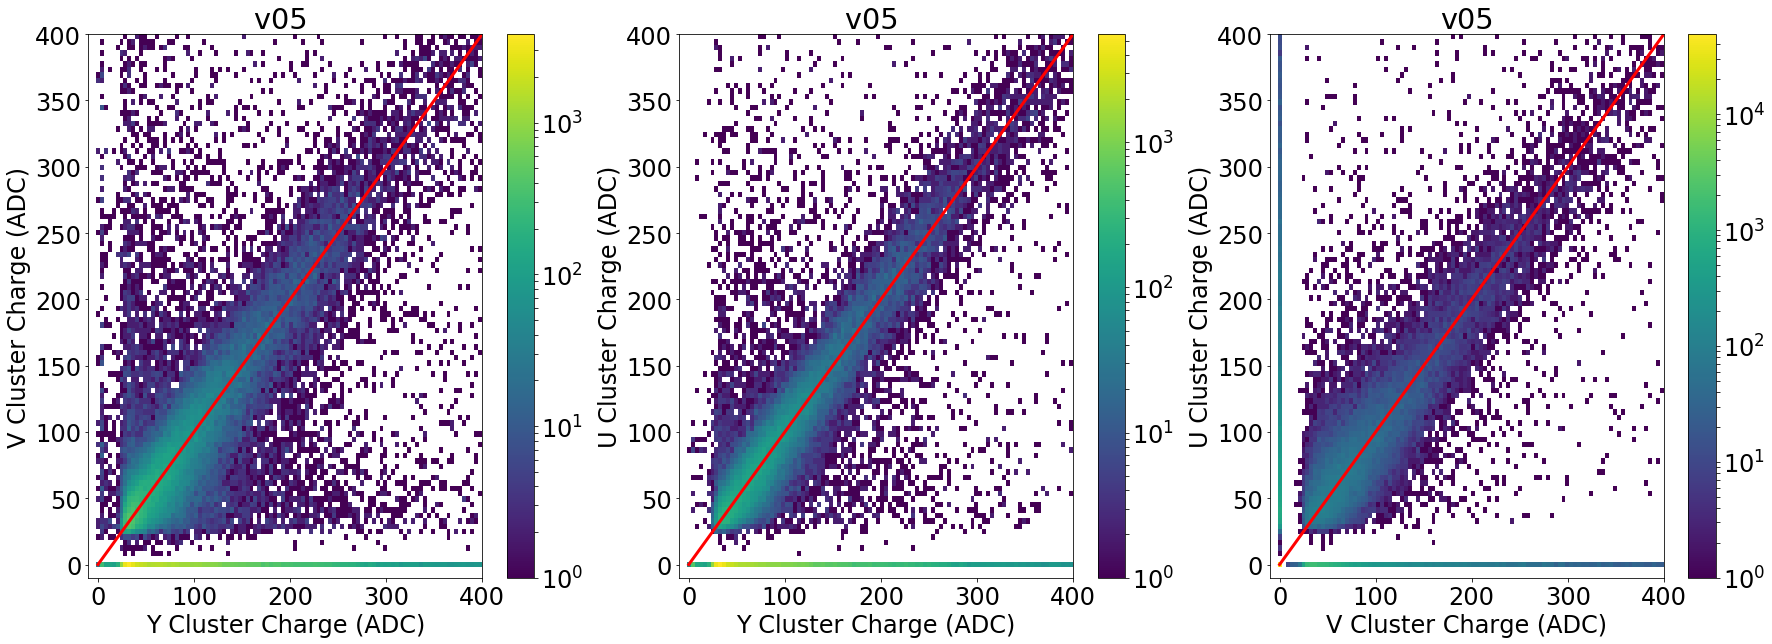

In [113]:
fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(df_Matching_v05['Y_cluster_charge'].values,df_Matching_v05['V_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('v05 ')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(df_Matching_v05['Y_cluster_charge'].values,df_Matching_v05['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('Y Cluster Charge (ADC)')
plt.title('v05 ')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(df_Matching_v05['V_cluster_charge'].values,df_Matching_v05['U_cluster_charge'].values, bins=(100,100), range=[[-10,400], [-10,400]] , norm=LogNorm(),label='V Multiplicity=1, U Multiplicity=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Charge (ADC)')
plt.xlabel('V Cluster Charge (ADC)')
plt.title('v05')
#plt.legend(loc=1)
plt.show()

#plt.draw()
#fig.savefig('charge11.png', dpi=270)



/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

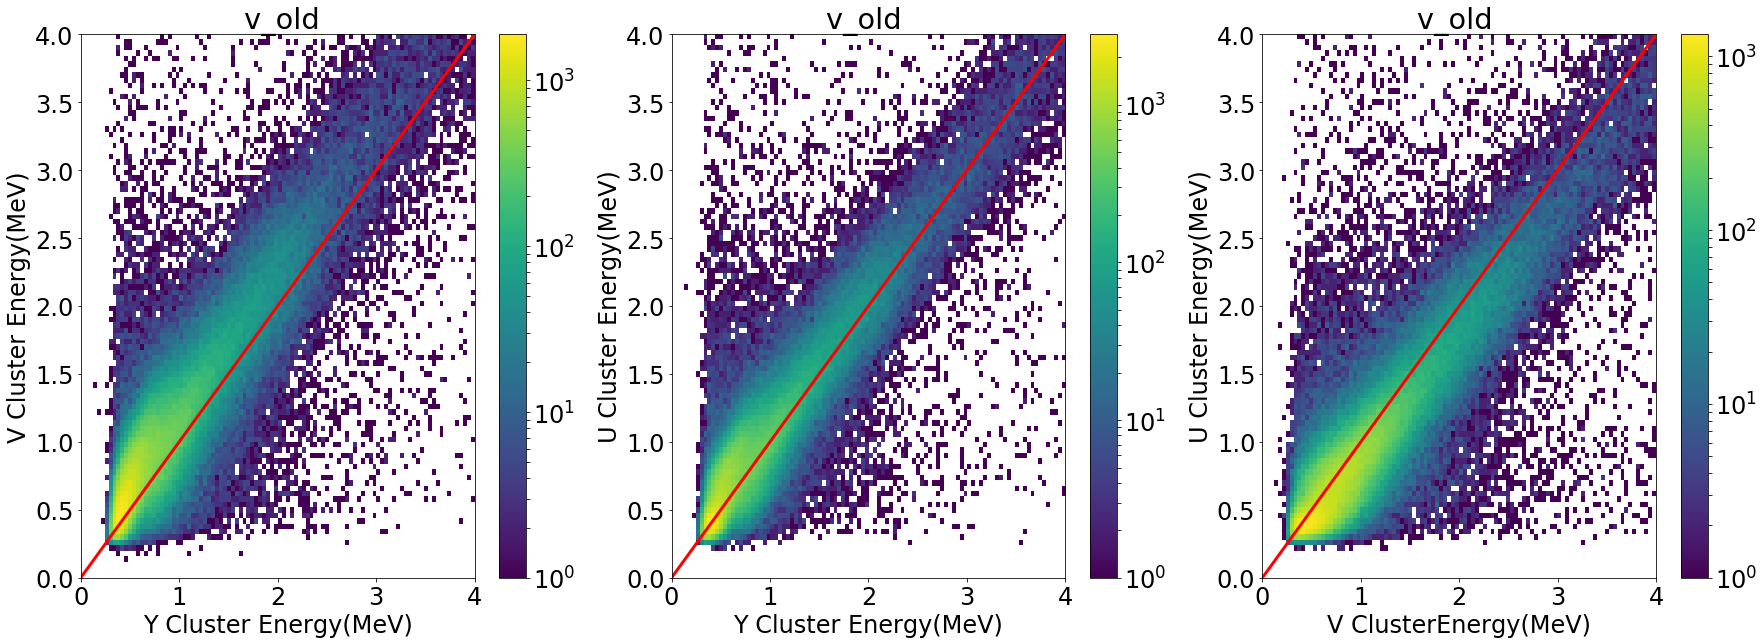

In [114]:
CUT = '  Y_cluster_charge * 240 < 130000. and Y_cluster_charge >0.'
CUT += ' and V_cluster_charge * 240 < 130000. and V_cluster_charge>0. '
CUT += ' and U_cluster_charge * 240 < 130000. and U_cluster_charge >0. '

dfChargeCut_old = df_Matching_old.query(CUT)

dfChargeCut_old['energyY_old'] = E_recoY_old(dfChargeCut_old,238.4)
dfChargeCut_old['energyU_old'] = E_recoU_old(dfChargeCut_old,232)
dfChargeCut_old['energyV_old'] = E_recoV_old(dfChargeCut_old,249)


EMAX = 4.

fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(dfChargeCut_old['energyY_old'].values,dfChargeCut_old['energyV_old'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title(' v_old')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(dfChargeCut_old['energyY_old'].values,dfChargeCut_old['energyU_old'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('v_old ')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(dfChargeCut_old['energyV_old'].values,dfChargeCut_old['energyU_old'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('V ClusterEnergy(MeV)')
plt.title('v_old ')
#plt.legend(loc=1)

plt.show
plt.draw()
#fig.savefig('Energy1-1.png', dpi=270)



/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

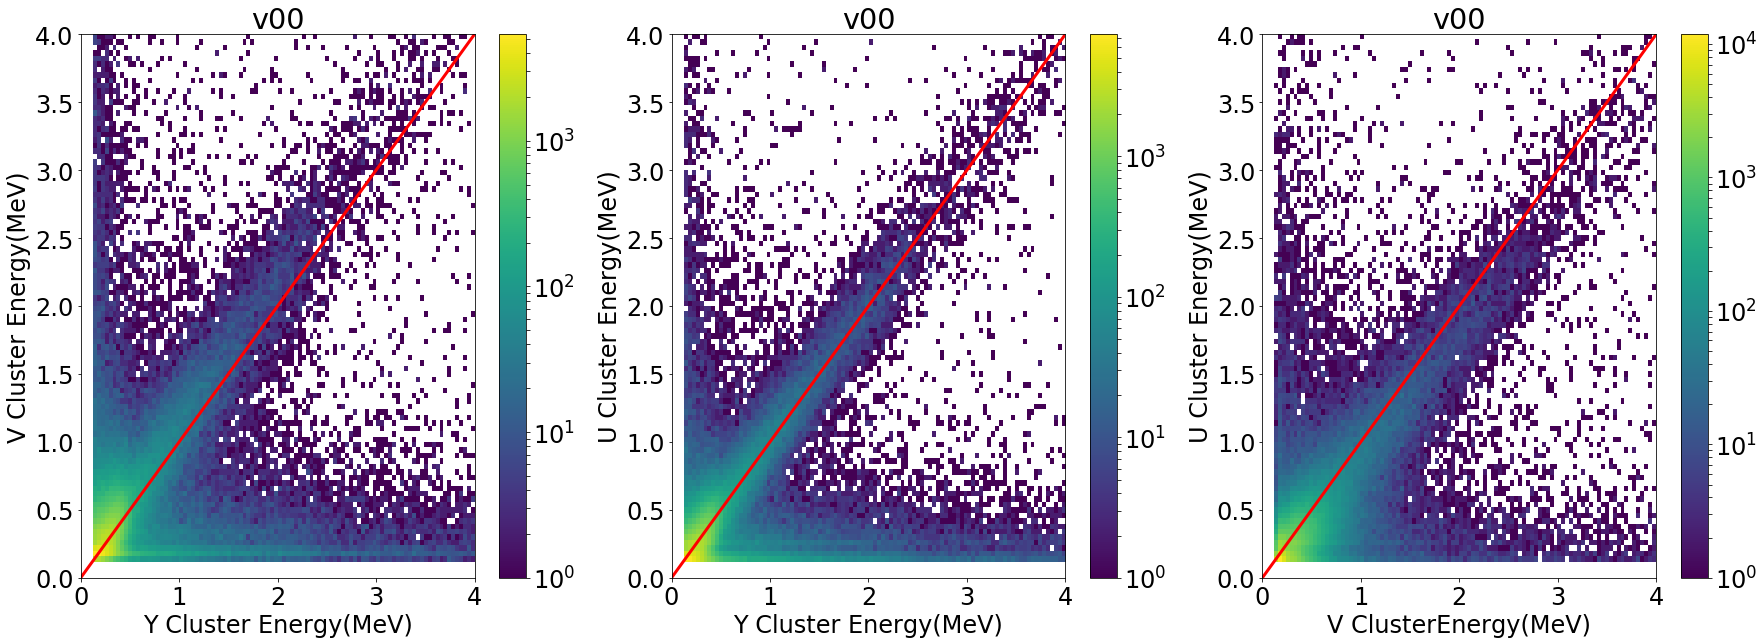

In [115]:
CUT = '  Y_cluster_charge * 240 < 130000. and Y_cluster_charge > 10.'
CUT += ' and V_cluster_charge * 240 < 130000. and V_cluster_charge >10. '
CUT += ' and U_cluster_charge * 240 < 130000. and U_cluster_charge >10. '

dfChargeCut_v00 = df_Matching_v00.query(CUT)

dfChargeCut_v00['energyY_v00'] = E_recoY_v00(dfChargeCut_v00,238.4)
dfChargeCut_v00['energyU_v00'] = E_recoU_v00(dfChargeCut_v00,232)
dfChargeCut_v00['energyV_v00'] = E_recoV_v00(dfChargeCut_v00,249)


EMAX = 4.

fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(dfChargeCut_v00['energyY_v00'].values,dfChargeCut_v00['energyV_v00'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('v00')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(dfChargeCut_v00['energyY_v00'].values,dfChargeCut_v00['energyU_v00'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('v00')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(dfChargeCut_v00['energyV_v00'].values,dfChargeCut_v00['energyU_v00'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('V ClusterEnergy(MeV)')
plt.title('v00')
#plt.legend(loc=1)

plt.show
plt.draw()
#fig.savefig('Energy1-1.png', dpi=27v00

In [116]:
# CUT = '  Y_cluster_charge * 240 < 130000. and Y_cluster_charge >10.'
# CUT += ' and V_cluster_charge * 240 < 130000. and V_cluster_charge>10. '
# CUT += ' and U_cluster_charge * 240 < 130000. and U_cluster_charge >10. '

# dfChargeCut_v01 = df_Matching_v01.query(CUT)

# dfChargeCut_v01['energyY_v01'] = E_recoY_v01(dfChargeCut_v01,238.4)
# dfChargeCut_v01['energyU_v01'] = E_recoU_v01(dfChargeCut_v01,232)
# dfChargeCut_v01['energyV_v01'] = E_recoV_v01(dfChargeCut_v01,249)


# EMAX = 4.

# fig = plt.figure(figsize=(30,10))
# plt.rcParams.update({'font.size': 24})
# plt.subplot(1, 3, 1)
# plt.hist2d(dfChargeCut_v01['energyY_v01'].values,dfChargeCut_v01['energyV_v01'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
# plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
# plt.colorbar()
# plt.ylabel('V Cluster Energy(MeV)')
# plt.xlabel('Y Cluster Energy(MeV)')
# plt.title('v01 ')
# #plt.legend(loc=1)

# plt.subplot(1, 3, 2)
# plt.hist2d(dfChargeCut_v01['energyY_v01'].values,dfChargeCut_v01['energyU_v01'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
# plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
# plt.colorbar()
# plt.ylabel('U Cluster Energy(MeV)')
# plt.xlabel('Y Cluster Energy(MeV)')
# plt.title('v01 ')
# #plt.legend(loc=1)


# plt.subplot(1, 3, 3)
# plt.hist2d(dfChargeCut_v01['energyV_v01'].values,dfChargeCut_v01['energyU_v01'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
# plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
# plt.colorbar()
# plt.ylabel('U Cluster Energy(MeV)')
# plt.xlabel('V ClusterEnergy(MeV)')
# plt.title('v01 ')
# #plt.legend(loc=1)

# plt.show
# plt.draw()
# #fig.savefig('Energy1-1.png', dpi=27v00

/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

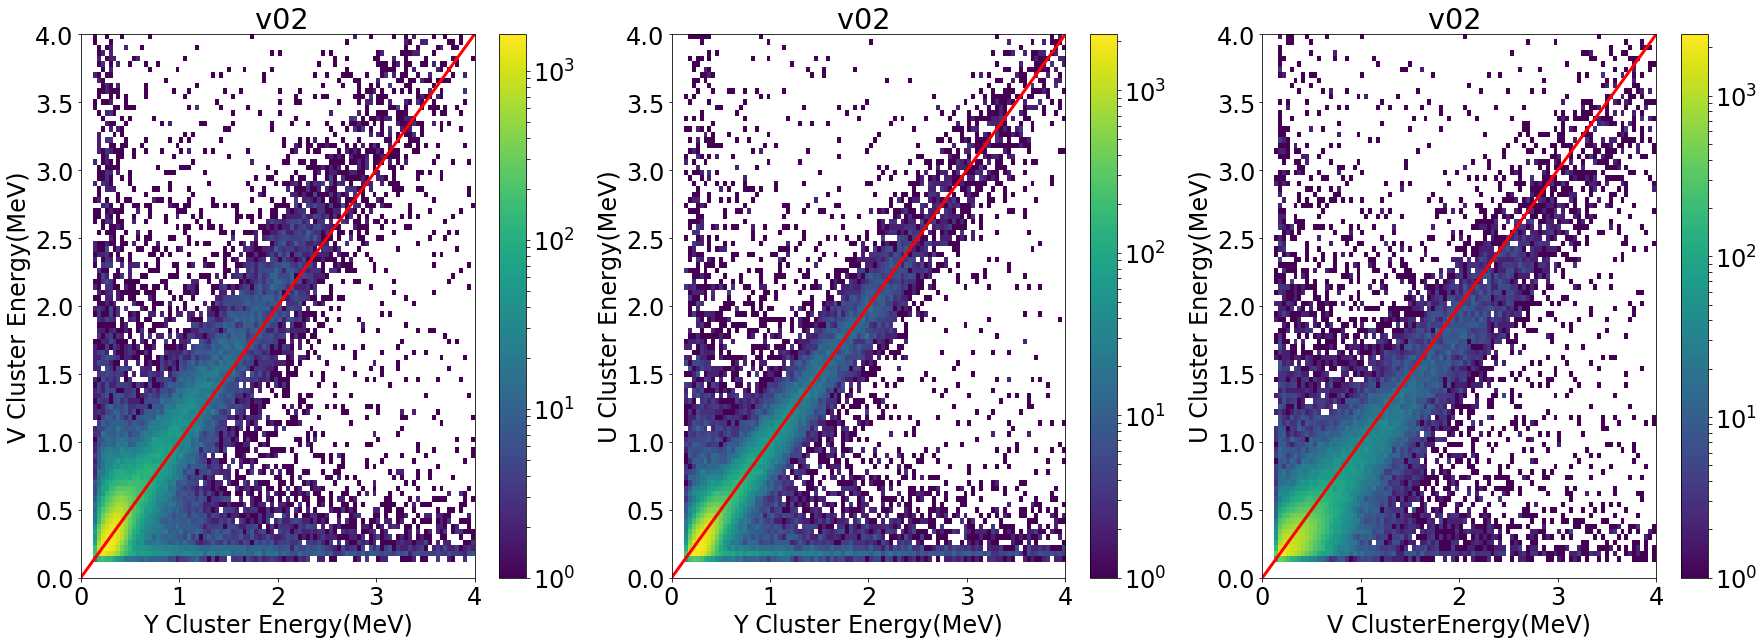

In [117]:
CUT = '  Y_cluster_charge * 240 < 130000. and Y_cluster_charge >10.'
CUT += ' and V_cluster_charge * 240 < 130000. and V_cluster_charge>10. '
CUT += ' and U_cluster_charge * 240 < 130000. and U_cluster_charge >10. '

dfChargeCut_v02 = df_Matching_v02.query(CUT)

dfChargeCut_v02['energyY_v02'] = E_recoY_v02(dfChargeCut_v02,238.4)
dfChargeCut_v02['energyU_v02'] = E_recoU_v02(dfChargeCut_v02,232)
dfChargeCut_v02['energyV_v02'] = E_recoV_v02(dfChargeCut_v02,249)


EMAX = 4.

fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(dfChargeCut_v02['energyY_v02'].values,dfChargeCut_v02['energyV_v02'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title(' v02')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(dfChargeCut_v02['energyY_v02'].values,dfChargeCut_v02['energyU_v02'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('v02 ')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(dfChargeCut_v02['energyV_v02'].values,dfChargeCut_v02['energyU_v02'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('V ClusterEnergy(MeV)')
plt.title('v02 ')
#plt.legend(loc=1)

plt.show
plt.draw()
#fig.savefig('Energy1-1.png', dpi=27v00

/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

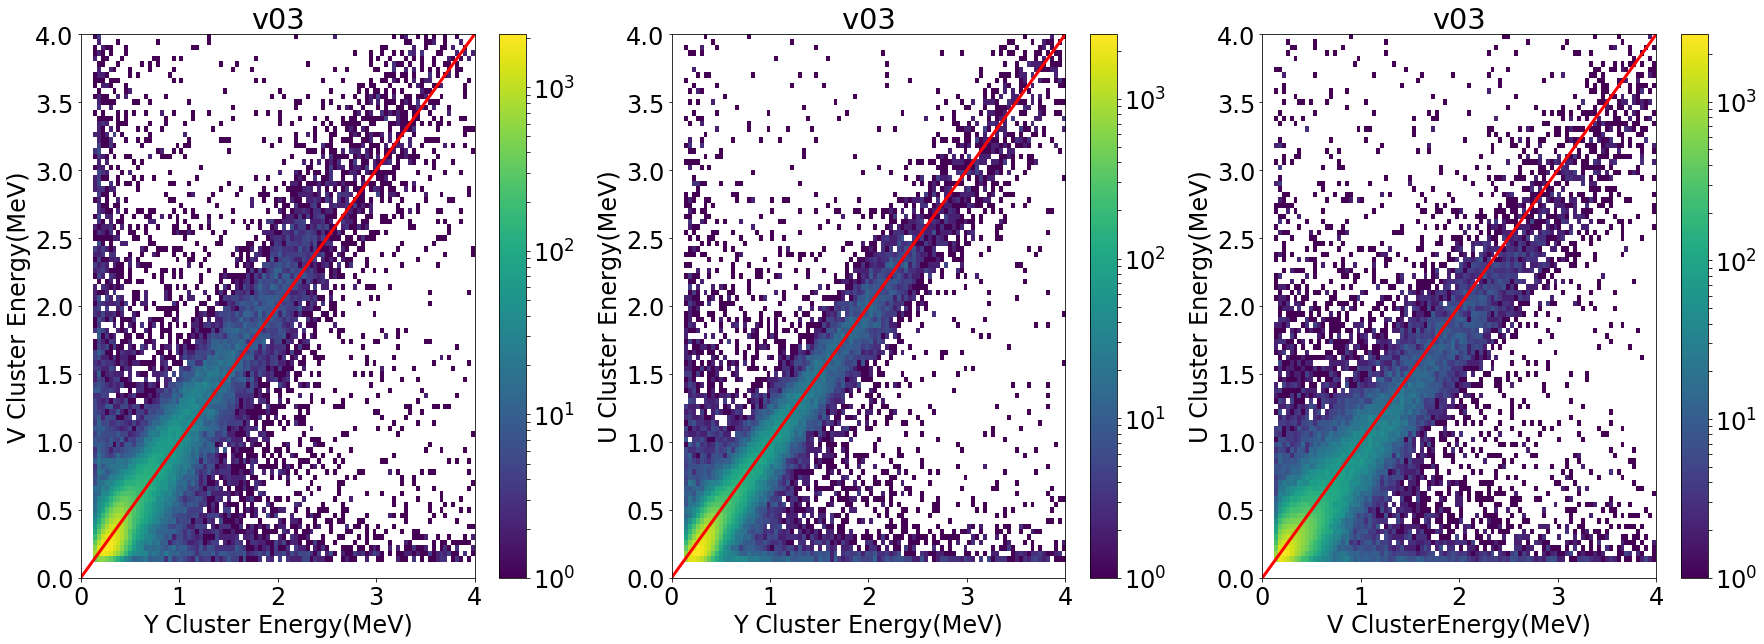

In [118]:
CUT = '  Y_cluster_charge * 240 < 130000. and Y_cluster_charge >10.'
CUT += ' and V_cluster_charge * 240 < 130000. and V_cluster_charge>10. '
CUT += ' and U_cluster_charge * 240 < 130000. and U_cluster_charge >10. '

dfChargeCut_v03 = df_Matching_v03.query(CUT)

dfChargeCut_v03['energyY_v03'] = E_recoY_v03(dfChargeCut_v03,238.4)
dfChargeCut_v03['energyU_v03'] = E_recoU_v03(dfChargeCut_v03,232)
dfChargeCut_v03['energyV_v03'] = E_recoV_v03(dfChargeCut_v03,249)


EMAX = 4.

fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(dfChargeCut_v03['energyY_v03'].values,dfChargeCut_v03['energyV_v03'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('v03')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(dfChargeCut_v03['energyY_v03'].values,dfChargeCut_v03['energyU_v03'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title(' v03 ')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(dfChargeCut_v03['energyV_v03'].values,dfChargeCut_v03['energyU_v03'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('V ClusterEnergy(MeV)')
plt.title('v03')
#plt.legend(loc=1)

plt.show
plt.draw()
#fig.savefig('Energy1-1.png', dpi=27v00

/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

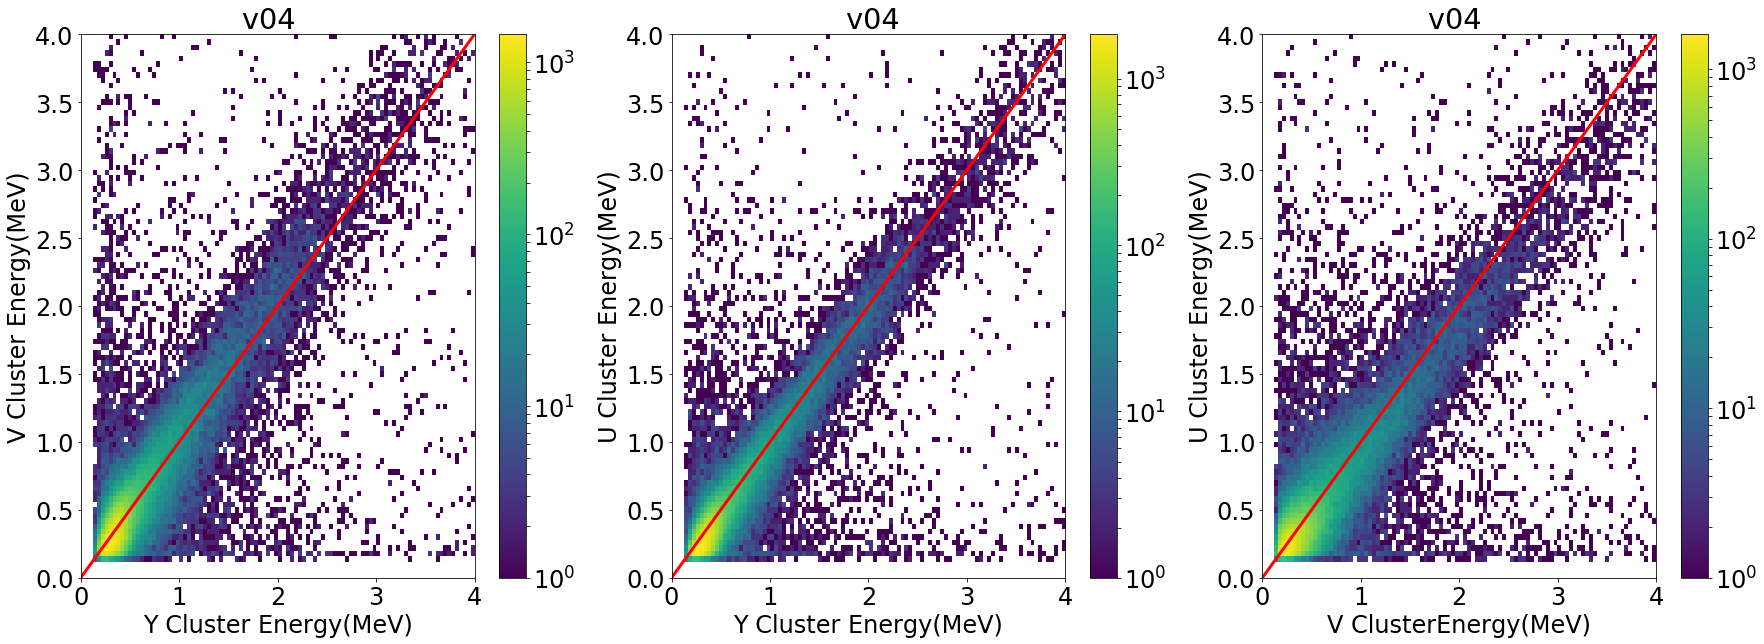

In [119]:
CUT = '  Y_cluster_charge * 240 < 130000. and Y_cluster_charge >10.'
CUT += ' and V_cluster_charge * 240 < 130000. and V_cluster_charge>10. '
CUT += ' and U_cluster_charge * 240 < 130000. and U_cluster_charge >10. '

dfChargeCut_v04 = df_Matching_v04.query(CUT)

dfChargeCut_v04['energyY_v04'] = E_recoY_v04(dfChargeCut_v04,238.4)
dfChargeCut_v04['energyU_v04'] = E_recoU_v04(dfChargeCut_v04,232)
dfChargeCut_v04['energyV_v04'] = E_recoV_v04(dfChargeCut_v04,249)


EMAX = 4.

fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(dfChargeCut_v04['energyY_v04'].values,dfChargeCut_v04['energyV_v04'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('v04  ')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(dfChargeCut_v04['energyY_v04'].values,dfChargeCut_v04['energyU_v04'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title(' v04')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(dfChargeCut_v04['energyV_v04'].values,dfChargeCut_v04['energyU_v04'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('V ClusterEnergy(MeV)')
plt.title('v04 ')
#plt.legend(loc=1)

plt.show
plt.draw()
#fig.savefig('Energy1-1.png', dpi=27v00

/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

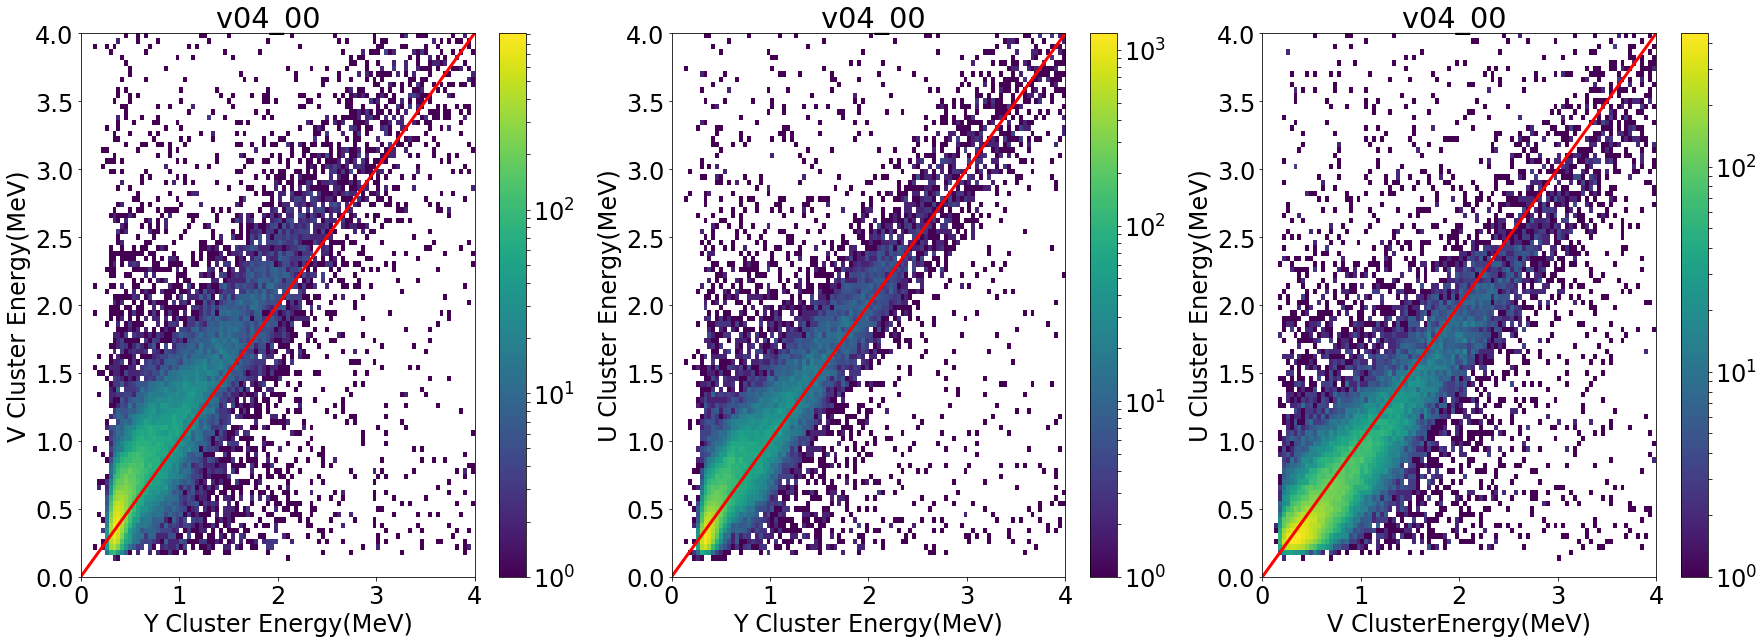

In [120]:
CUT = '  Y_cluster_charge * 240 < 130000. and Y_cluster_charge >10.'
CUT += ' and V_cluster_charge * 240 < 130000. and V_cluster_charge>10. '
CUT += ' and U_cluster_charge * 240 < 130000. and U_cluster_charge >10. '

dfChargeCut_v04_00 = df_Matching_v04_00.query(CUT)

dfChargeCut_v04_00['energyY_v04_00'] = E_recoY_v04_00(dfChargeCut_v04_00,238.4)
dfChargeCut_v04_00['energyU_v04_00'] = E_recoU_v04_00(dfChargeCut_v04_00,232)
dfChargeCut_v04_00['energyV_v04_00'] = E_recoV_v04_00(dfChargeCut_v04_00,249)


EMAX = 4.

fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(dfChargeCut_v04_00['energyY_v04_00'].values,dfChargeCut_v04_00['energyV_v04_00'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('v04_00  ')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(dfChargeCut_v04_00['energyY_v04_00'].values,dfChargeCut_v04_00['energyU_v04_00'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title(' v04_00')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(dfChargeCut_v04_00['energyV_v04_00'].values,dfChargeCut_v04_00['energyU_v04_00'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('V ClusterEnergy(MeV)')
plt.title('v04_00 ')
#plt.legend(loc=1)

plt.show
plt.draw()
#fig.savefig('Energy1-1.png', dpi=27v00

/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

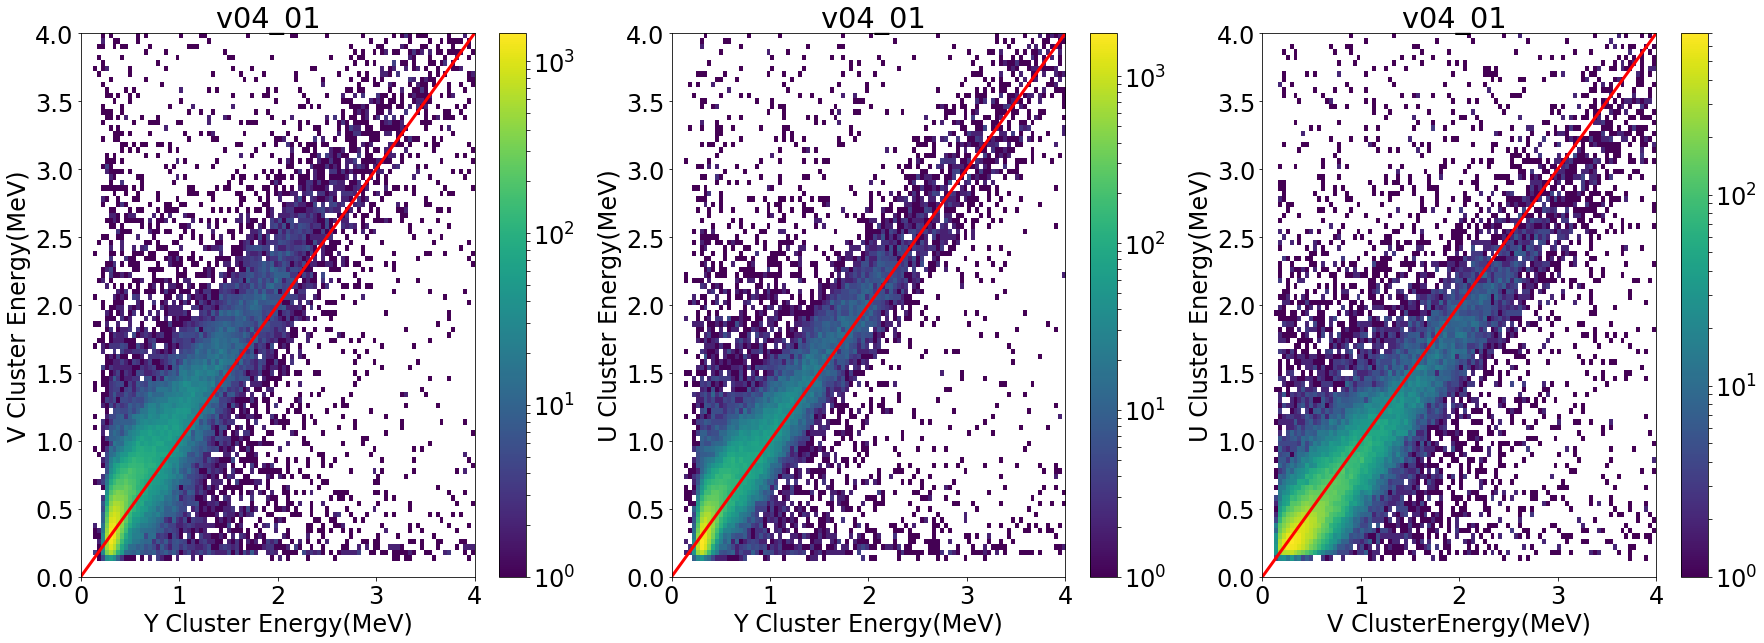

In [121]:
CUT = '  Y_cluster_charge * 240 < 130000. and Y_cluster_charge >10.'
CUT += ' and V_cluster_charge * 240 < 130000. and V_cluster_charge>10. '
CUT += ' and U_cluster_charge * 240 < 130000. and U_cluster_charge >10. '

dfChargeCut_v04_01 = df_Matching_v04_01.query(CUT)

dfChargeCut_v04_01['energyY_v04_01'] = E_recoY_v04_01(dfChargeCut_v04_01,238.4)
dfChargeCut_v04_01['energyU_v04_01'] = E_recoU_v04_01(dfChargeCut_v04_01,232)
dfChargeCut_v04_01['energyV_v04_01'] = E_recoV_v04_01(dfChargeCut_v04_01,249)


EMAX = 4.

fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(dfChargeCut_v04_01['energyY_v04_01'].values,dfChargeCut_v04_01['energyV_v04_01'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('v04_01  ')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(dfChargeCut_v04_01['energyY_v04_01'].values,dfChargeCut_v04_01['energyU_v04_01'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title(' v04_01')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(dfChargeCut_v04_01['energyV_v04_01'].values,dfChargeCut_v04_01['energyU_v04_01'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('V ClusterEnergy(MeV)')
plt.title('v04_01 ')
#plt.legend(loc=1)

plt.show
plt.draw()
#fig.savefig('Energy1-1.png', dpi=27v00

/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/uboone/app/users/abhat/python_libs/lib/python2.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

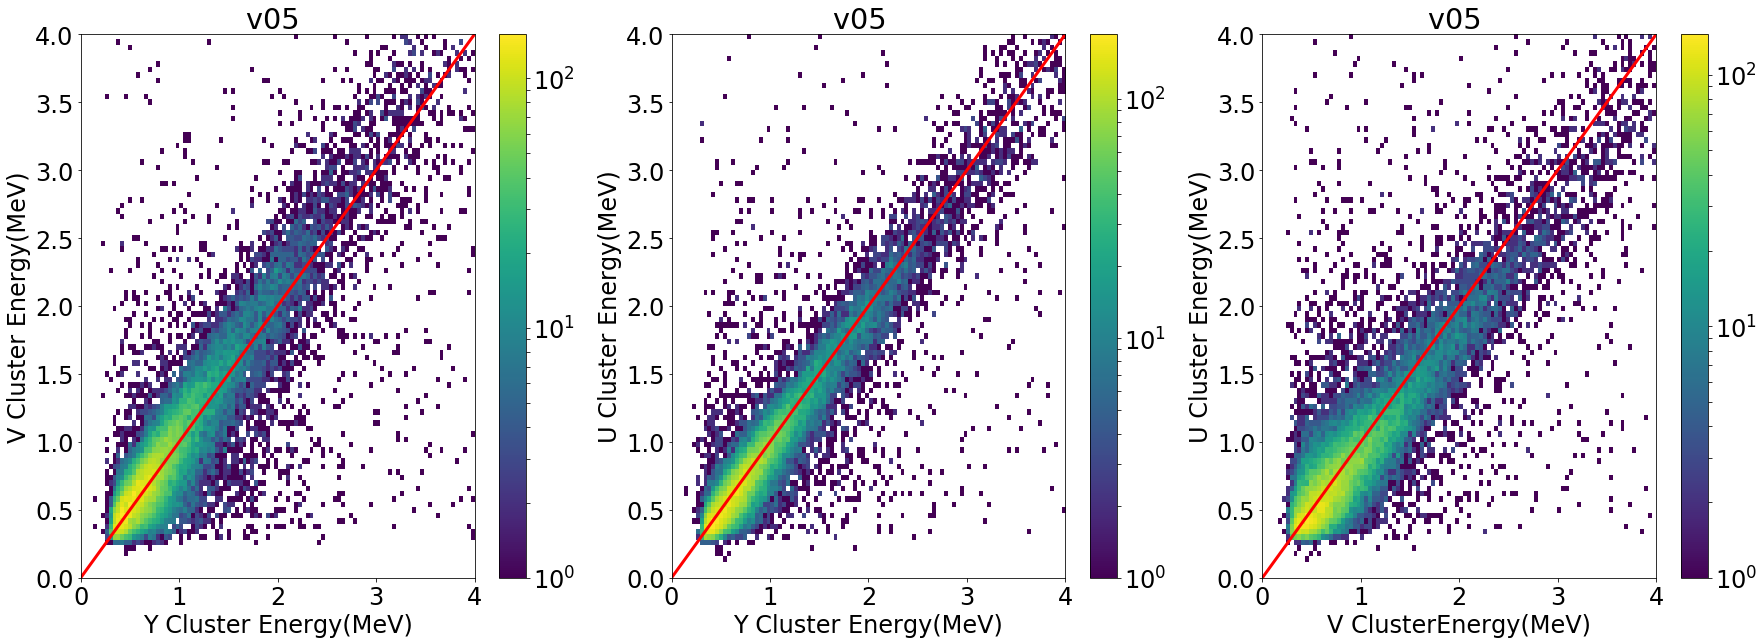

In [122]:
CUT = '  Y_cluster_charge * 240 < 130000. and Y_cluster_charge >10.'
CUT += ' and V_cluster_charge * 240 < 130000. and V_cluster_charge>10. '
CUT += ' and U_cluster_charge * 240 < 130000. and U_cluster_charge >10. '

dfChargeCut_v05 = df_Matching_v05.query(CUT)

dfChargeCut_v05['energyY_v05'] = E_recoY_v05(dfChargeCut_v05,238.4)
dfChargeCut_v05['energyU_v05'] = E_recoU_v05(dfChargeCut_v05,232)
dfChargeCut_v05['energyV_v05'] = E_recoV_v05(dfChargeCut_v05,249)


EMAX = 4.

fig = plt.figure(figsize=(30,10))
plt.rcParams.update({'font.size': 24})
plt.subplot(1, 3, 1)
plt.hist2d(dfChargeCut_v05['energyY_v05'].values,dfChargeCut_v05['energyV_v05'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('V Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('v05 ')
#plt.legend(loc=1)

plt.subplot(1, 3, 2)
plt.hist2d(dfChargeCut_v05['energyY_v05'].values,dfChargeCut_v05['energyU_v05'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('Y Cluster Energy(MeV)')
plt.title('v05  ')
#plt.legend(loc=1)


plt.subplot(1, 3, 3)
plt.hist2d(dfChargeCut_v05['energyV_v05'].values,dfChargeCut_v05['energyU_v05'].values, bins=(100,100), range=[[0,EMAX], [0,EMAX]] , norm=LogNorm())#,label='V Multiplicity>=1, U Multiplicity>=1')
plt.plot([0, 1200], [0, 1200], 'r-', lw=3)
plt.colorbar()
plt.ylabel('U Cluster Energy(MeV)')
plt.xlabel('V ClusterEnergy(MeV)')
plt.title('v05 ')
#plt.legend(loc=1)

plt.show
plt.draw()
#fig.savefig('Energy1-1.png', dpi=27v05

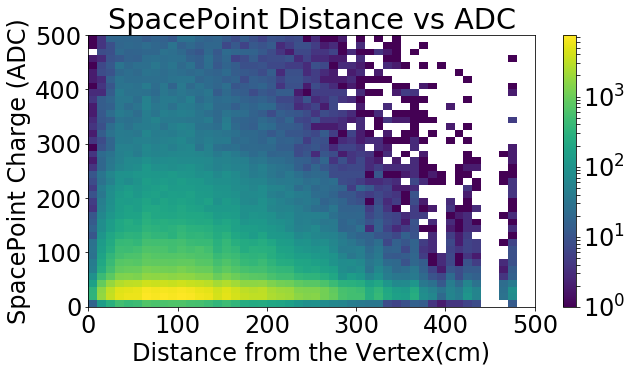

In [123]:
fig = plt.figure(figsize=(10,5))
plt.hist2d(df_Correlation_v04_G10['distance_nu_smallest'].values,df_Correlation_v04_G10['sps_cluster_charge'].values, bins=(50,40), range=[[0,500], [0,500]] , norm=LogNorm())
plt.colorbar()
plt.ylabel('SpacePoint Charge (ADC)')
plt.xlabel('Distance from the Vertex(cm)')
plt.title('SpacePoint Distance vs ADC')
plt.show()